# Biophysics

The biophysics of a cell has a massive influence in how it integrates synaptic input. In the [previous notebook](./01_current_injection.ipynb), we ran some current injections on a cell with predefined biophysical parameters. This notebook will provide a walkthrough on how to easily interact with the biophysical properties of a cell.

For this reason, we will introduce a simple format for biophysical parameters and some high-level objects, making it easy to adapt these parameters on the fly. Whether or not these produce realistic electrophysiological responses will be covered in Section 

In [1]:
%matplotlib inline
import Interface as I
from getting_started import getting_started_dir
db_path = I.os.path.join(getting_started_dir, 'example_simulation_data', 'biophysics')
db = I.DataBase(db_path)

# Load example biophysical models
example_models = db['example_models']
# resolve pathname
example_models['morphology.filename'] = [I.os.path.join(
   getting_started_dir, 'anatomical_constraints', e) for e in example_models['morphology.filename']]

trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!
[INFO] ISF: Current version: heads/publish+0.ge63ec085.dirty
[INFO] ISF: Current pid: 77710
[INFO] mechanisms: Loading mechanisms:


--No graphics will be displayed.





[INFO] ISF: Loaded modules with __version__ attribute are:
IPython: 8.12.3, Interface: heads/publish+0.ge63ec085.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blake3: 0.3.3, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, comm: 0.2.1, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dash: 2.9.3, dask: 2.30.0, dateutil: 2.8.2, deap: 1.3, debugpy: 1.8.0, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, executing: 2.0.1, filelock: 3.0.12, flask: 1.1.2, flask_cors: 4.0.0, frozendict: 2.3.8, fsspec: 0.8.3, future: 0.18.2, gevent: 20.9.0, greenlet: 0.4.17, ipaddress: 1.0, ipykernel: 6.29.0, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, itsdangerous: 1.1.0, jedi: 0.17.1, jinja2: 3.0.3, joblib: 1.3.2, json: 2.0.9, jupyter_client: 8.6.0, jupyter_core: 5.7.1, kazoo: 2.8.0, kiwisolver: 1.3.0, llvmlite: 0.34.0, loggin

In [2]:
# init
objectives_2BAC = [
       '1BAC_APheight', '1BAC_ISI', '1BAC_ahpdepth', '1BAC_caSpike_height', 
       '1BAC_caSpike_width', '1BAC_spikecount', '2BAC_APheight', '2BAC_ISI', 
       '2BAC_ahpdepth', '2BAC_caSpike_height', '2BAC_caSpike_width', '2BAC_spikecount',
        'bAP_APheight', 'bAP_APwidth', 'bAP_att2', 'bAP_att3', 'bAP_spikecount']
params_py3 = [
       'ephys.CaDynamics_E2_v2.apic.decay',
       'ephys.CaDynamics_E2_v2.apic.gamma',
       'ephys.CaDynamics_E2_v2.axon.decay',
       'ephys.CaDynamics_E2_v2.axon.gamma',
       'ephys.CaDynamics_E2_v2.soma.decay',
       'ephys.CaDynamics_E2_v2.soma.gamma',
       'ephys.Ca_HVA.apic.gCa_HVAbar',
       'ephys.Ca_HVA.axon.gCa_HVAbar',
       'ephys.Ca_HVA.soma.gCa_HVAbar',
       'ephys.Ca_LVAst.apic.gCa_LVAstbar',
       'ephys.Ca_LVAst.axon.gCa_LVAstbar',
       'ephys.Ca_LVAst.soma.gCa_LVAstbar',
       'ephys.Im.apic.gImbar',
       'ephys.K_Pst.axon.gK_Pstbar',
       'ephys.K_Pst.soma.gK_Pstbar',
       'ephys.K_Tst.axon.gK_Tstbar',
       'ephys.K_Tst.soma.gK_Tstbar',
       'ephys.NaTa_t.apic.gNaTa_tbar',
       'ephys.NaTa_t.axon.gNaTa_tbar',
       'ephys.NaTa_t.soma.gNaTa_tbar',
       'ephys.Nap_Et2.axon.gNap_Et2bar',
       'ephys.Nap_Et2.soma.gNap_Et2bar',
       'ephys.SK_E2.apic.gSK_E2bar',
       'ephys.SK_E2.axon.gSK_E2bar',
       'ephys.SK_E2.soma.gSK_E2bar',
       'ephys.SKv3_1.apic.gSKv3_1bar',
       'ephys.SKv3_1.apic.offset',
       'ephys.SKv3_1.apic.slope',
       'ephys.SKv3_1.axon.gSKv3_1bar',
       'ephys.SKv3_1.soma.gSKv3_1bar',
       'ephys.none.apic.g_pas',
       'ephys.none.axon.g_pas',
       'ephys.none.dend.g_pas',
       'ephys.none.soma.g_pas',
       'scale_apical.scale']

Let's inspect what these biophysical parameters look like

In [3]:
# get the biophysical parameters of one examplary biophysical model
p = example_models.iloc[0][params_py3]
p

ephys.CaDynamics_E2_v2.apic.decay        59.0477
ephys.CaDynamics_E2_v2.apic.gamma     0.00112918
ephys.CaDynamics_E2_v2.axon.decay        743.739
ephys.CaDynamics_E2_v2.axon.gamma     0.00121861
ephys.CaDynamics_E2_v2.soma.decay        159.292
ephys.CaDynamics_E2_v2.soma.gamma      0.0137903
ephys.Ca_HVA.apic.gCa_HVAbar          0.00376466
ephys.Ca_HVA.axon.gCa_HVAbar         0.000280338
ephys.Ca_HVA.soma.gCa_HVAbar         4.83005e-05
ephys.Ca_LVAst.apic.gCa_LVAstbar        0.194205
ephys.Ca_LVAst.axon.gCa_LVAstbar      0.00674865
ephys.Ca_LVAst.soma.gCa_LVAstbar     5.23378e-06
ephys.Im.apic.gImbar                 0.000758139
ephys.K_Pst.axon.gK_Pstbar              0.367934
ephys.K_Pst.soma.gK_Pstbar            0.00192893
ephys.K_Tst.axon.gK_Tstbar             0.0185365
ephys.K_Tst.soma.gK_Tstbar             0.0831176
ephys.NaTa_t.apic.gNaTa_tbar           0.0185236
ephys.NaTa_t.axon.gNaTa_tbar             3.66734
ephys.NaTa_t.soma.gNaTa_tbar              1.7436
ephys.Nap_Et2.axon.g

Apart from the passive properties, we have 35 biophysical parameters, relating to varying biophysical aspects for the soma, axon (AIS), apical dendrite, and other dendrites (taken to be passive for current injection experiments).

|Name|Meaning|Unit|
|---|---|---|
|ephys.X.\<location\>.gXbar| Density of Hodgkin Huxley-type channel X |[$S/cm^2$]|
|scale_apical.scale|Scaling factor for the diameter of the apical dendrite|None|
|ephys.CaDynamics_E2_v2.\<location\>.gamma| Ratio of free $Ca^{2+}$ | None|
|ephys.CaDynamics_E2_v2.\<location\>.gamma | Time constant of first-order dynamic $Ca^{2+}$-buffering| [$ms$]|
|ephys.SKv3_1.apic.offset/slope|Distribution parameters of $SKv3.1$ channels|[$\mu m$]/None|

## High level access to biophysics: comparison to empirical ephys responses

[The previous notebook](./01_current_injection.ipynb) used a [parameter file](../../biophysical_constraints/86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param) to equip a morphology with biophysical parameters and used the NEURON API to run simulations. This was rather tedious, so here we will introduce some setup that makes this as easy as a oneliner.

Here, we introduce the [Simulator](../../../biophysics_fitting/simulator.py) object, specific to a particular morphology. We have already saved one in example data, but will guide you through how to set them up yourself.

In [4]:
def get_fixed_params(db, key):
    p = db[key]['get_fixed_params'](db[key])
    return p

def get_simulator(db, key):
    s = db[key]['get_Simulator'](db[key])
    return s

To set up a Simulator, you need morphology-specific fixed parameters:

In [5]:
db['89']['get_fixed_params']

<function __main__.get_fixed_params(mdb_setup)>

In [6]:
fixed_params = get_fixed_params(db, '89')
fixed_params

{'BAC.hay_measure.recSite': 294.8203371921156,
 'BAC.stim.dist': 294.8203371921156,
 'bAP.hay_measure.recSite1': 294.8203371921156,
 'bAP.hay_measure.recSite2': 474.8203371921156,
 'hot_zone.min_': 384.8203371921156,
 'hot_zone.max_': 584.8203371921156,
 'hot_zone.outsidescale_sections': [23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  33,
  34,
  35,
  37,
  38,
  40,
  42,
  43,
  44,
  46,
  48,
  50,
  51,
  52,
  54,
  56,
  58,
  60],
 'morphology.filename': '/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/getting_started/example_simulation_data/biophysics/89/db/morphology/89_L5_CDK20050712_nr6L5B_dend_PC_neuron_transform_registered_C2.hoc'}

These parameters define recording locations for stimuli, and some celltype-specific variables. In this case: hot_zone, defining a small section of apical dendrite near the bifurcation zone that has a high density of $Ca^{2+}$ channels.

In [7]:
def scale_apical(cell_param, params):
    assert(len(params) == 1)
    cell_param.cell_modify_functions.scale_apical.scale = params['scale']
    return cell_param

In [8]:
from biophysics_fitting.hay_complete_default_setup_python import get_Simulator
from biophysics_fitting.L5tt_parameter_setup import get_L5tt_template_v2
s = get_Simulator(fixed_params)
s.setup.cell_param_generator = get_L5tt_template_v2
s.setup.cell_param_modify_funs.append(('scale_apical', scale_apical))

We now have a Simulator object. Let's do something with it.

### The $bAP$ stimulus

The $bAP$ stimulus protocol is a step current injection at the soma, strong enough to evoke a backpropagating action potential (bAP)

In [9]:
cell, param = s.get_simulated_cell(p, 'bAP')

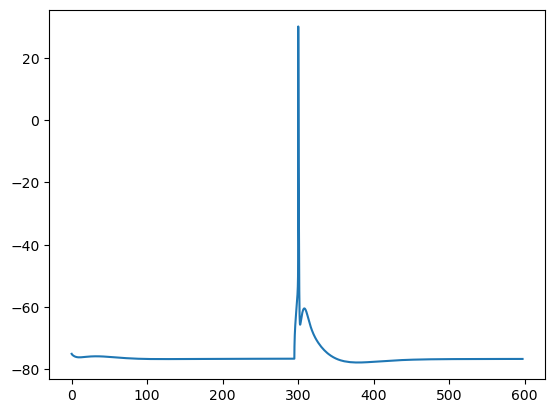

In [10]:
%matplotlib inline
I.plt.plot(cell.tVec, cell.sections[0].recVList[0])

### The $BAC$ stimulus protocol

A $BAC$ stimulus is a $bAP$ stimulus, with a well-timed epsp-shaped current injection at the apical dendrite. 

$BAC$ here stands for $bAP$-activated $Ca^{2+}$-spike

Where exactly do we inject the epsp? We already saved this information in `fixed_params`. Morphology "89" has a rather deep bifurcation, so the epsp injection is at only $294\mu m$ from the soma.

In [11]:
fixed_params['BAC.stim.dist']

294.8203371921156

In [12]:
cell, p = s.get_simulated_cell(p, 'BAC')

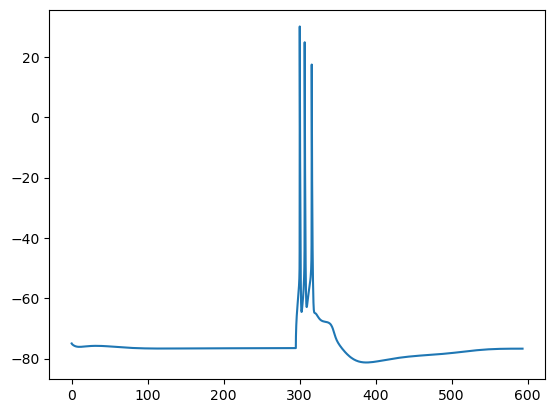

In [13]:
%matplotlib inline
I.plt.plot(cell.tVec, cell.sections[0].recVList[0])

parallelMovieMaker
files are here: animation/animation_tj0ypdcs/*.png



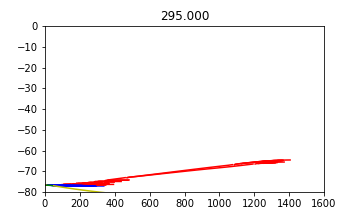
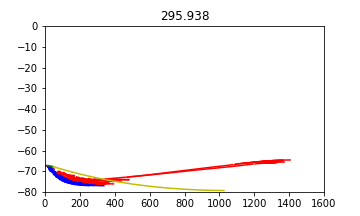
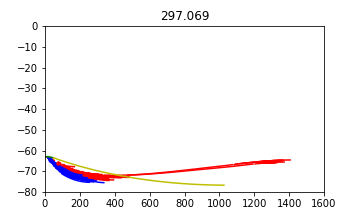
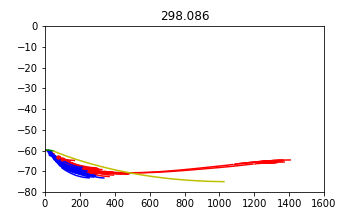
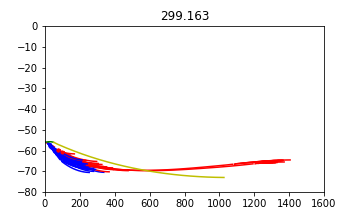
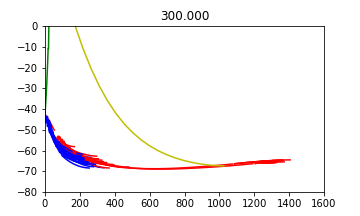
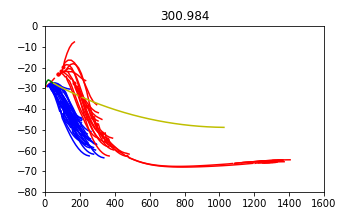
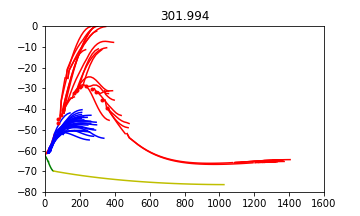
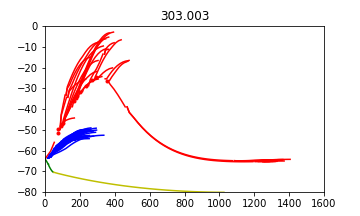
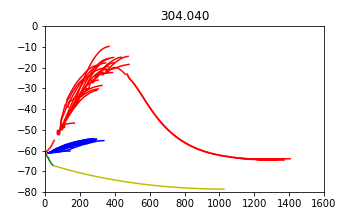
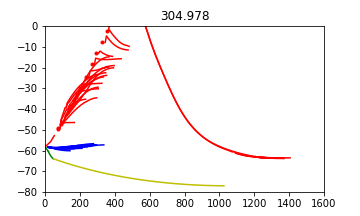
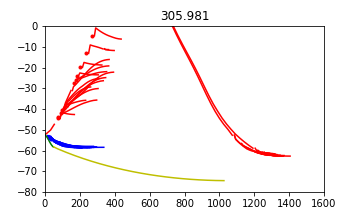
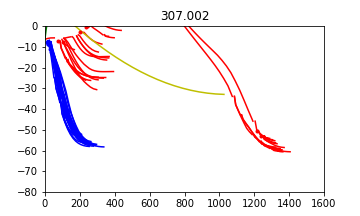
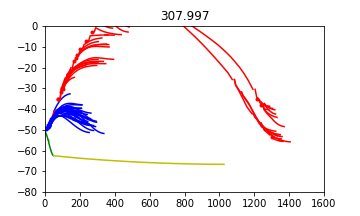
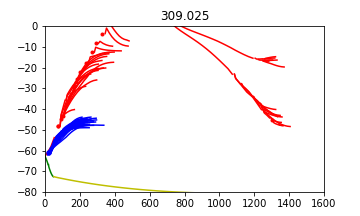
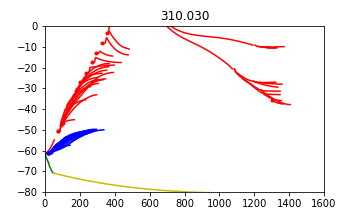
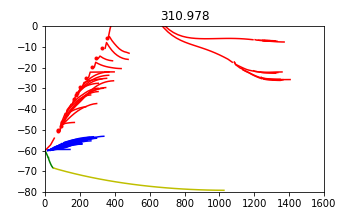
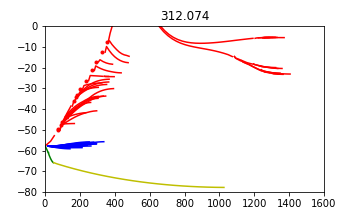
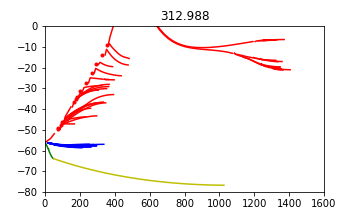
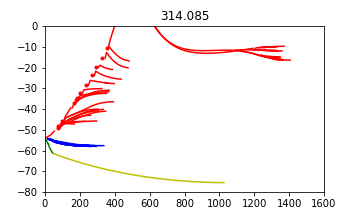
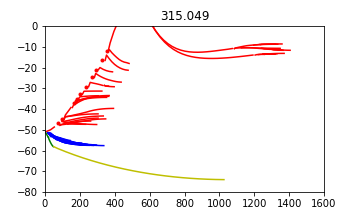
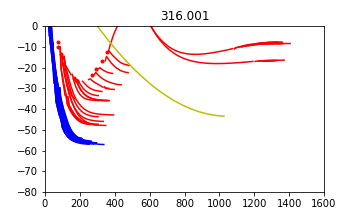
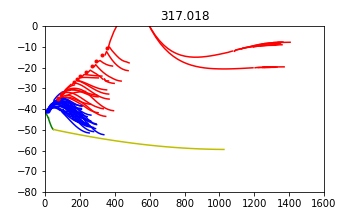
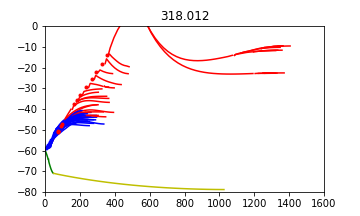
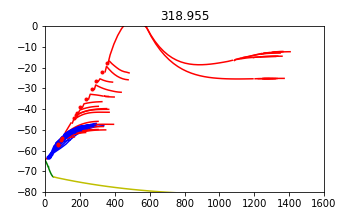
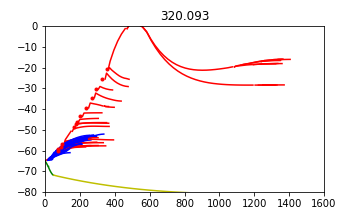
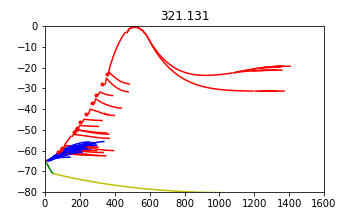
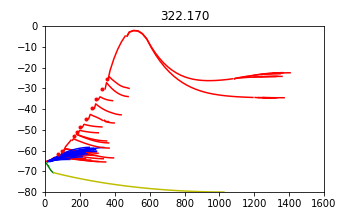
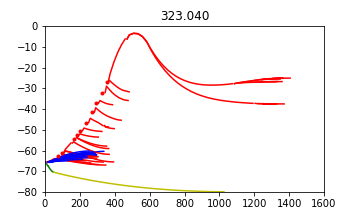
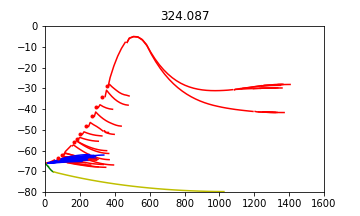
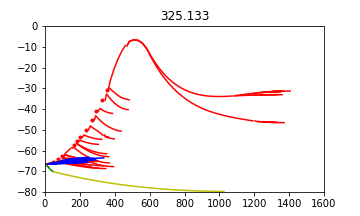
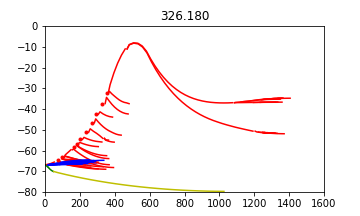
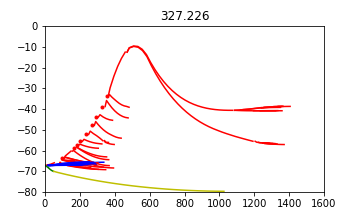
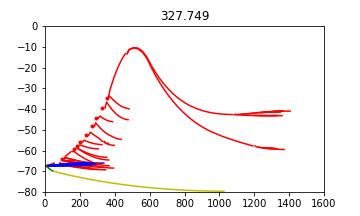
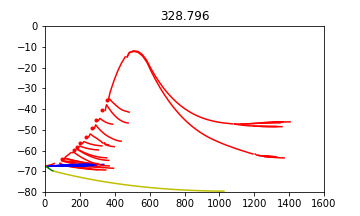
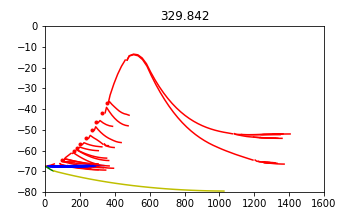
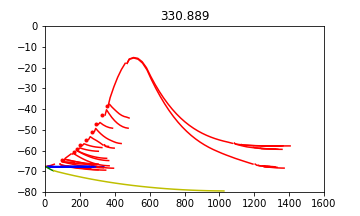
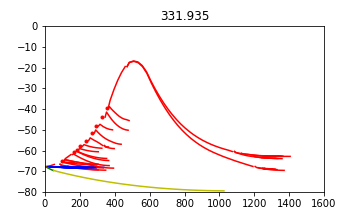
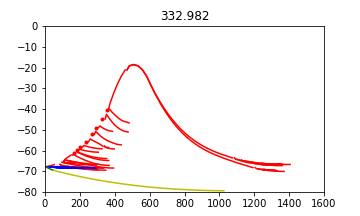
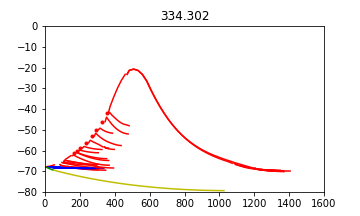
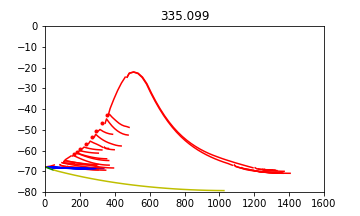
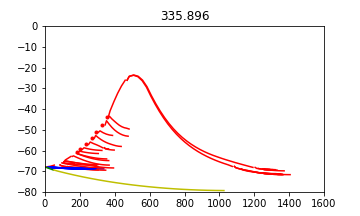
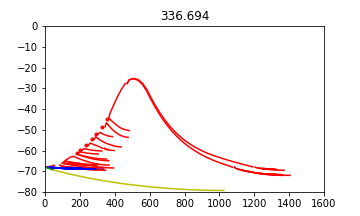
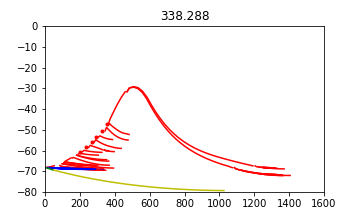
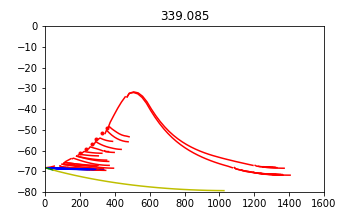
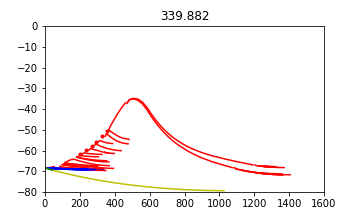
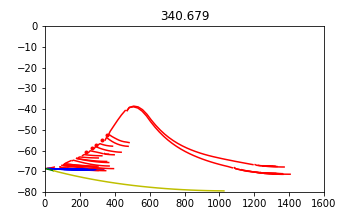
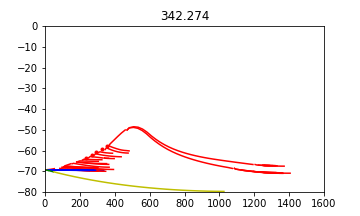
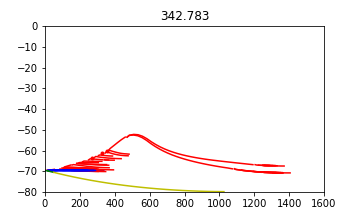
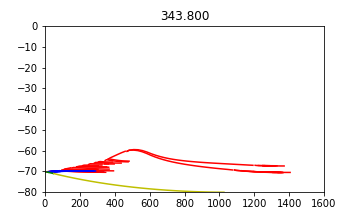
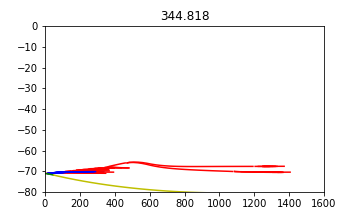
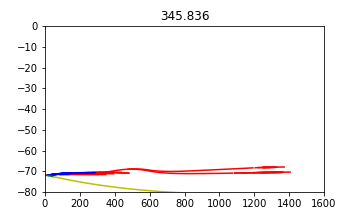
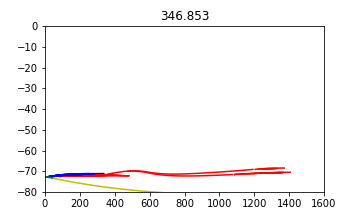
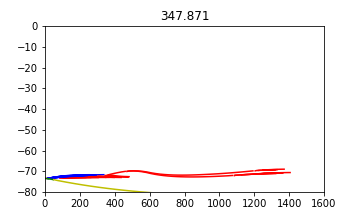
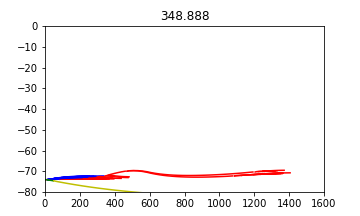

In [14]:
I.cell_to_ipython_animation(cell, tstart = 295, tend = 350, embedded = True)


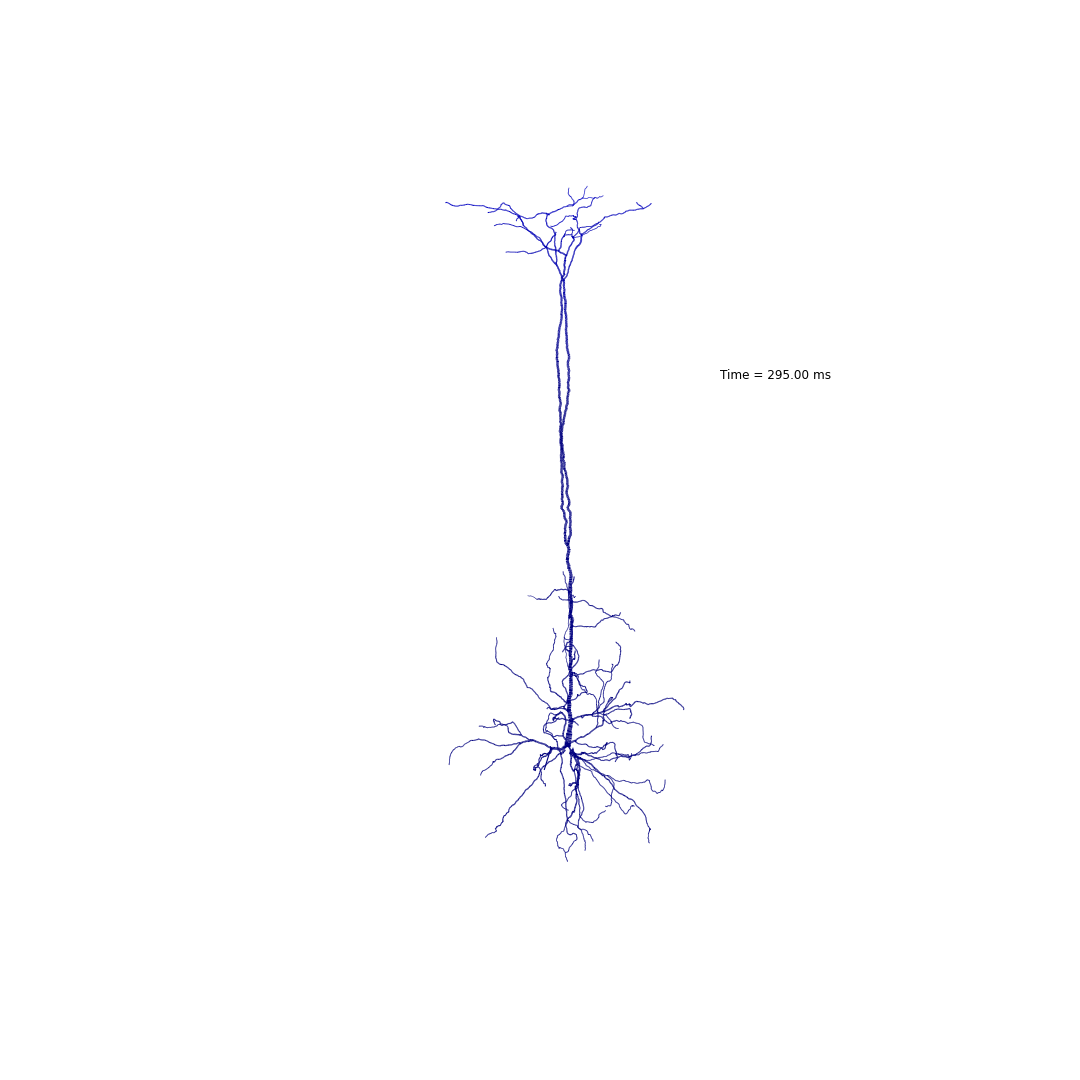
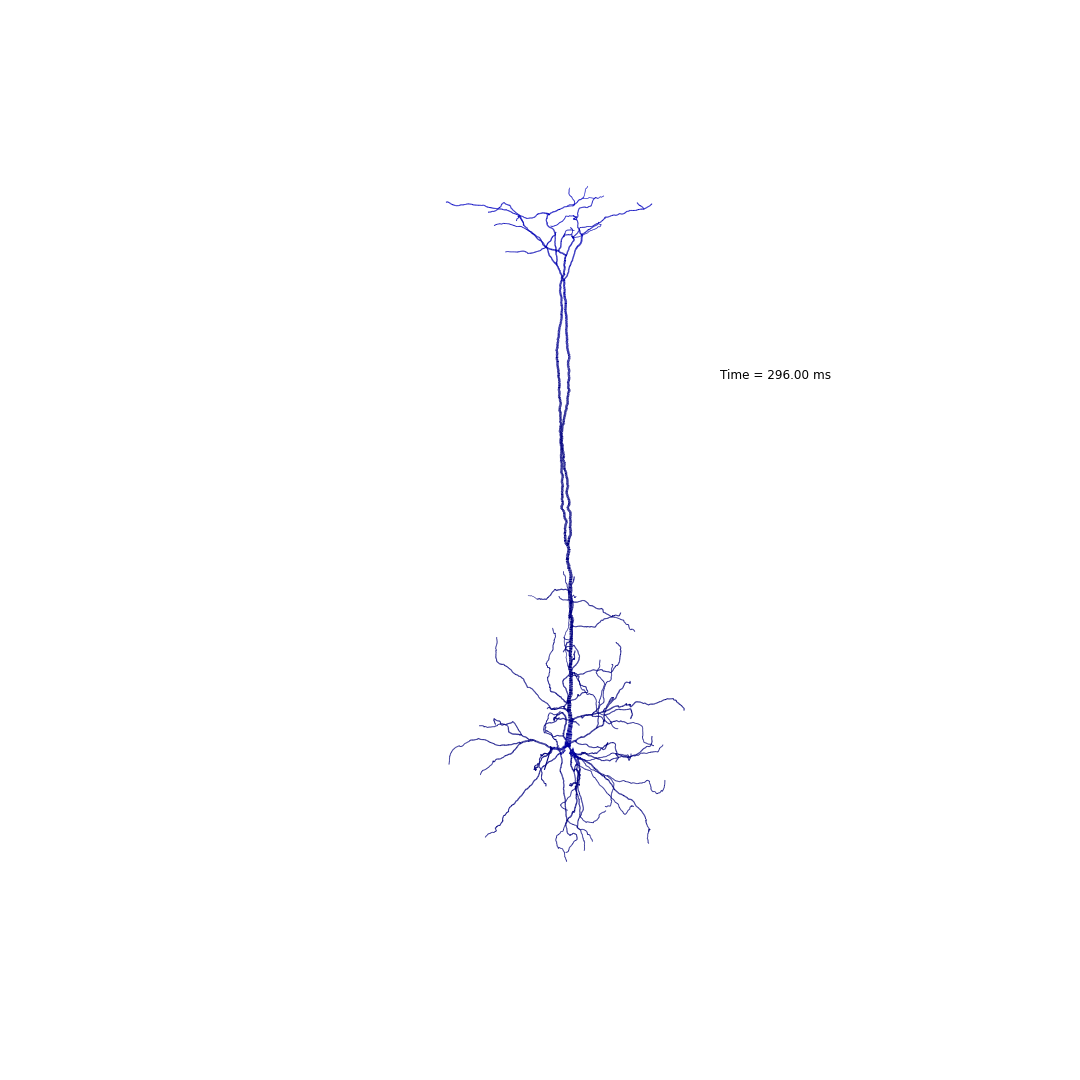
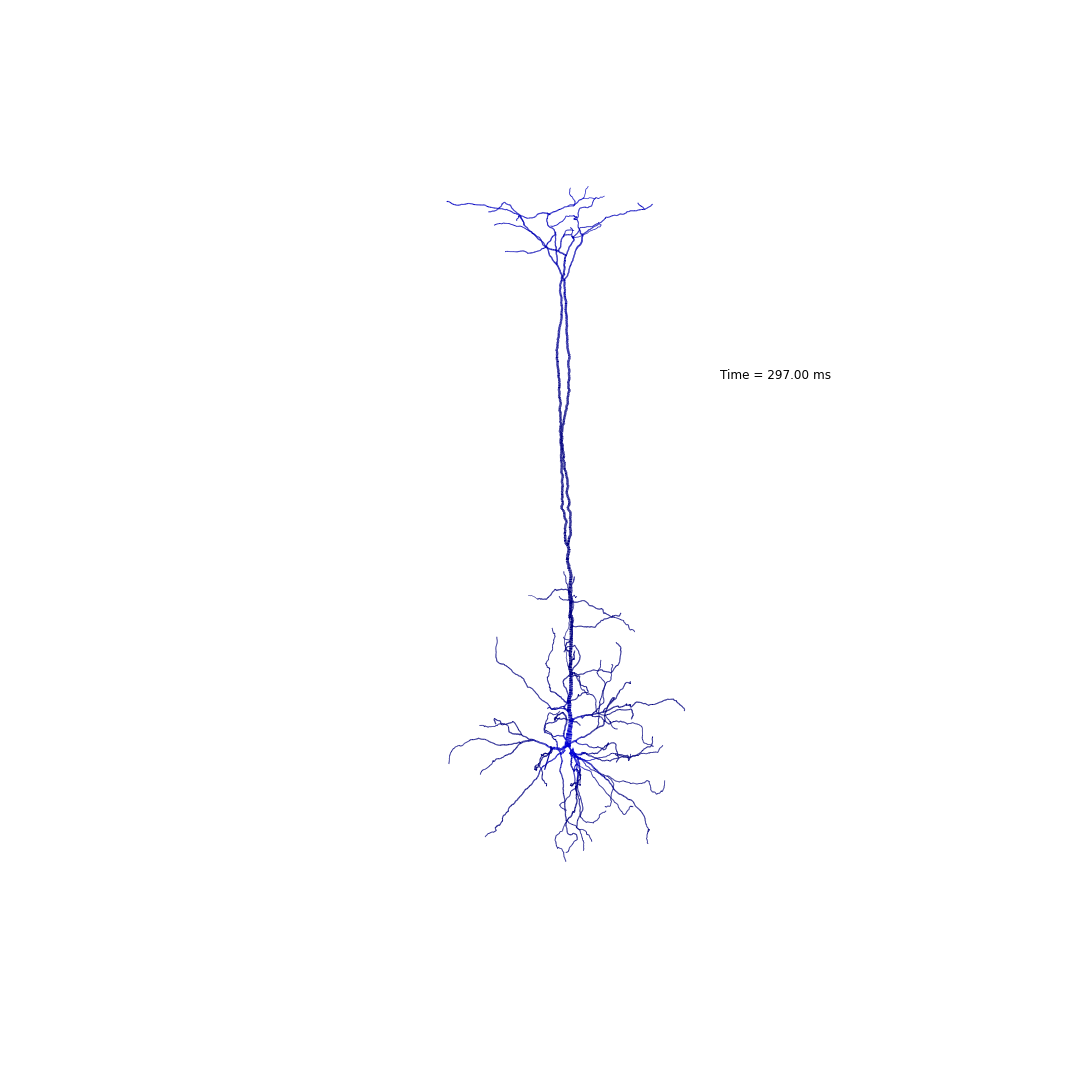
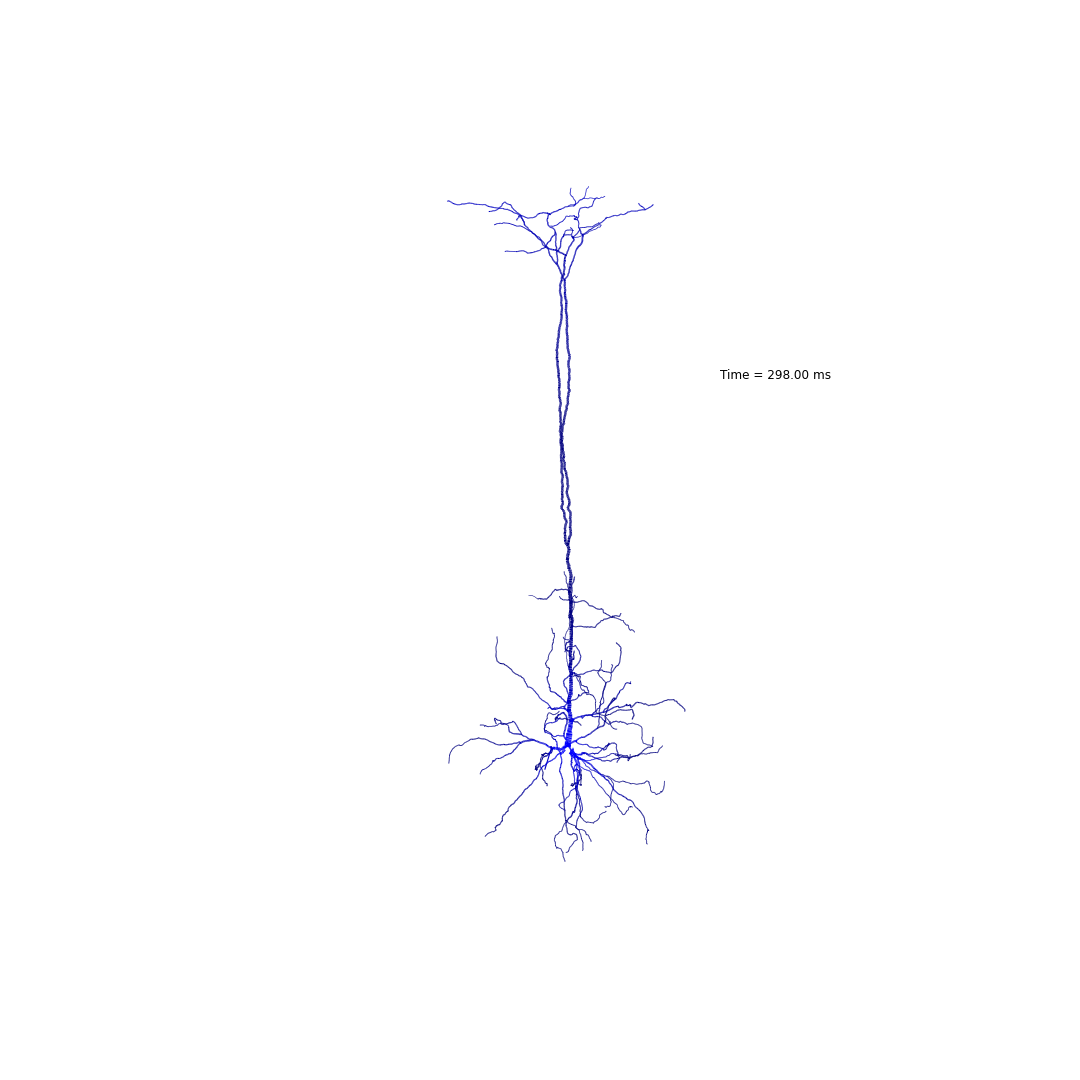
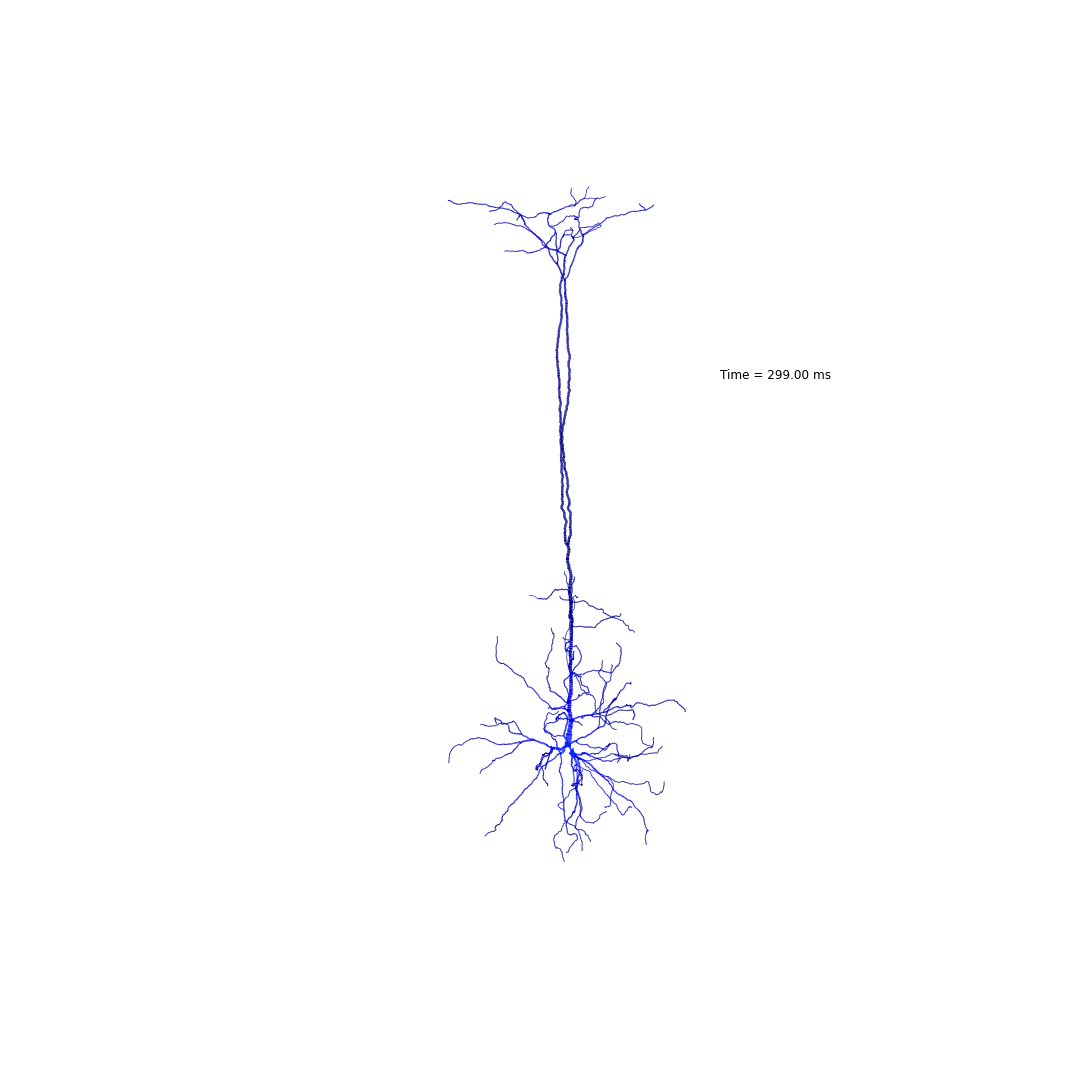
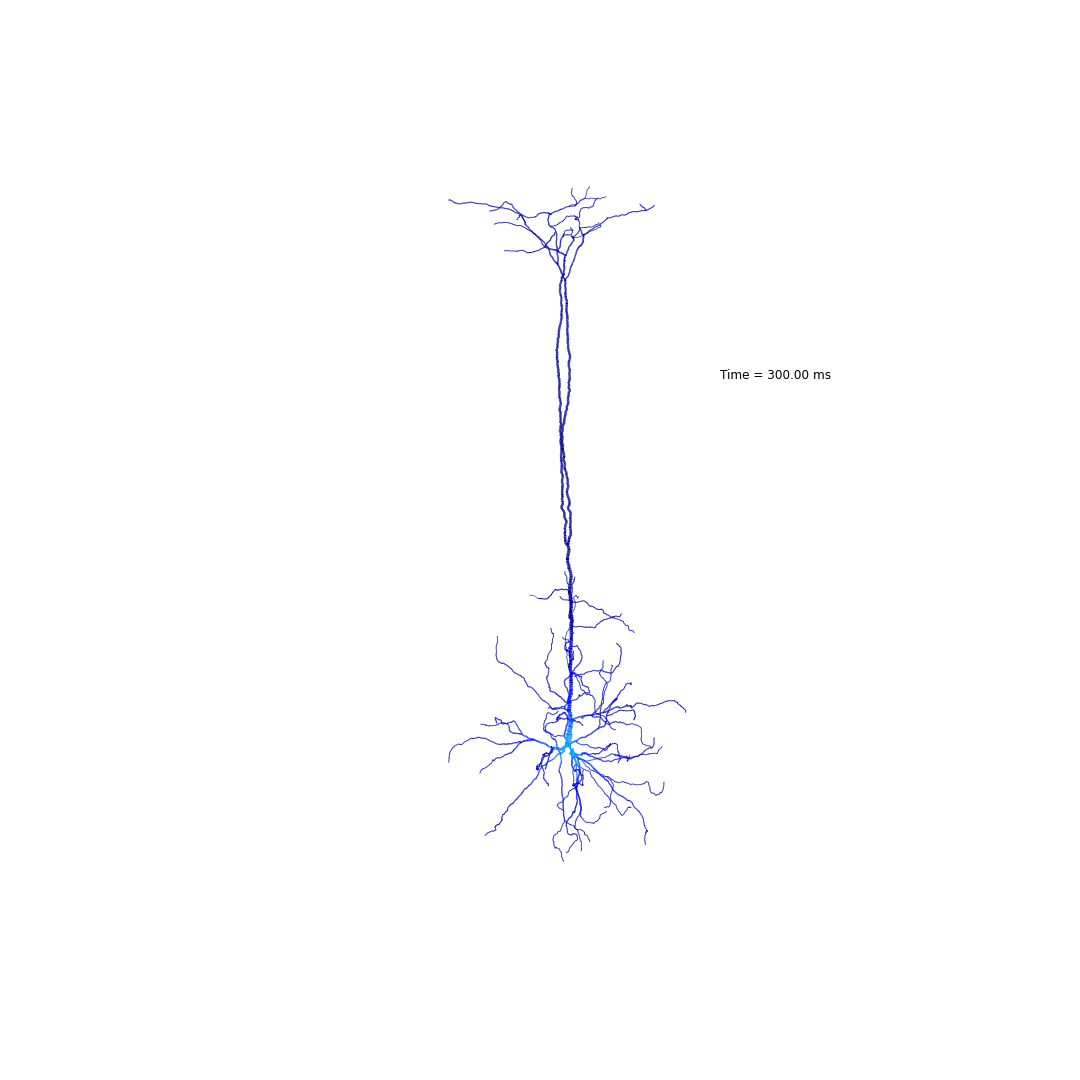
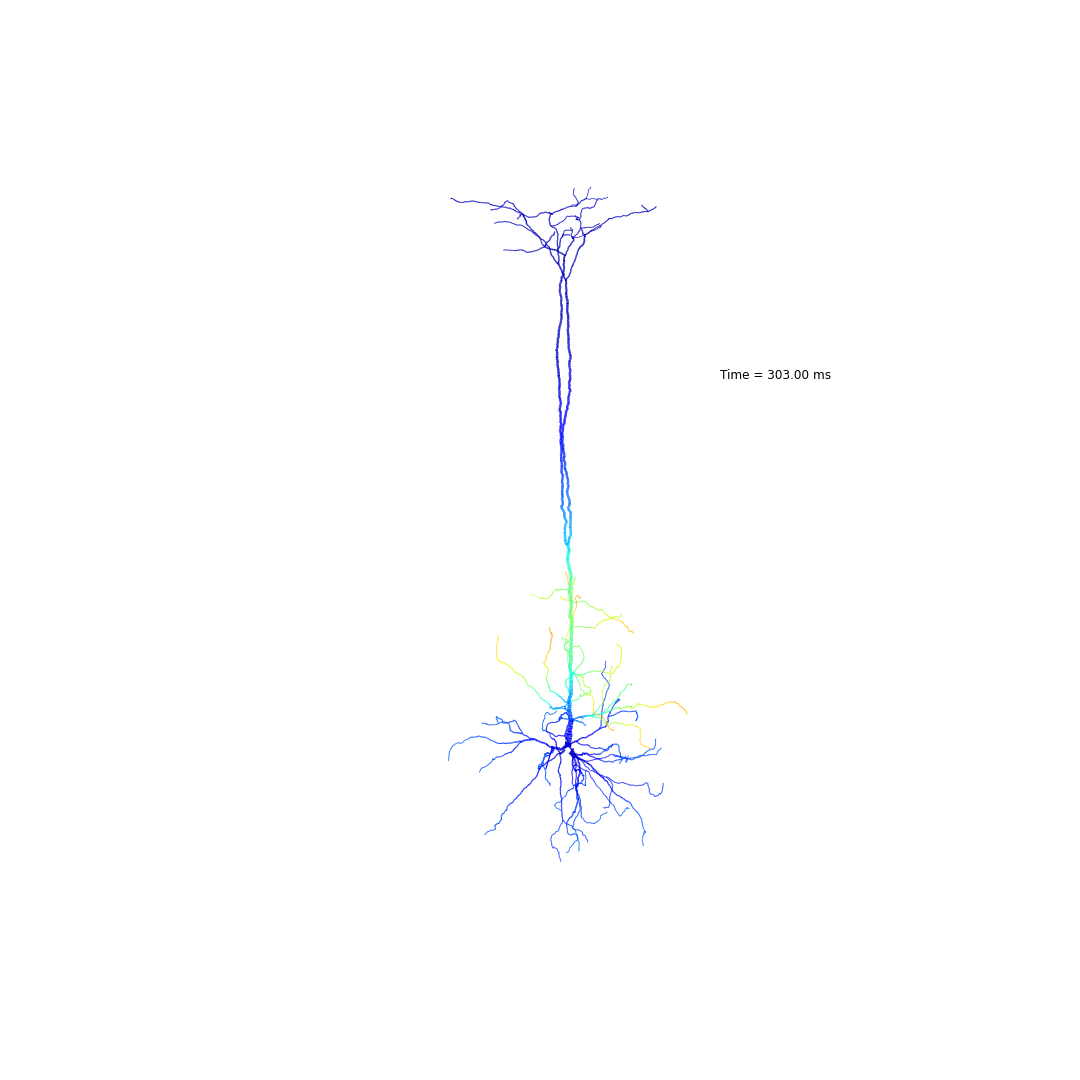
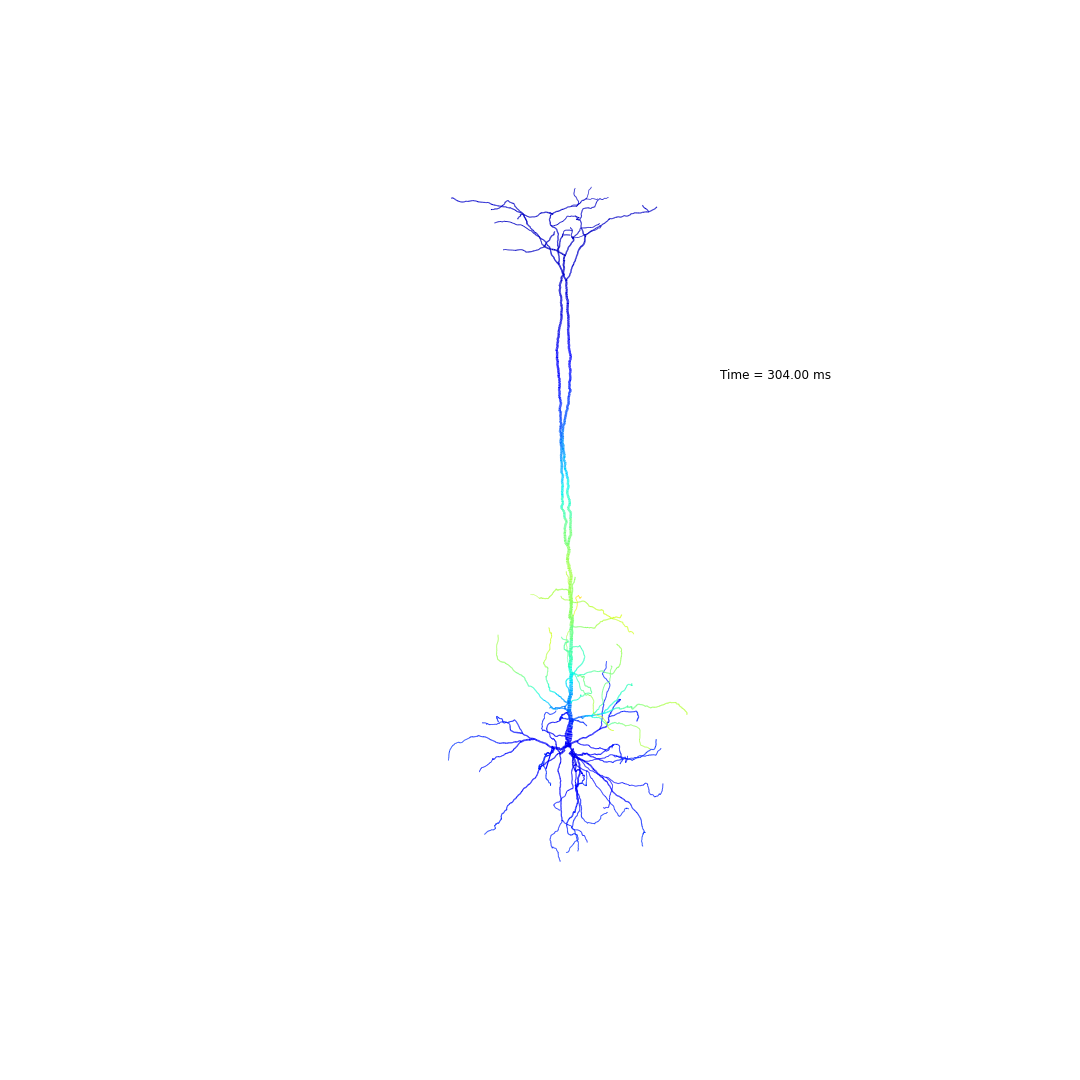
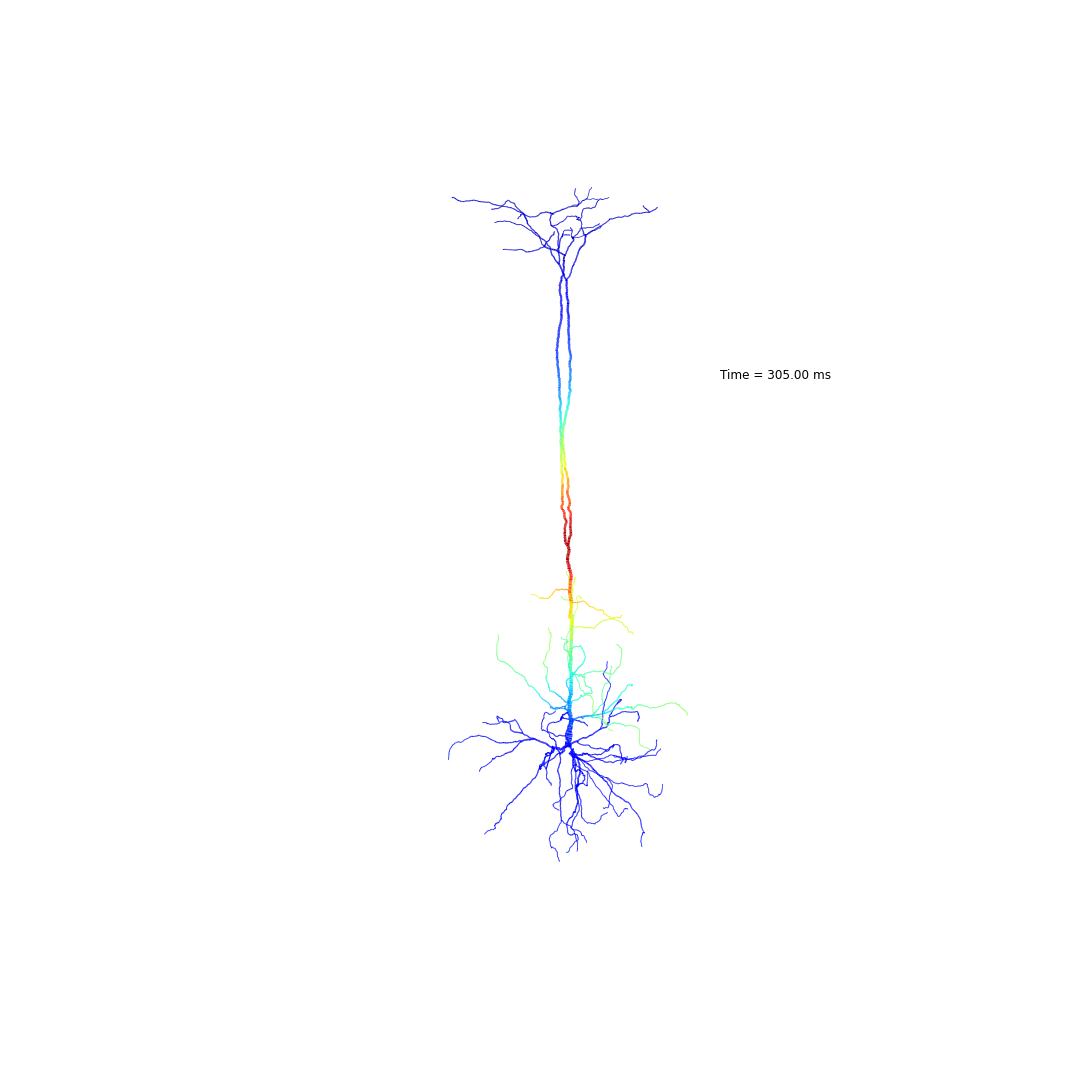
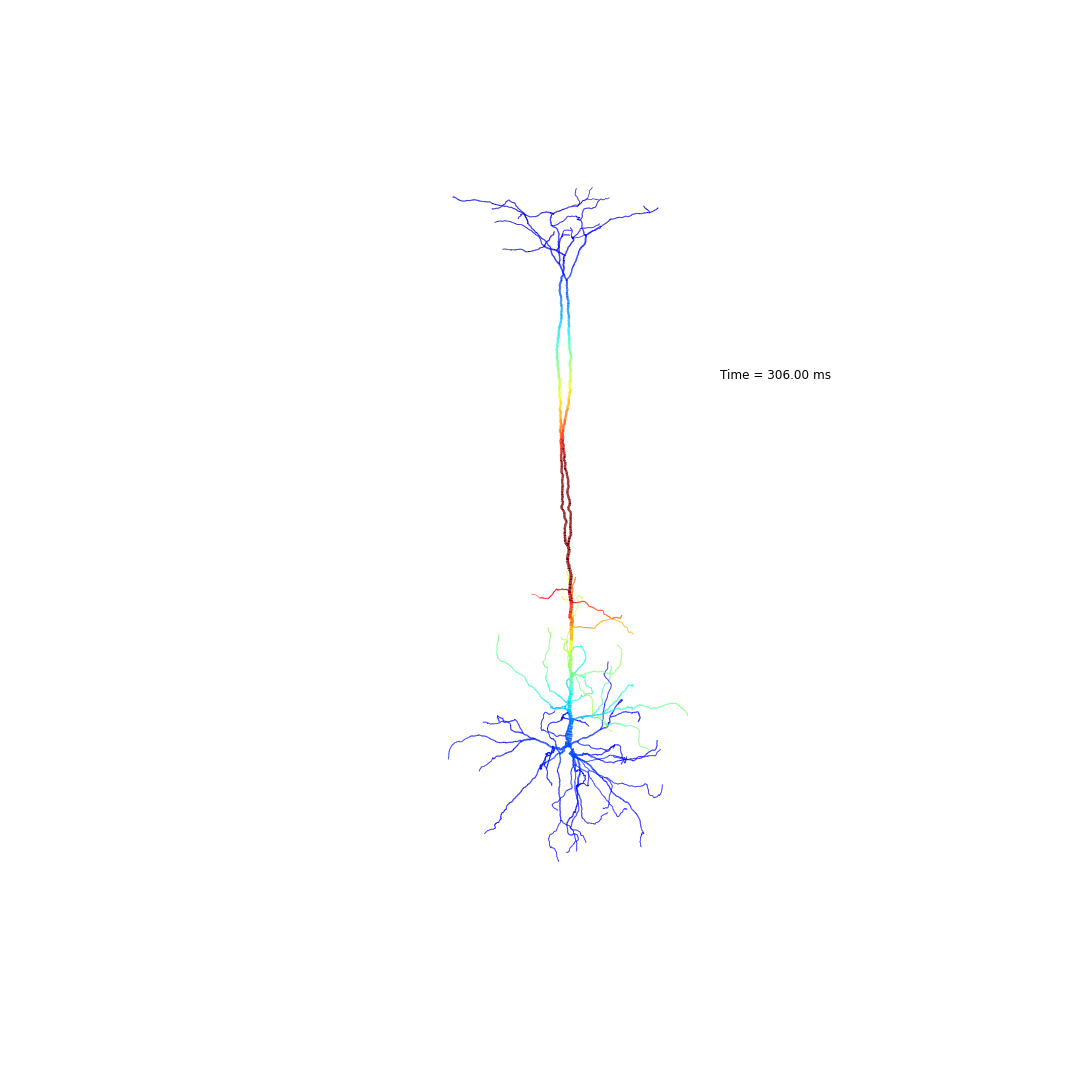
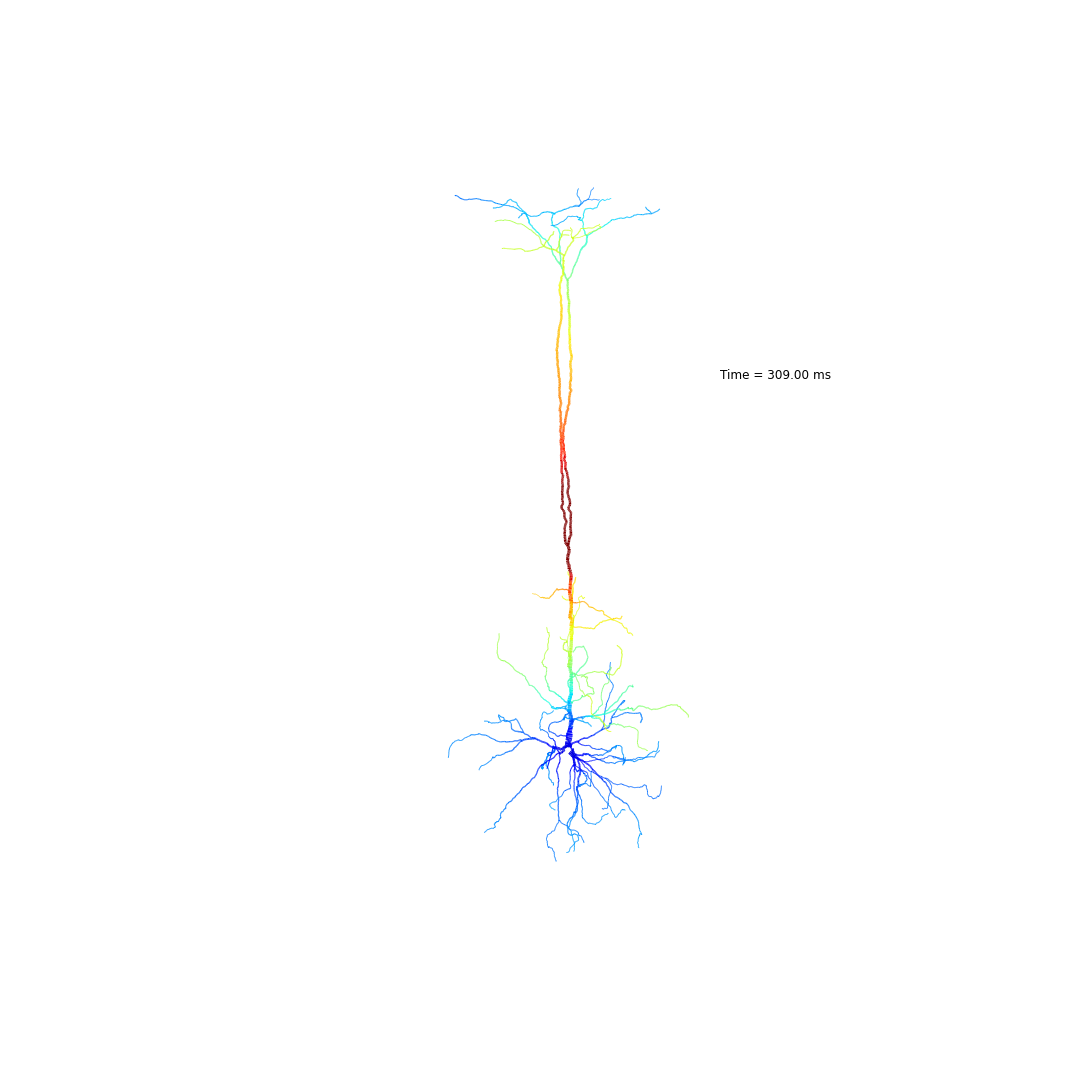
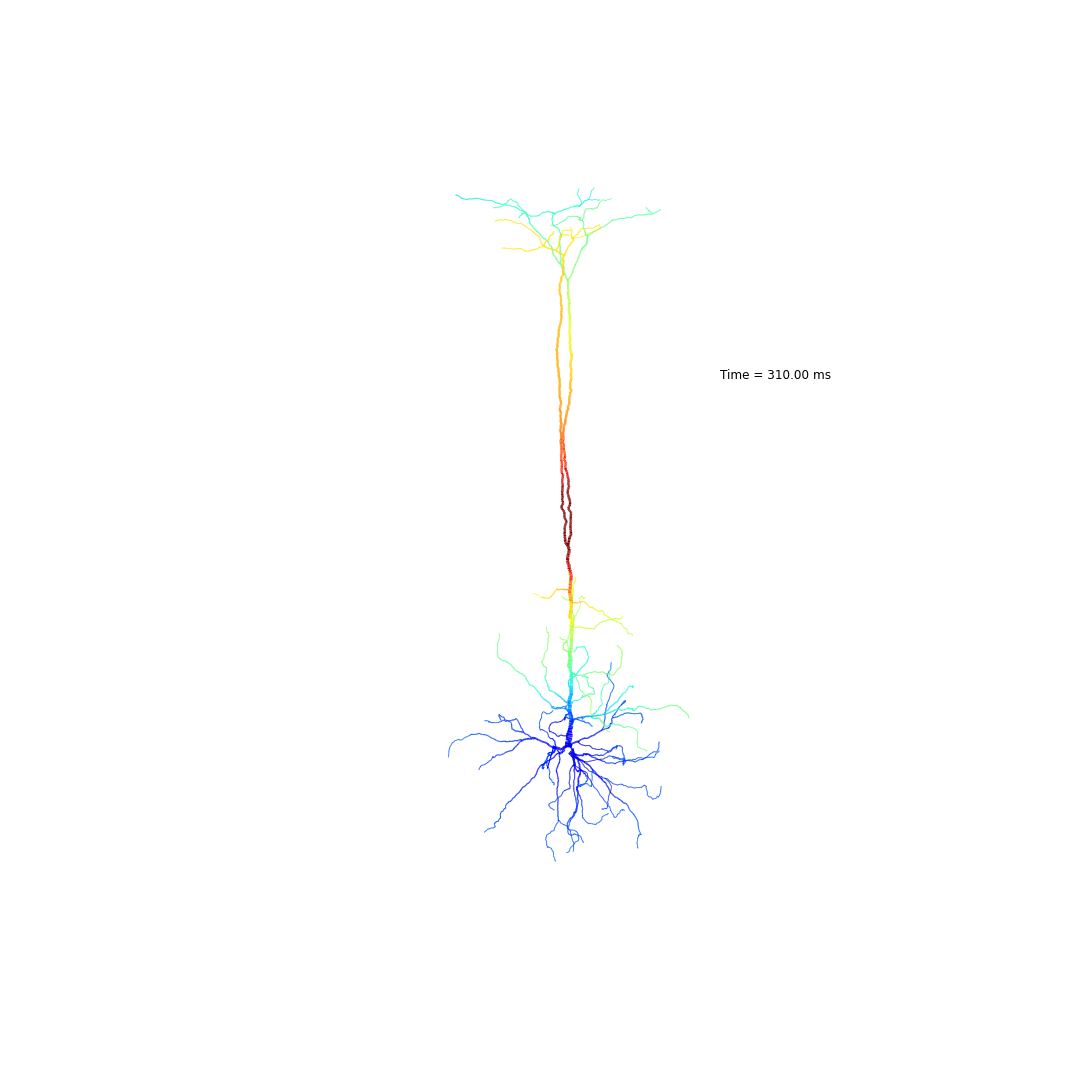
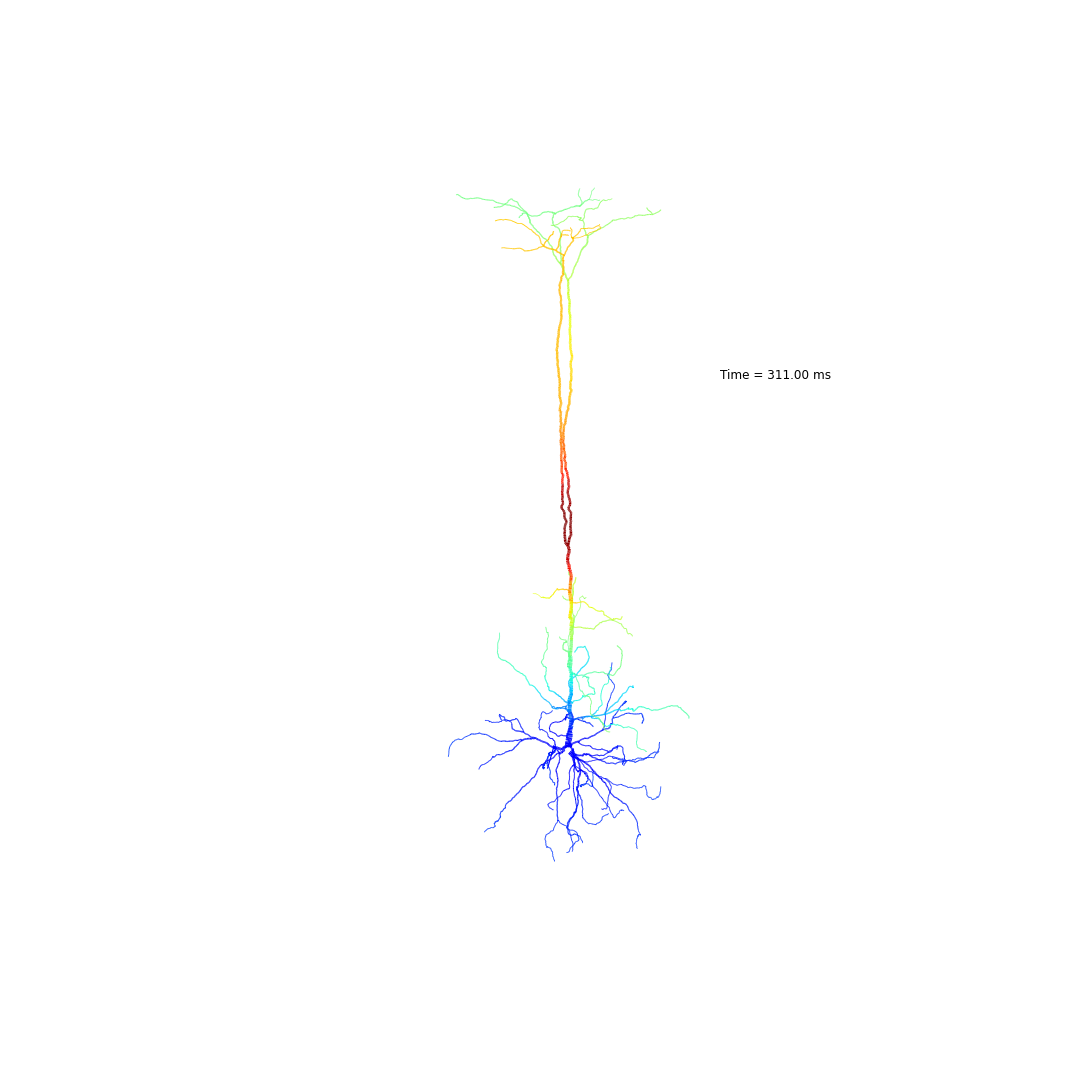
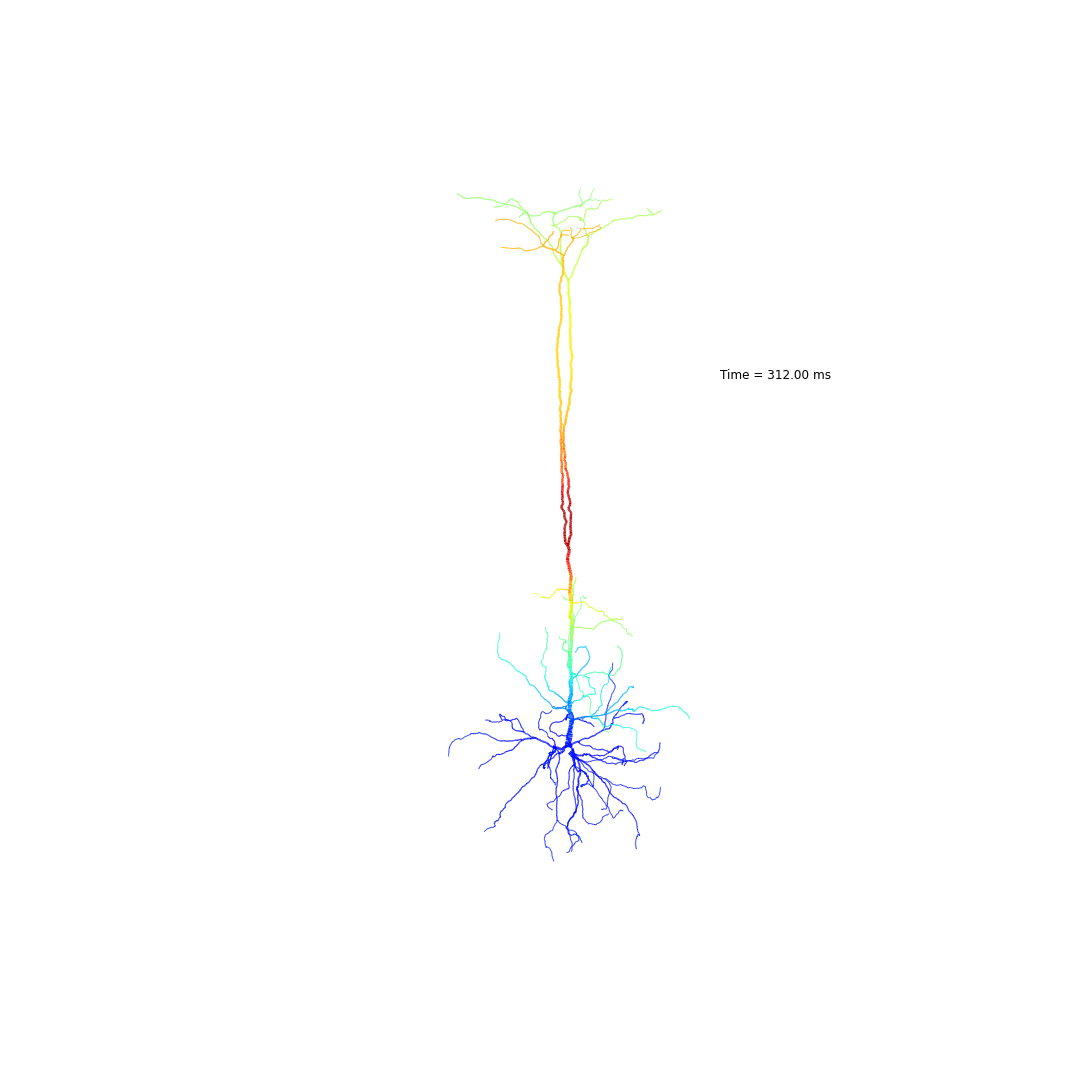
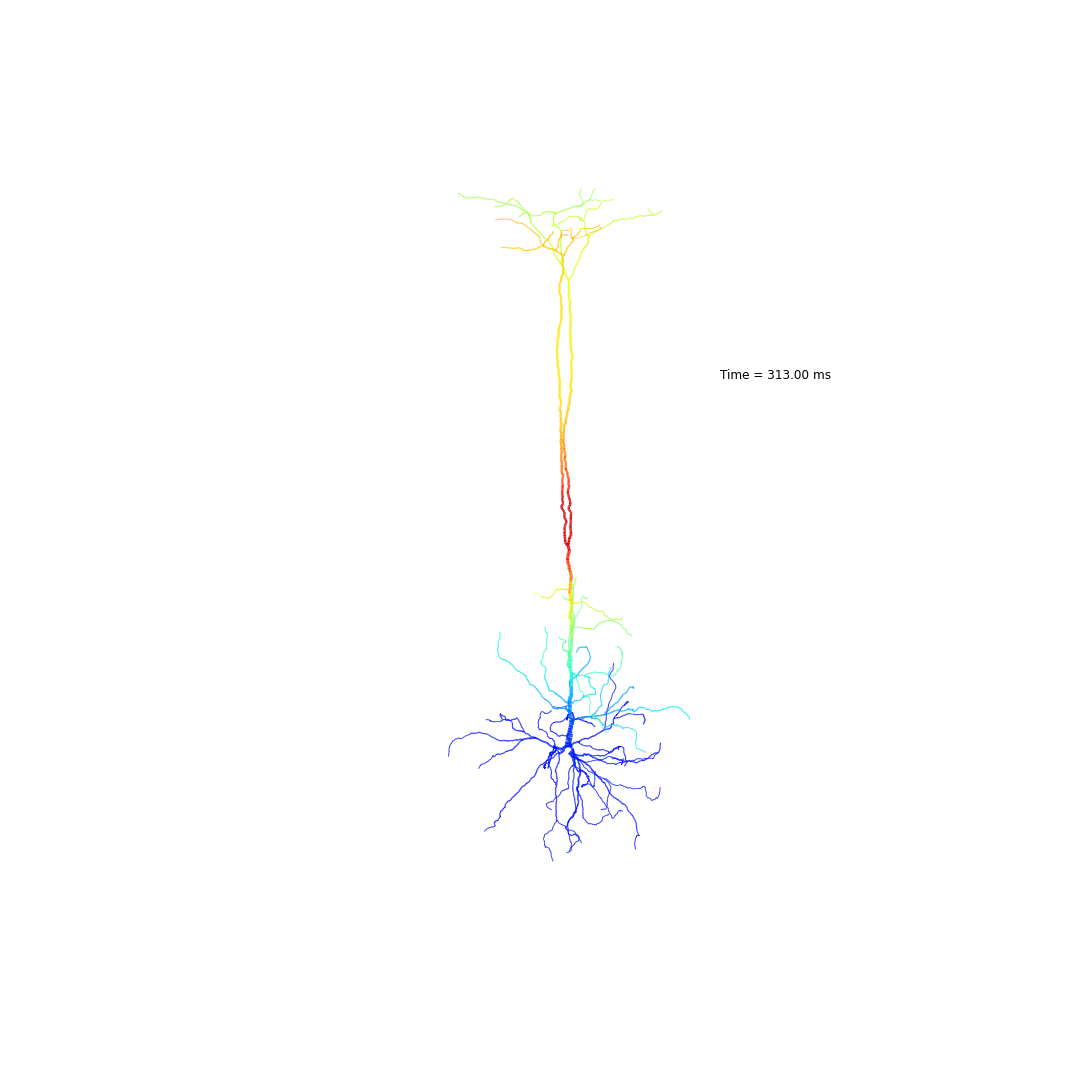
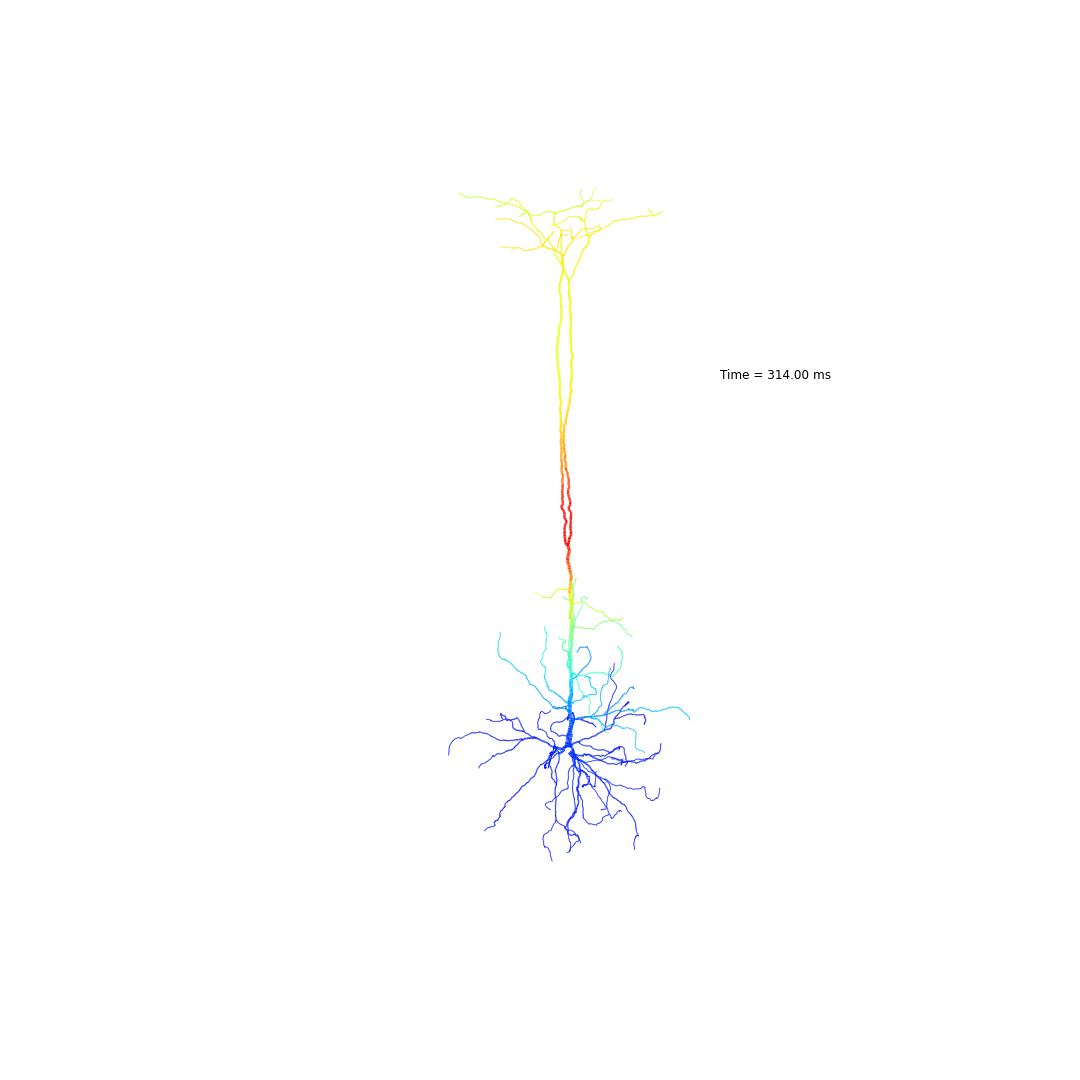
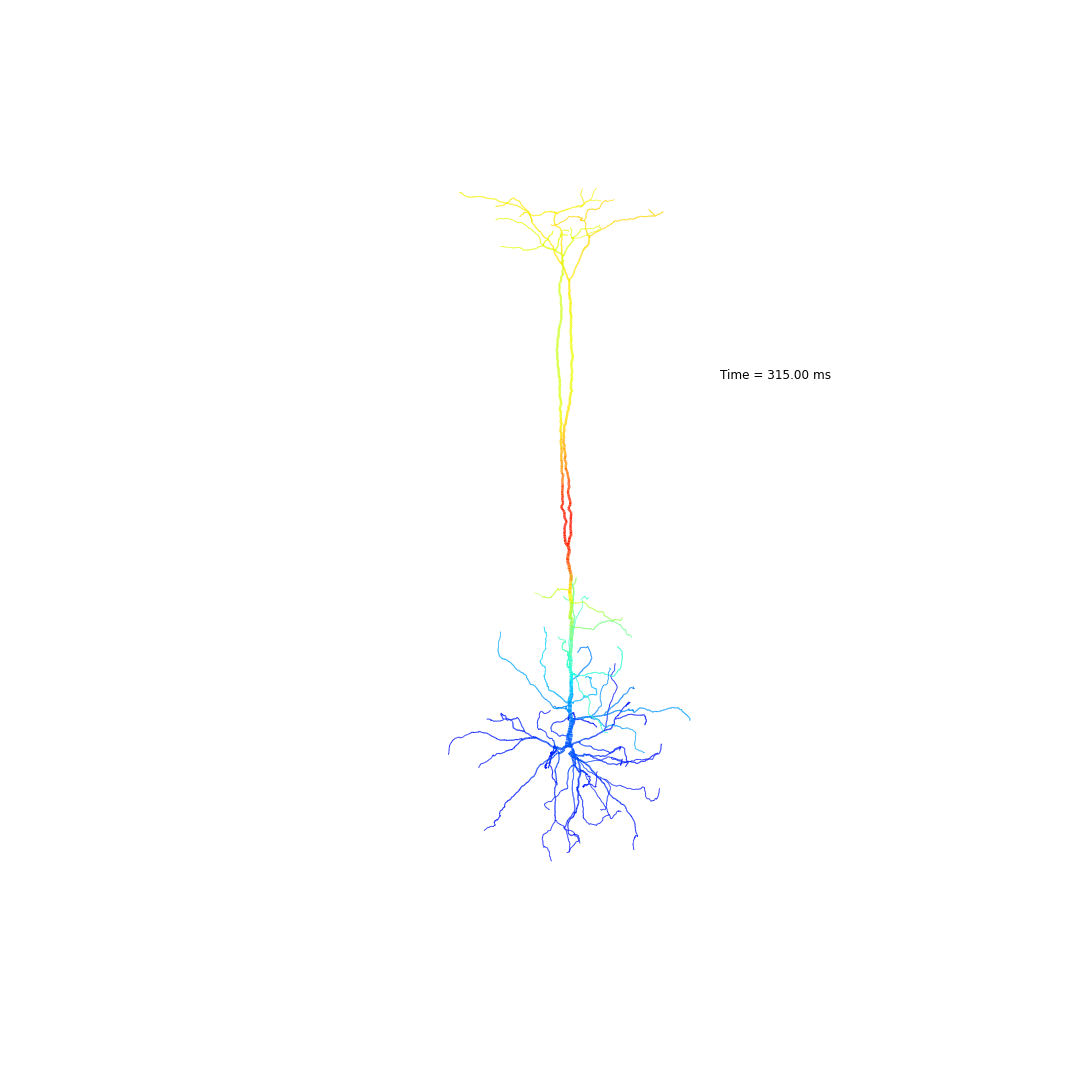
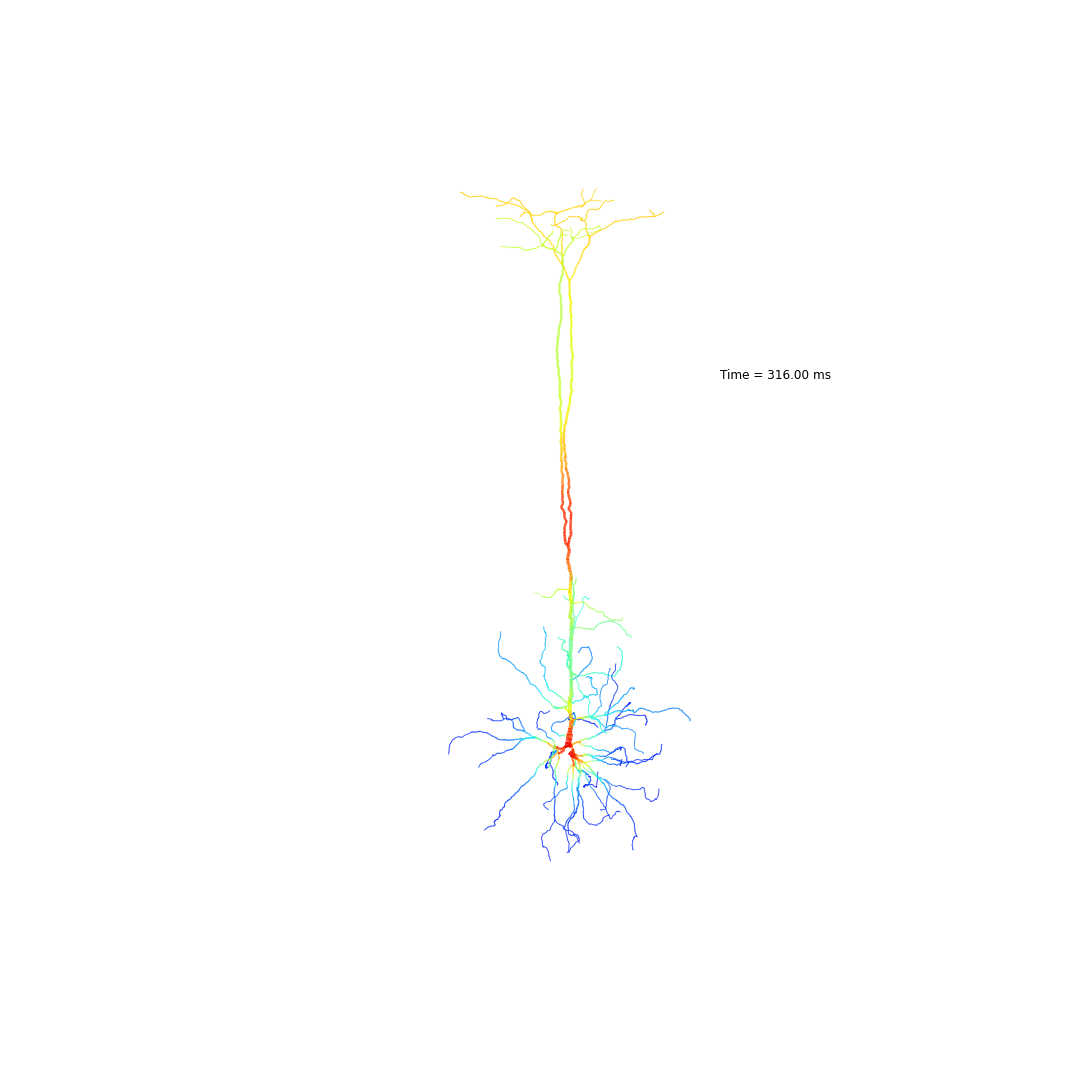
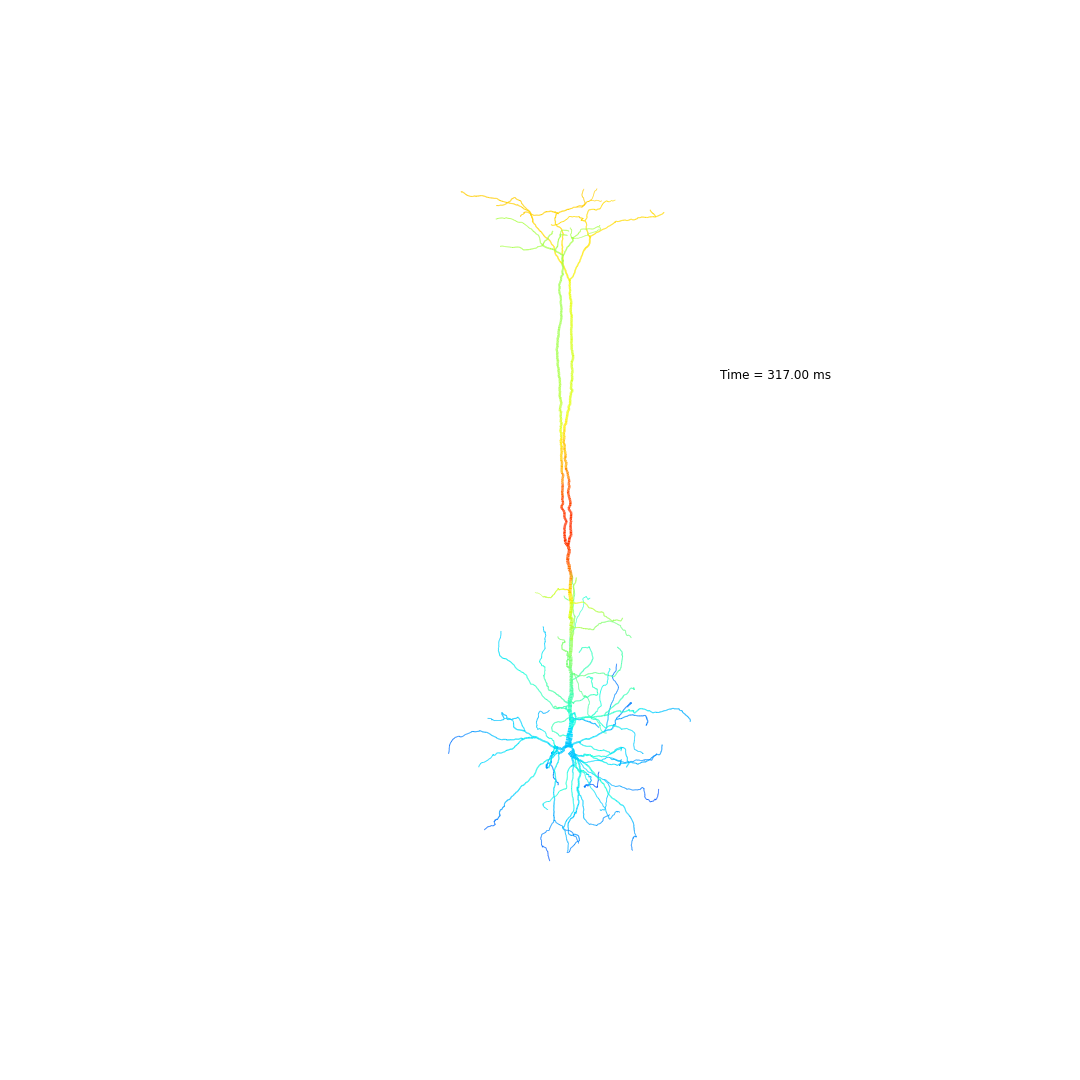
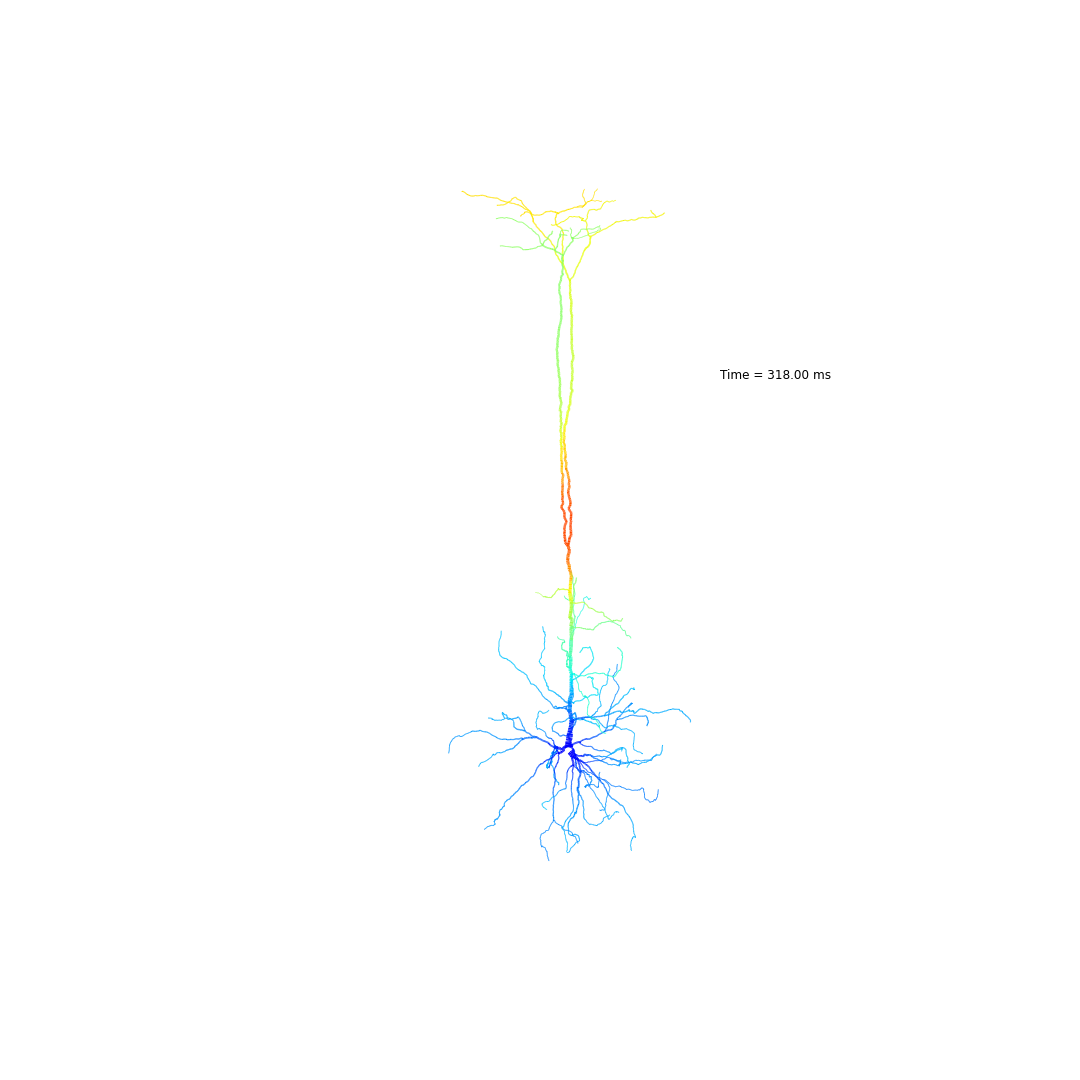
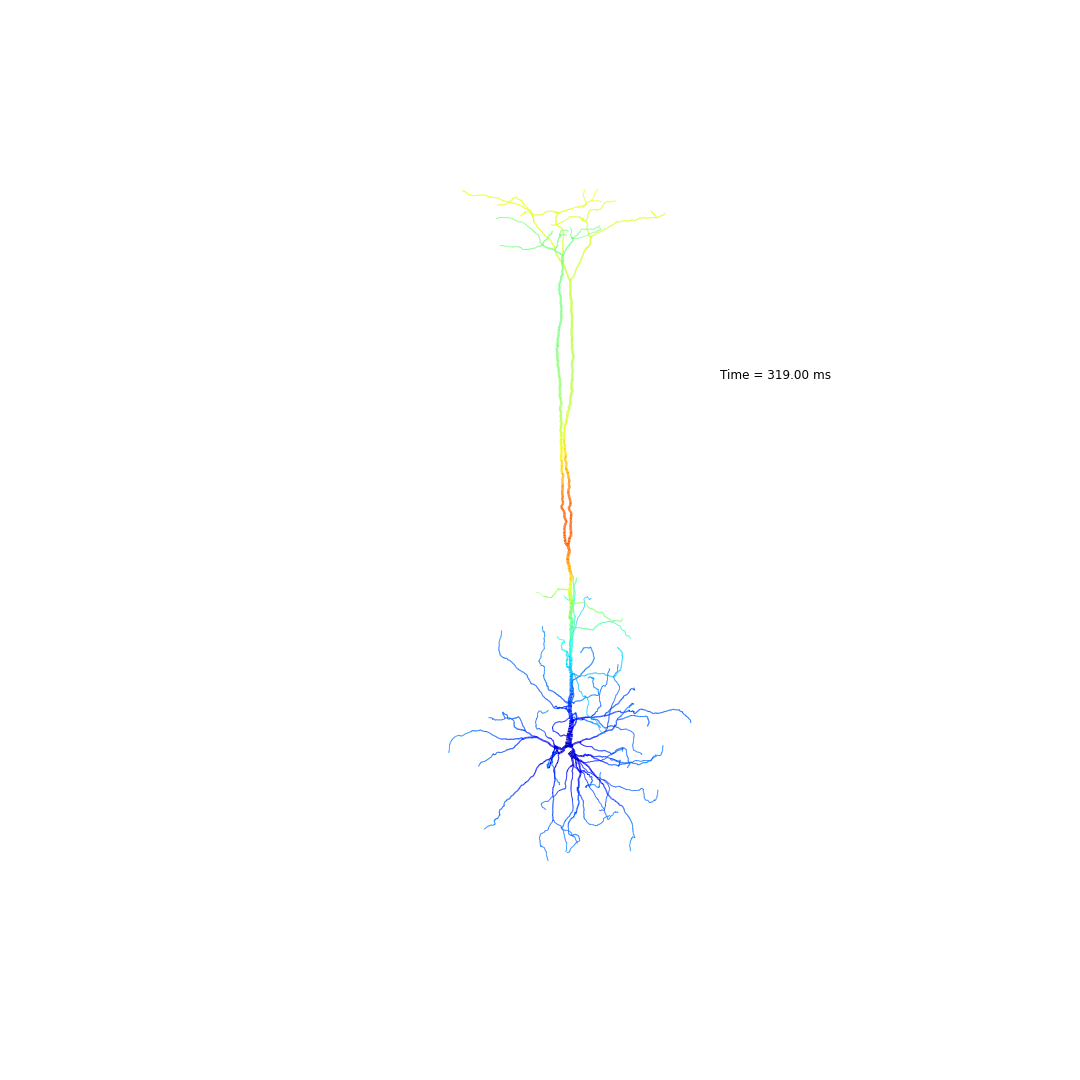
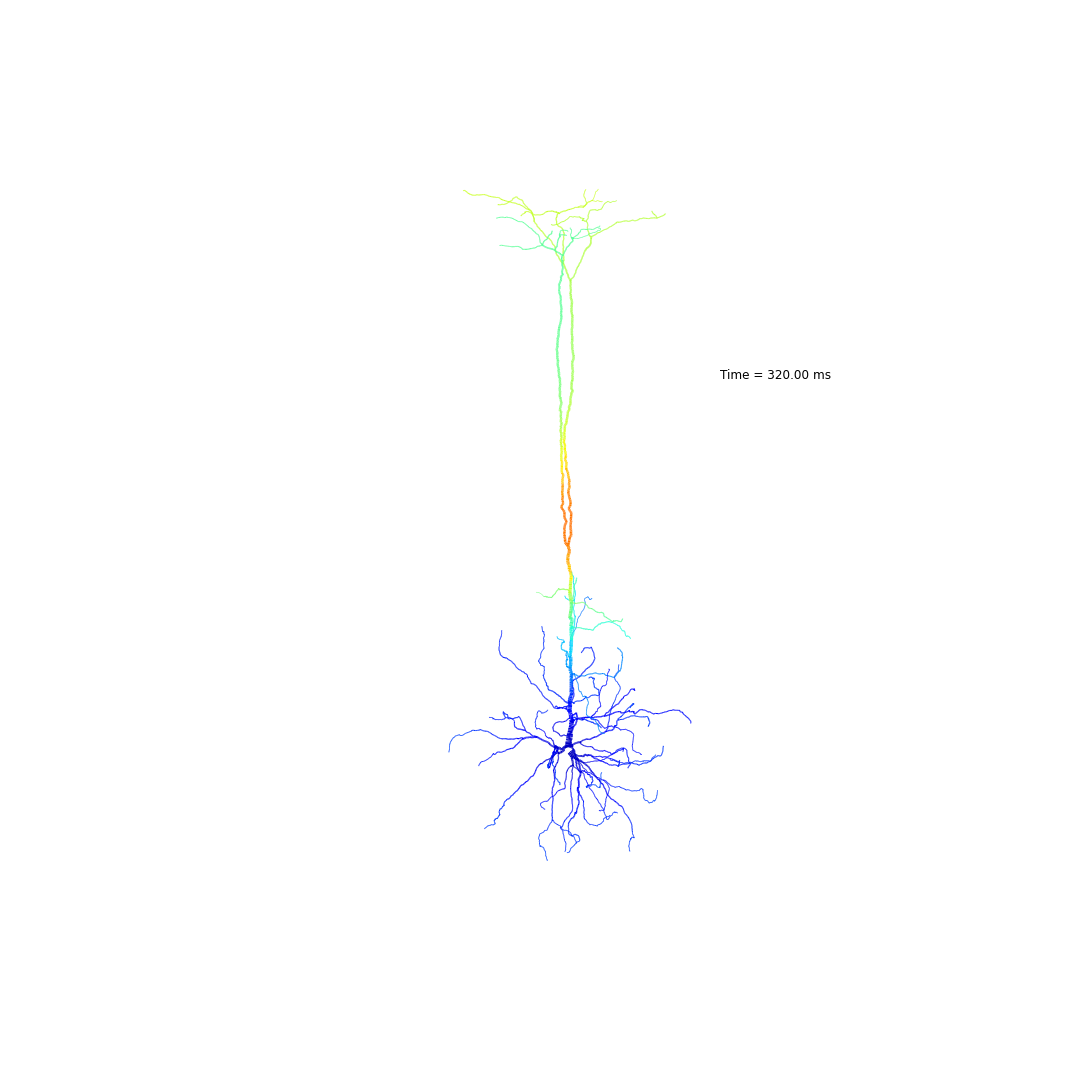
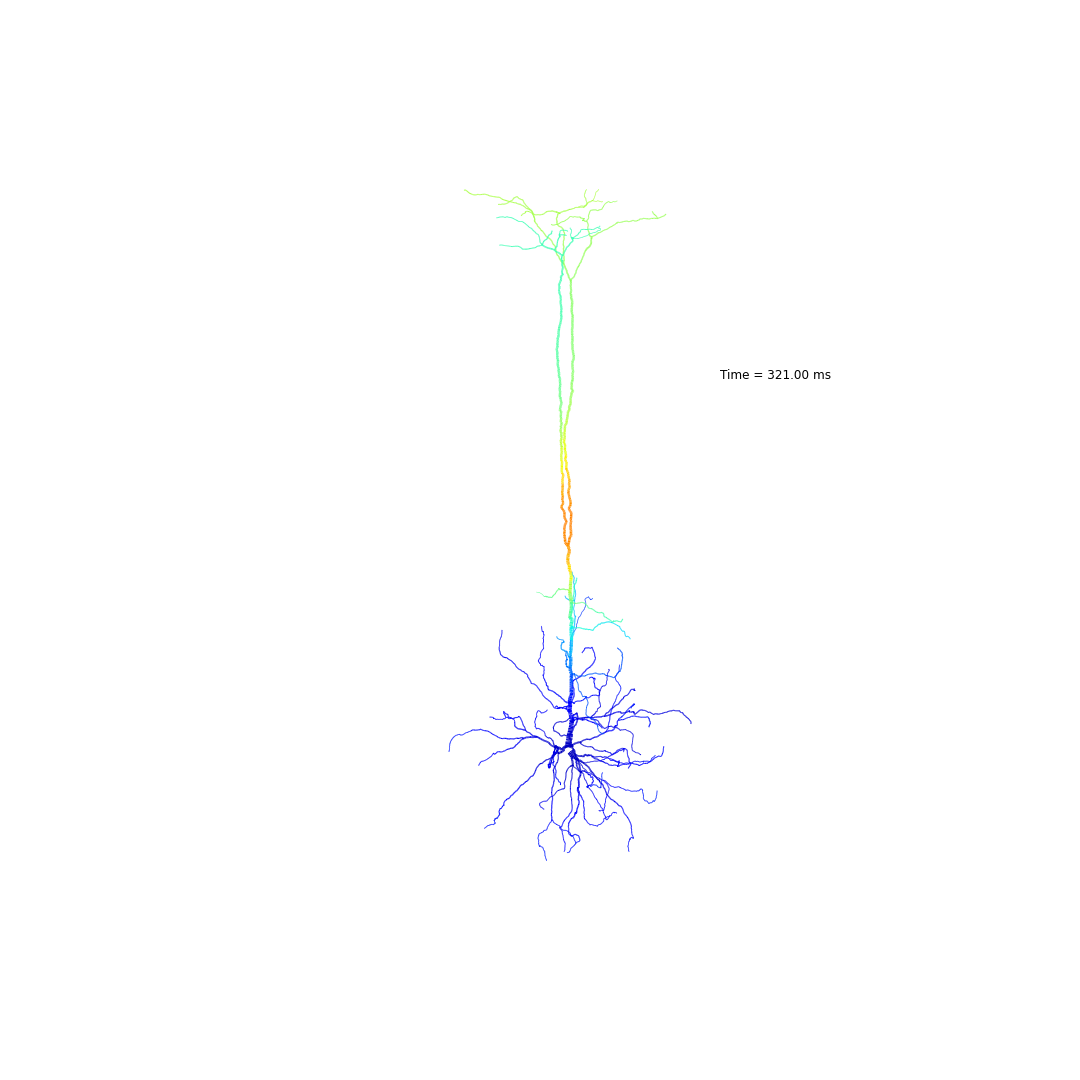
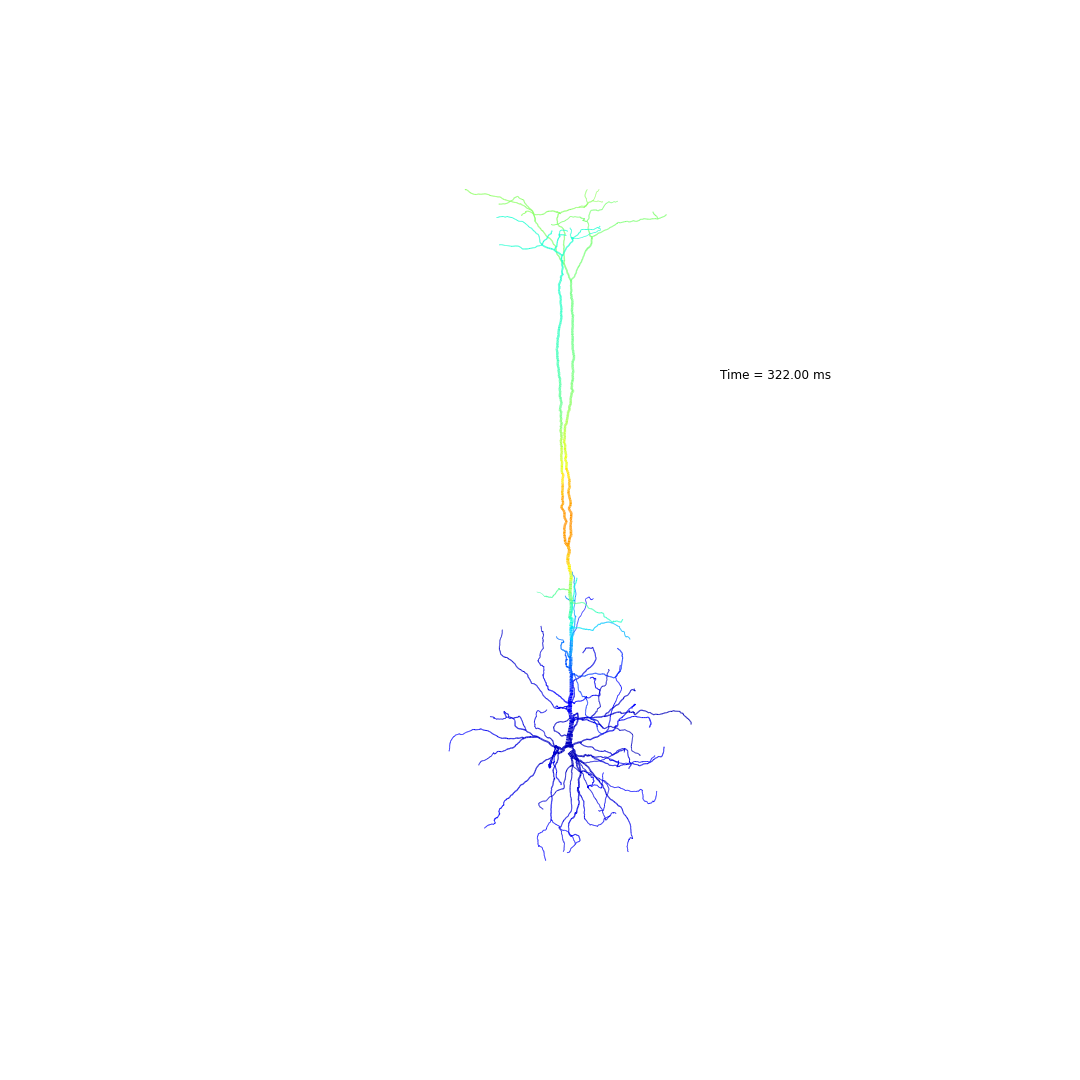
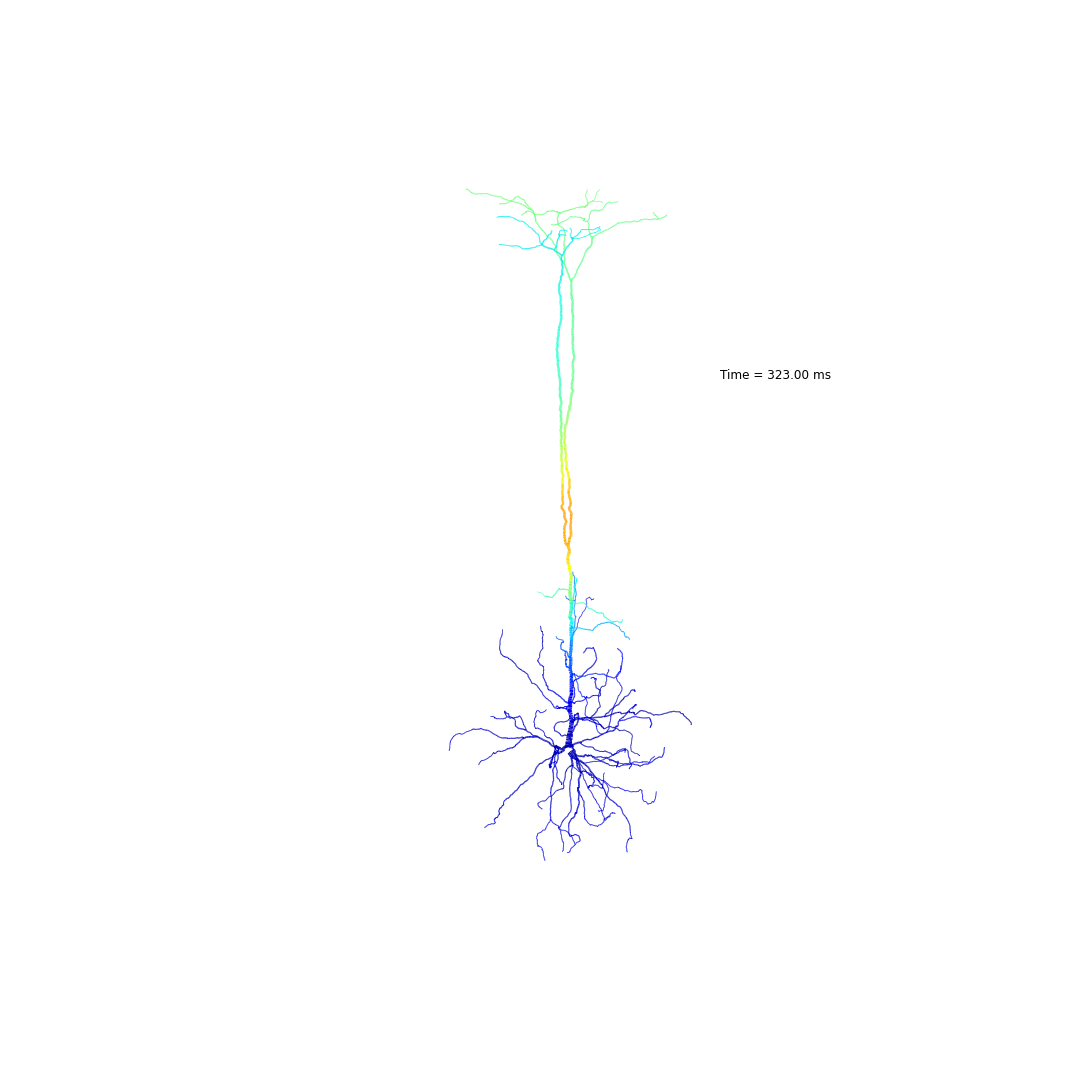
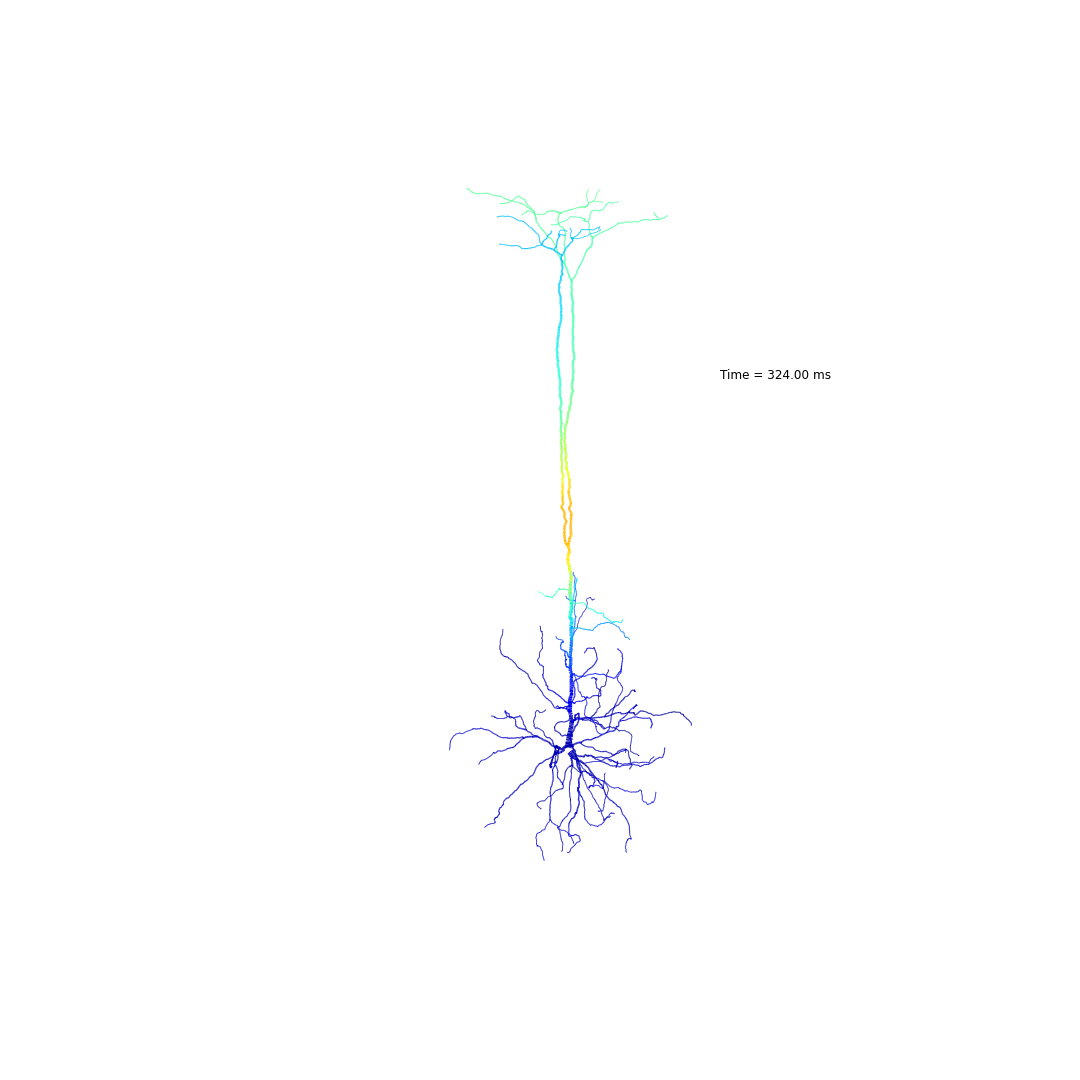
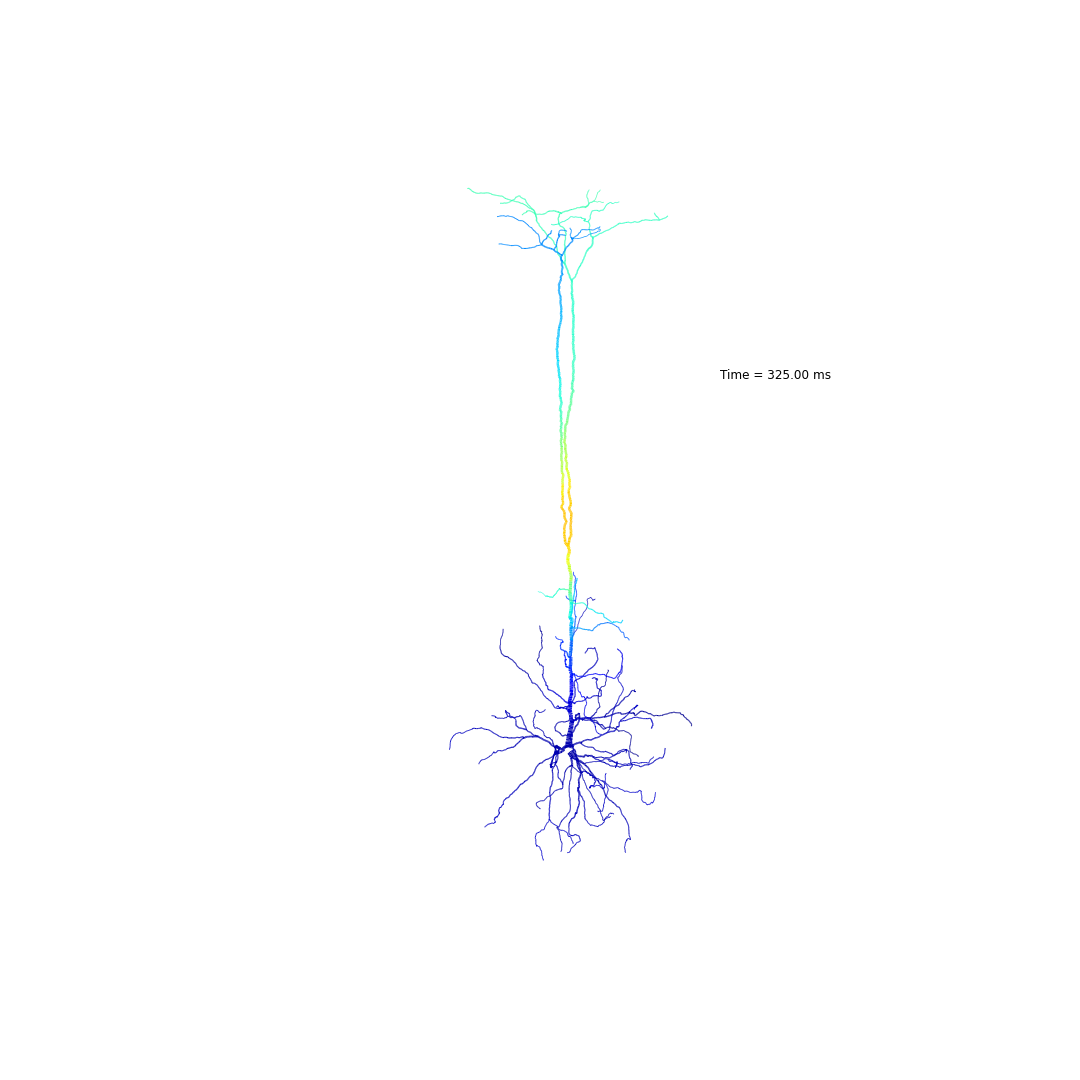
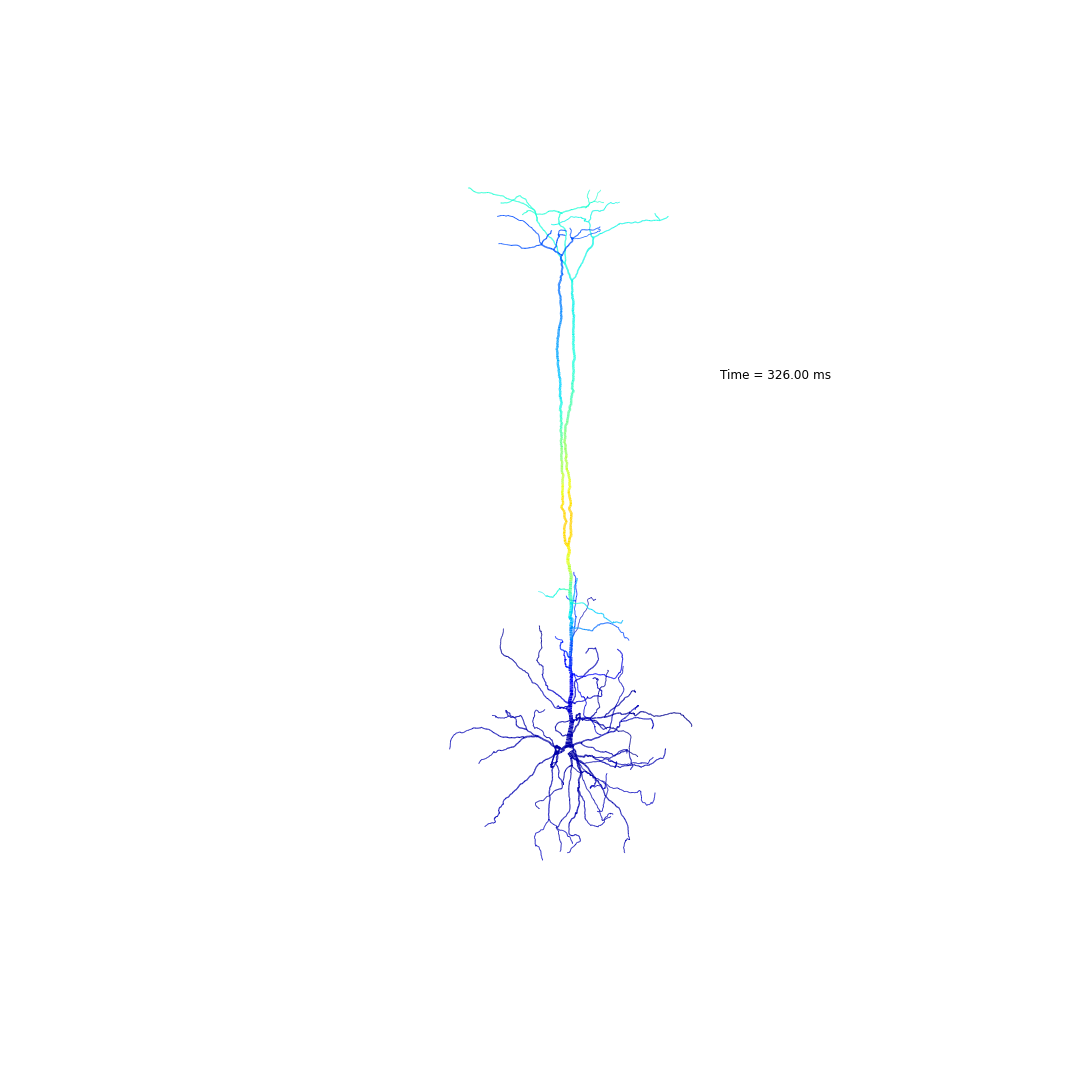
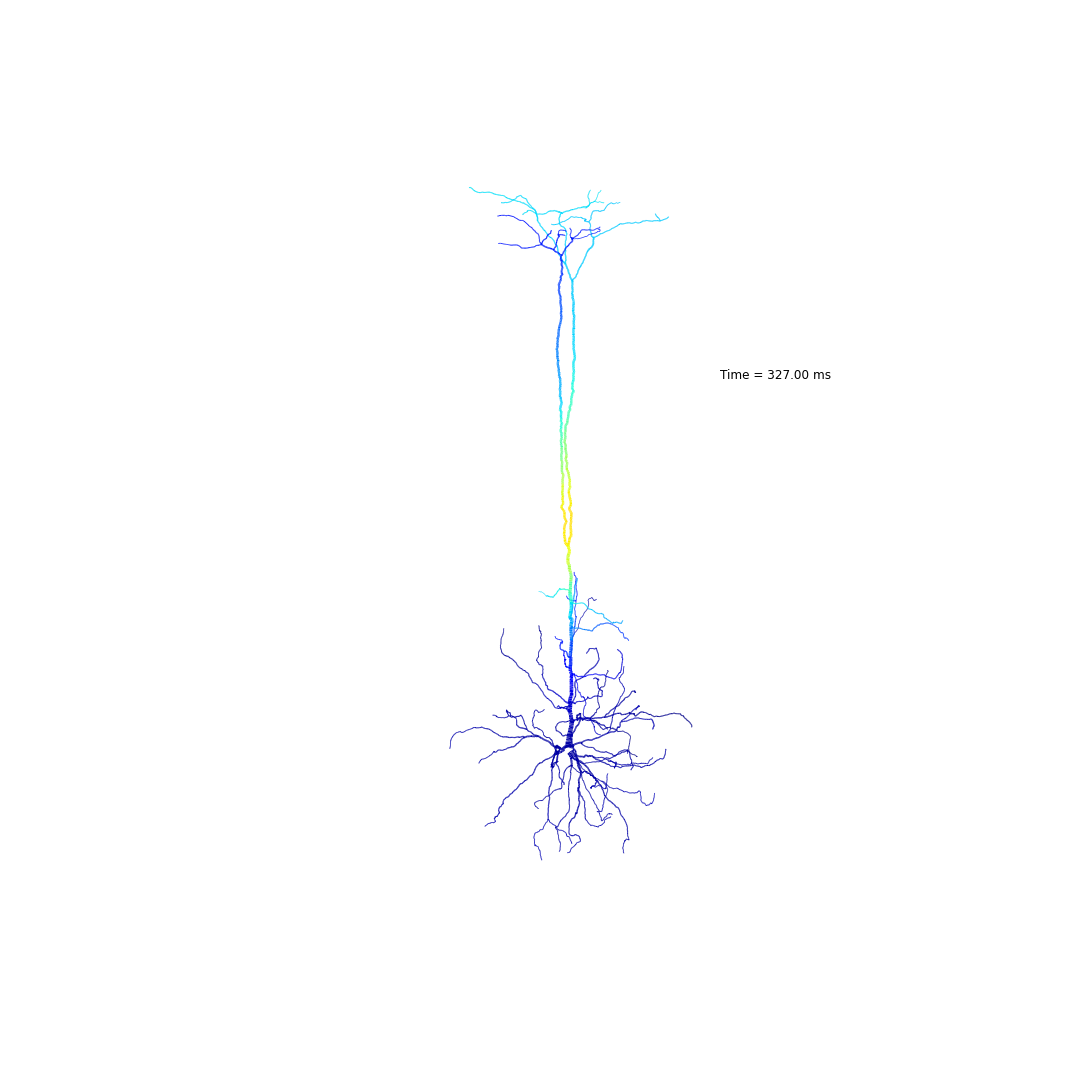
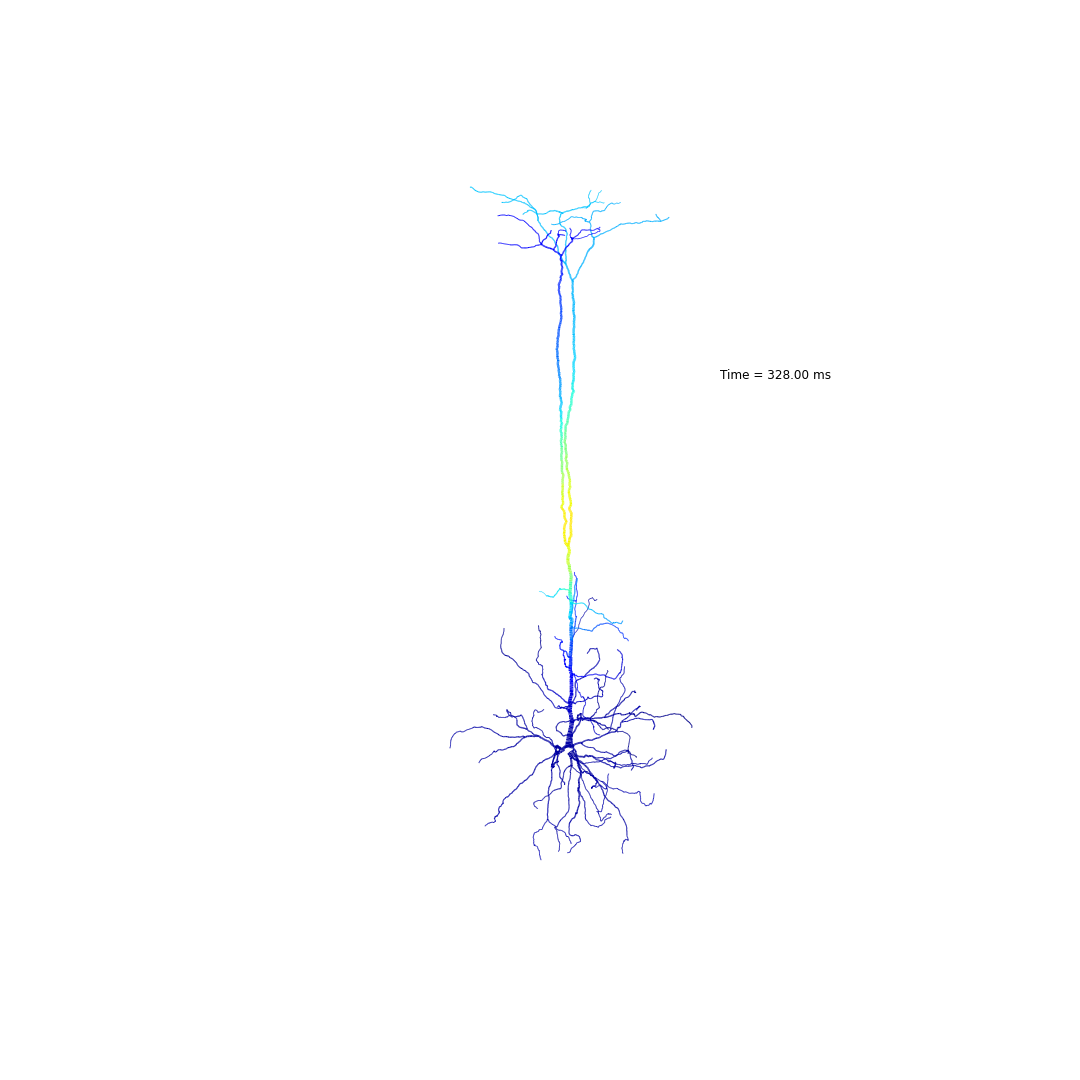
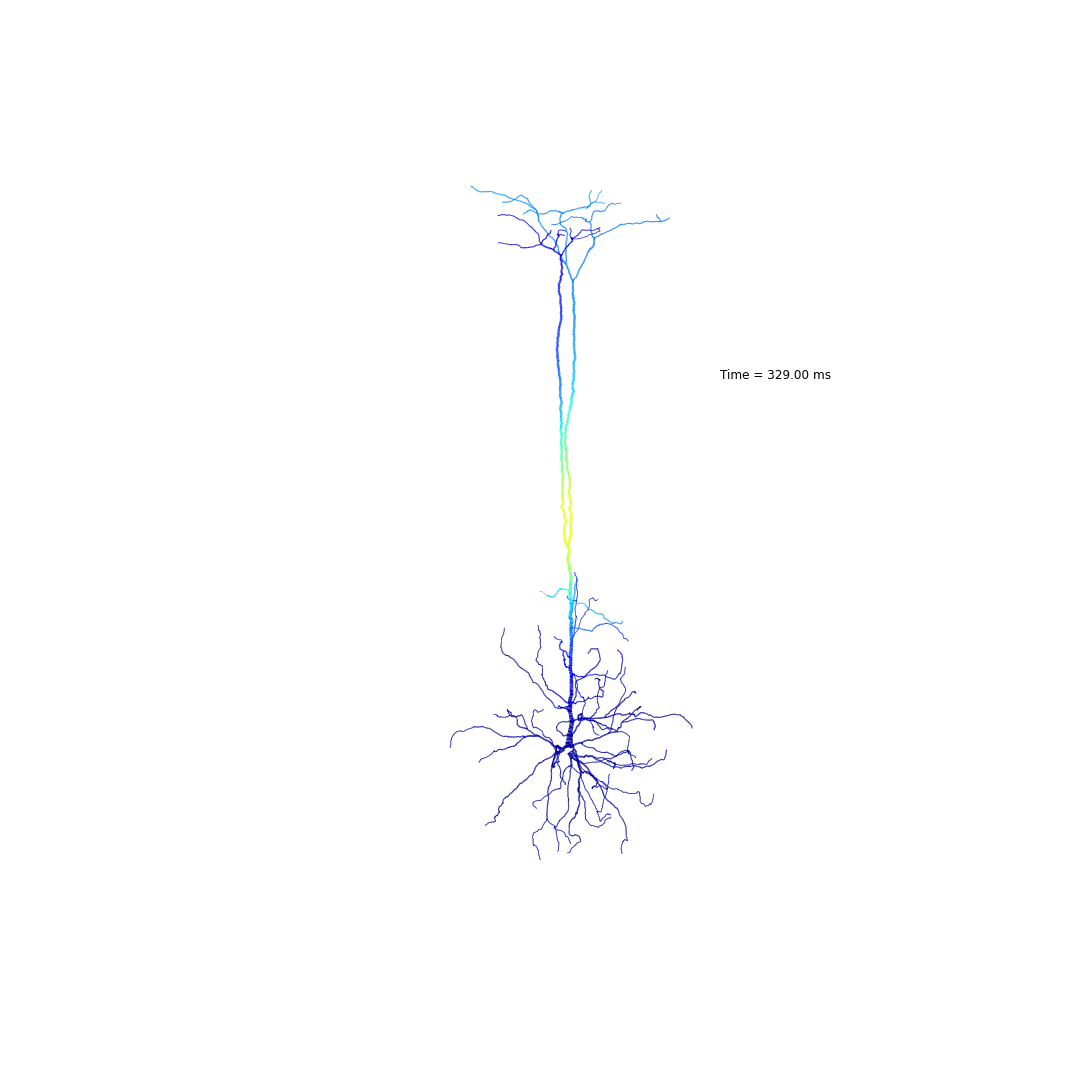
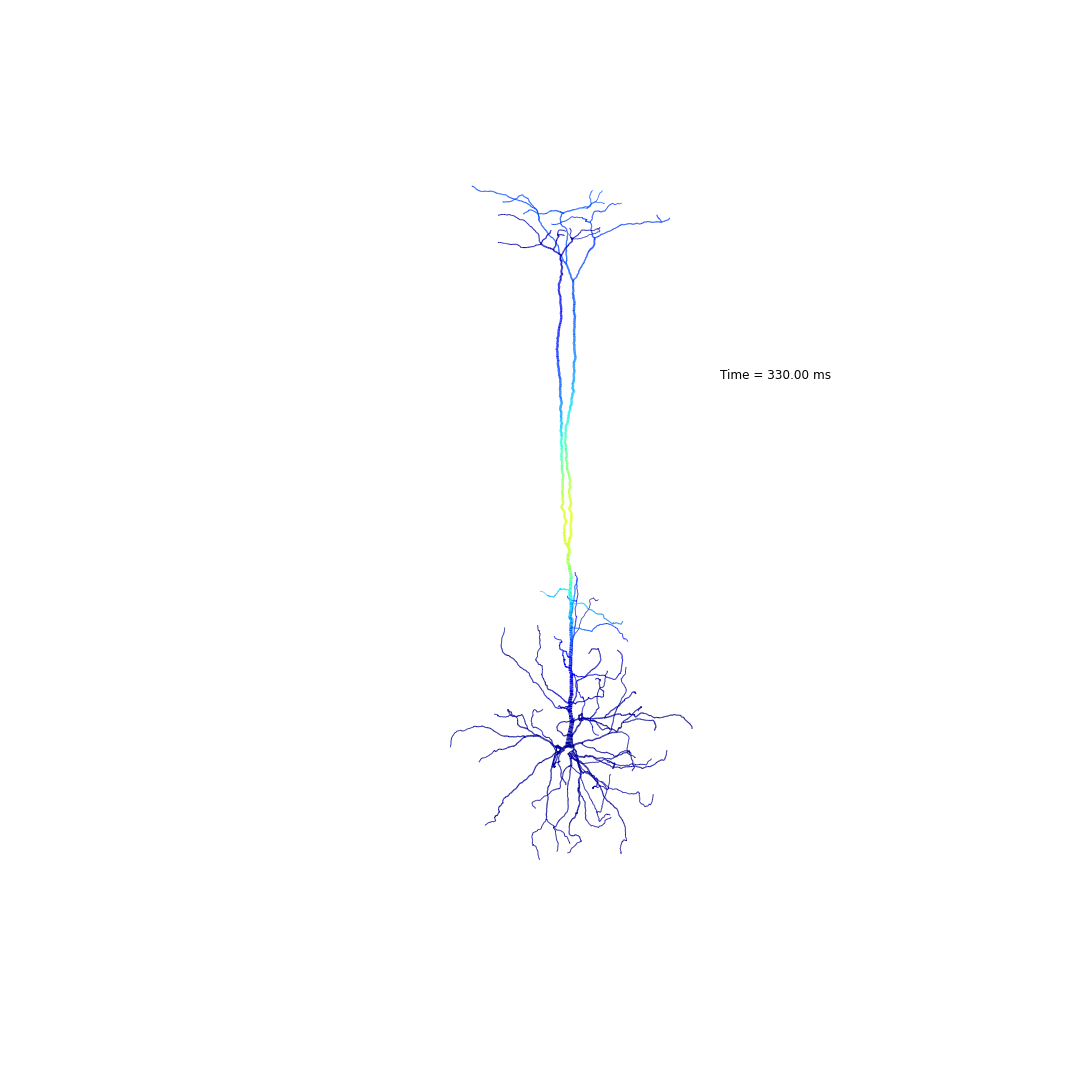
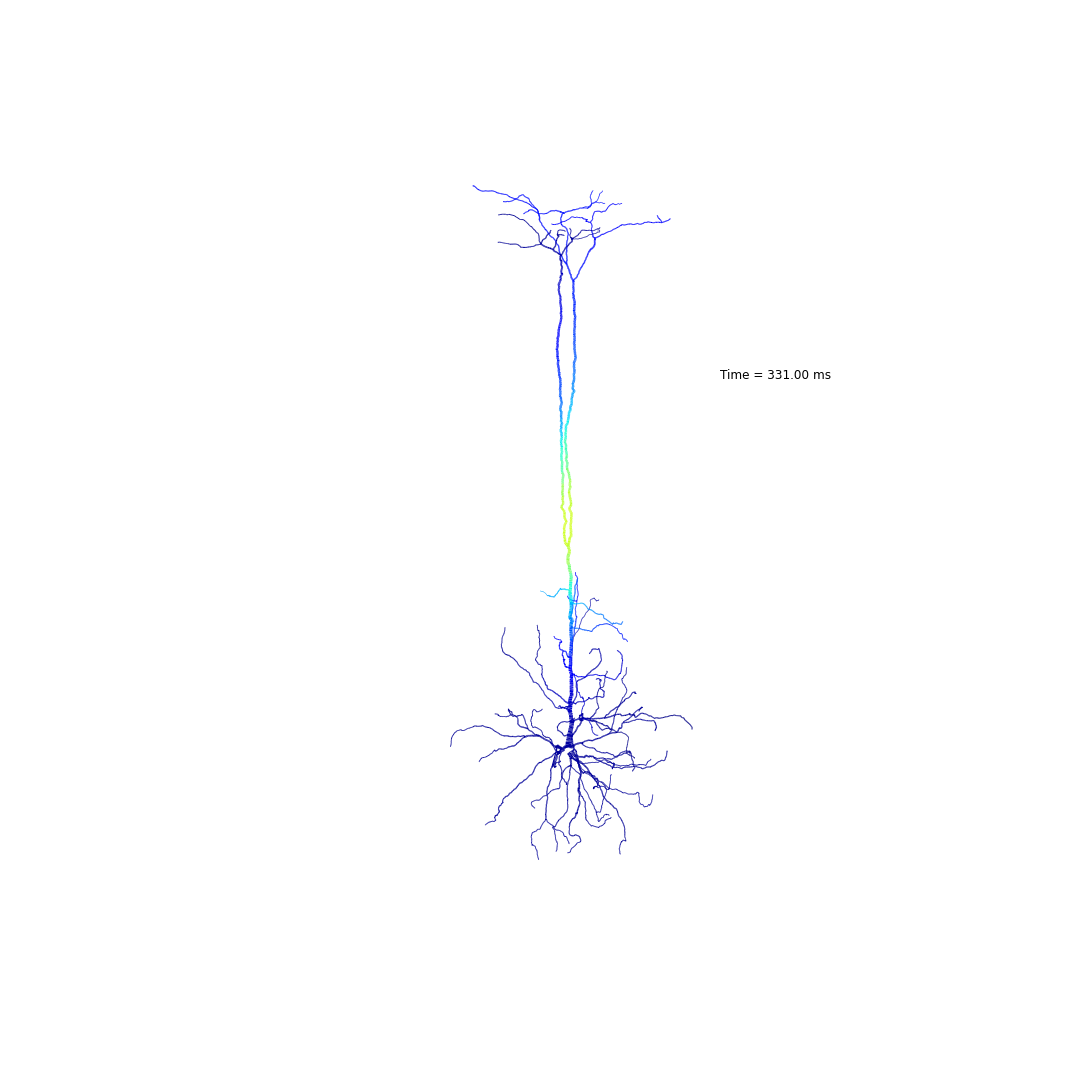
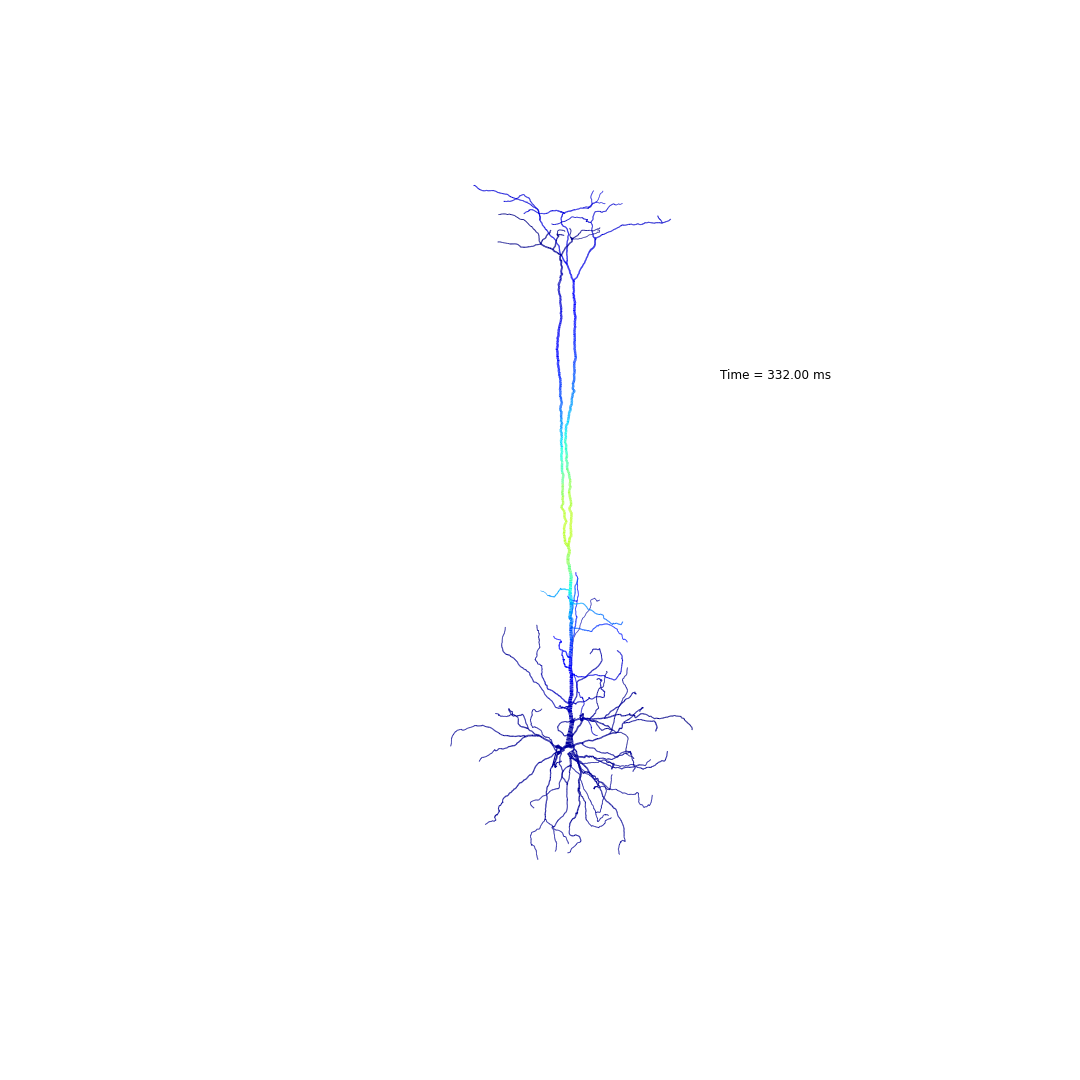
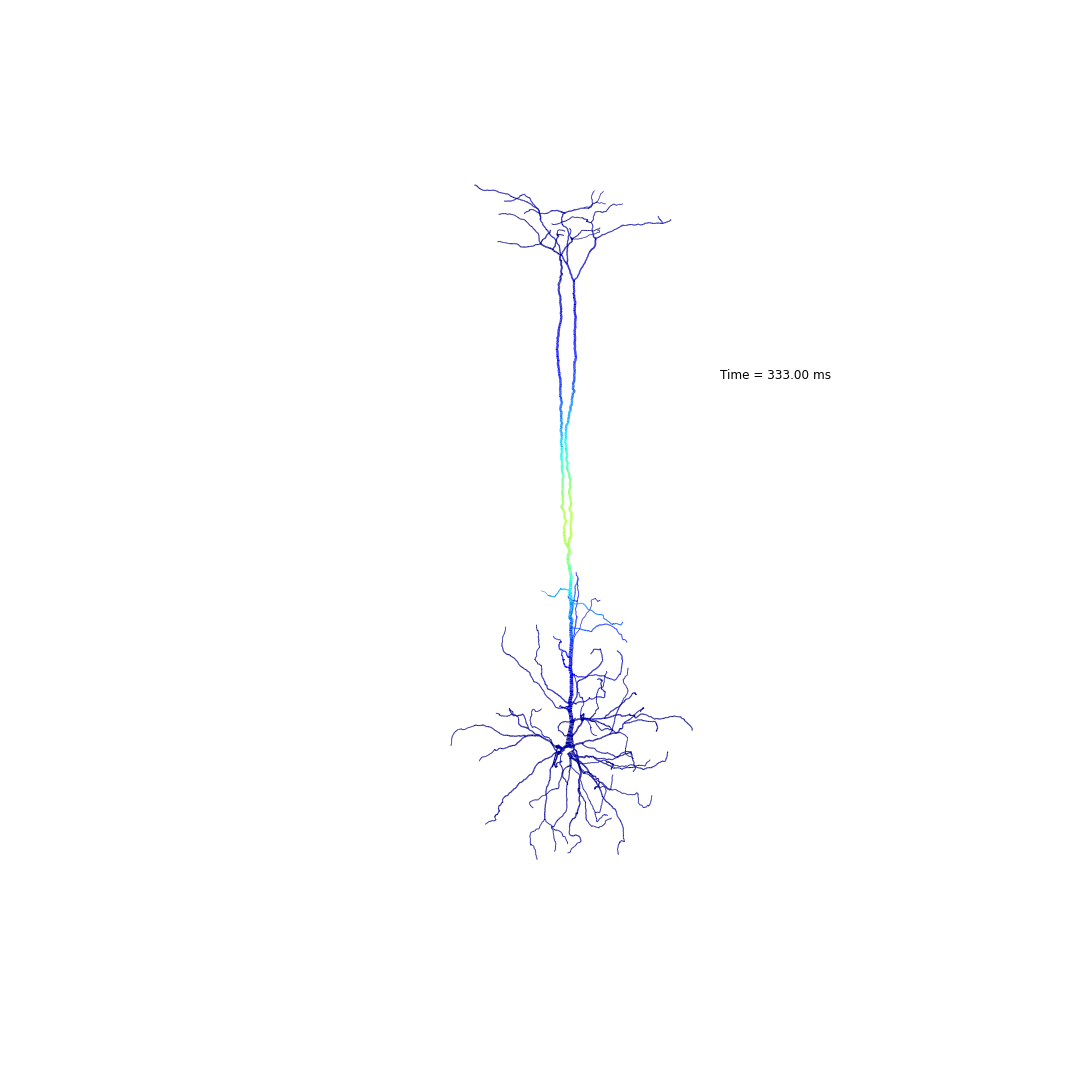
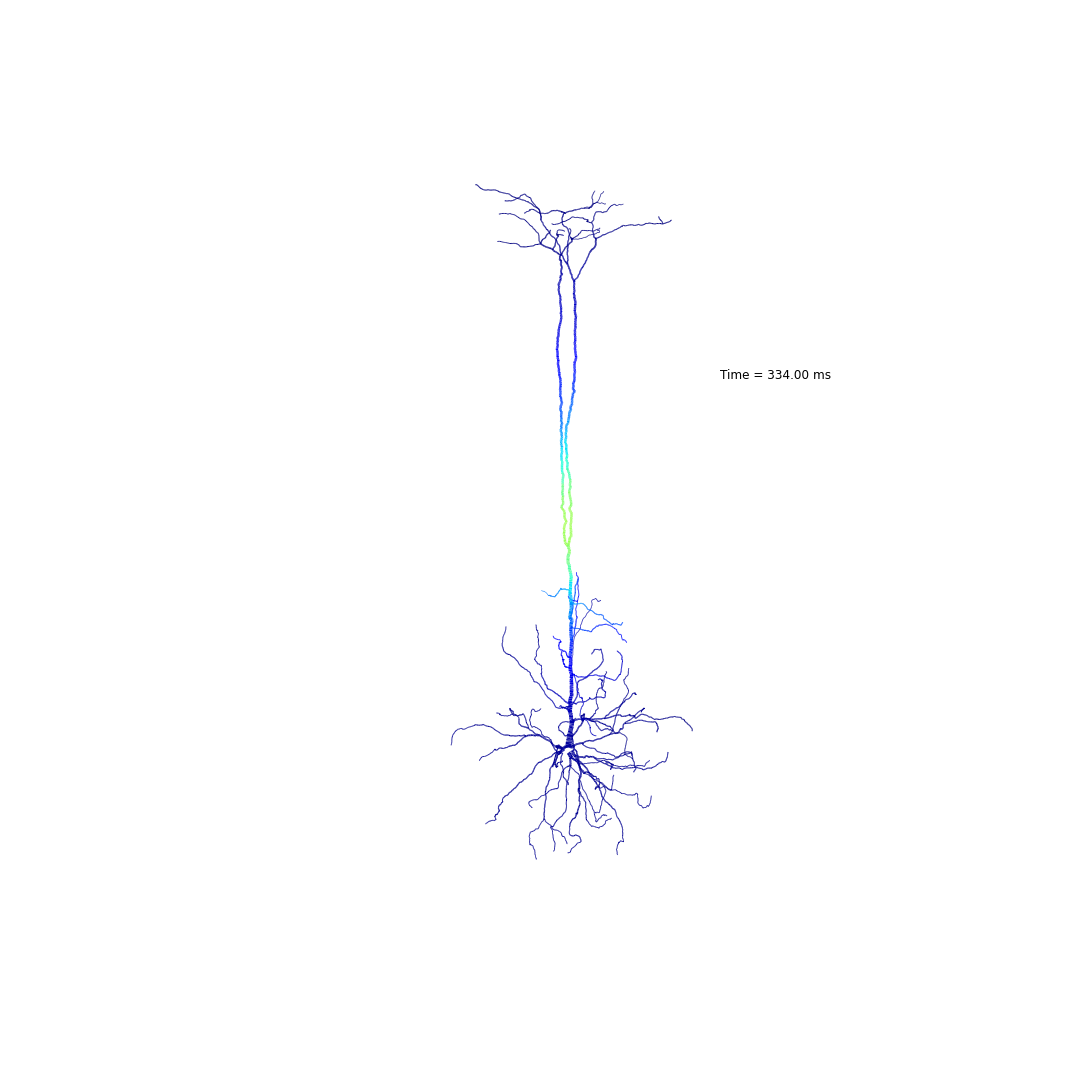
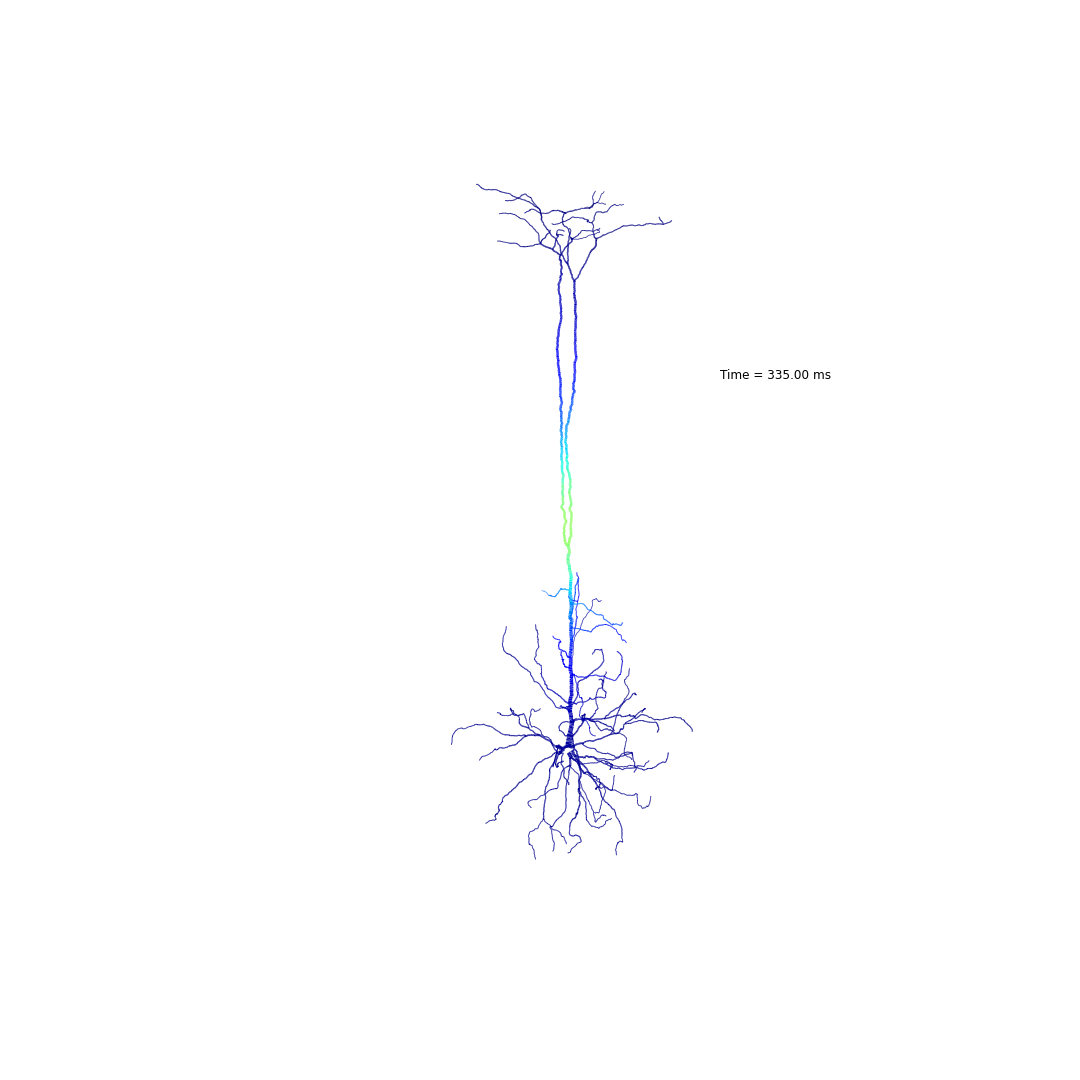
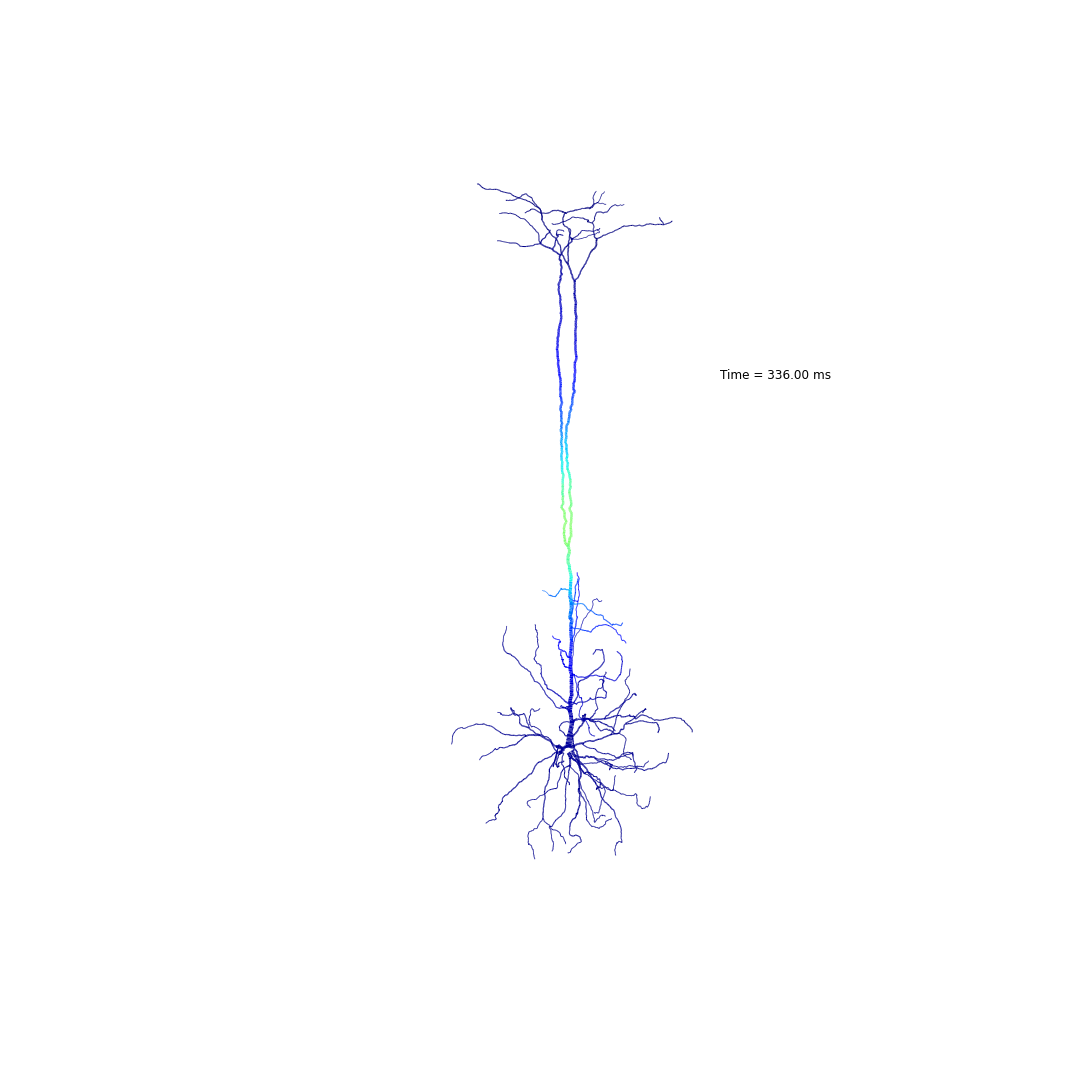
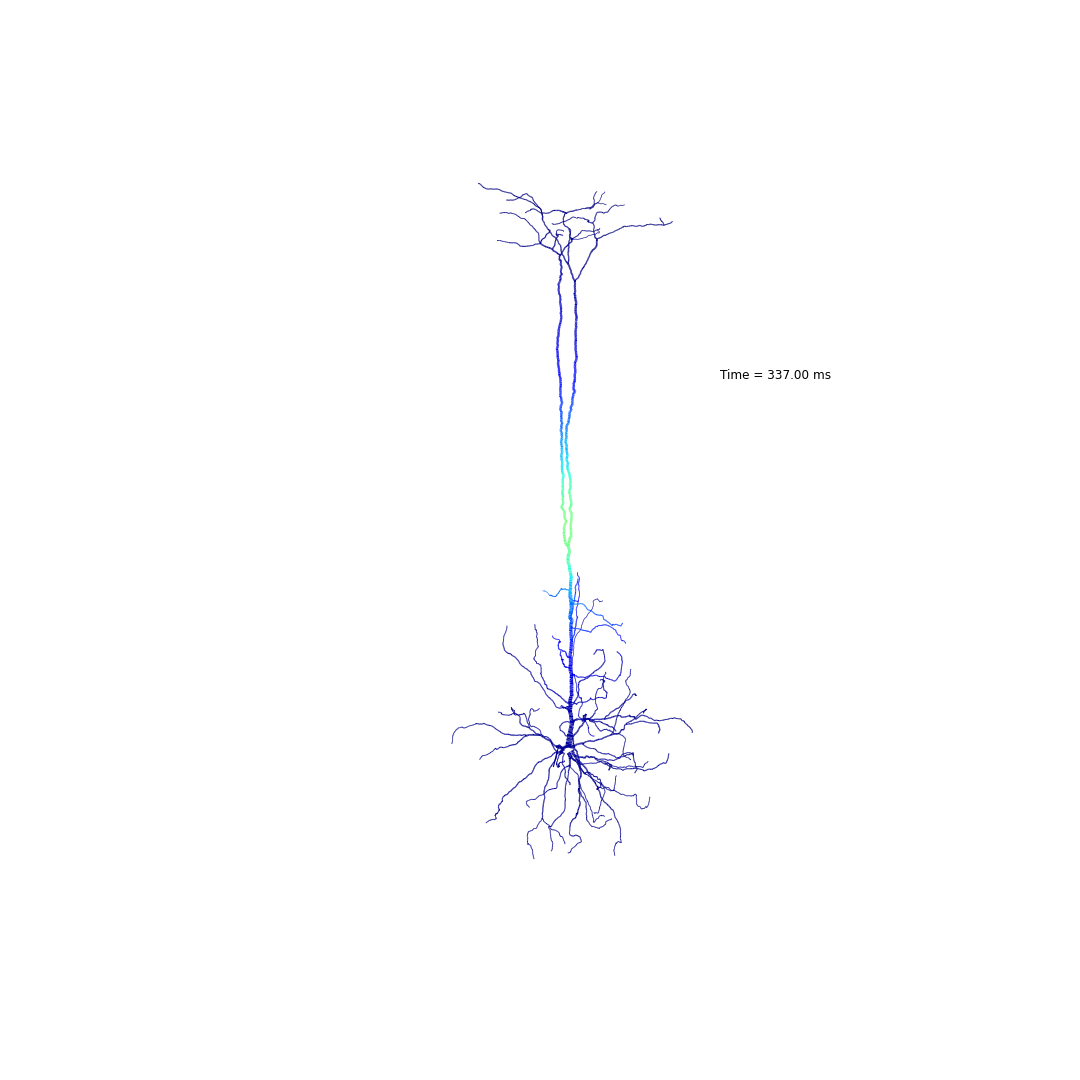
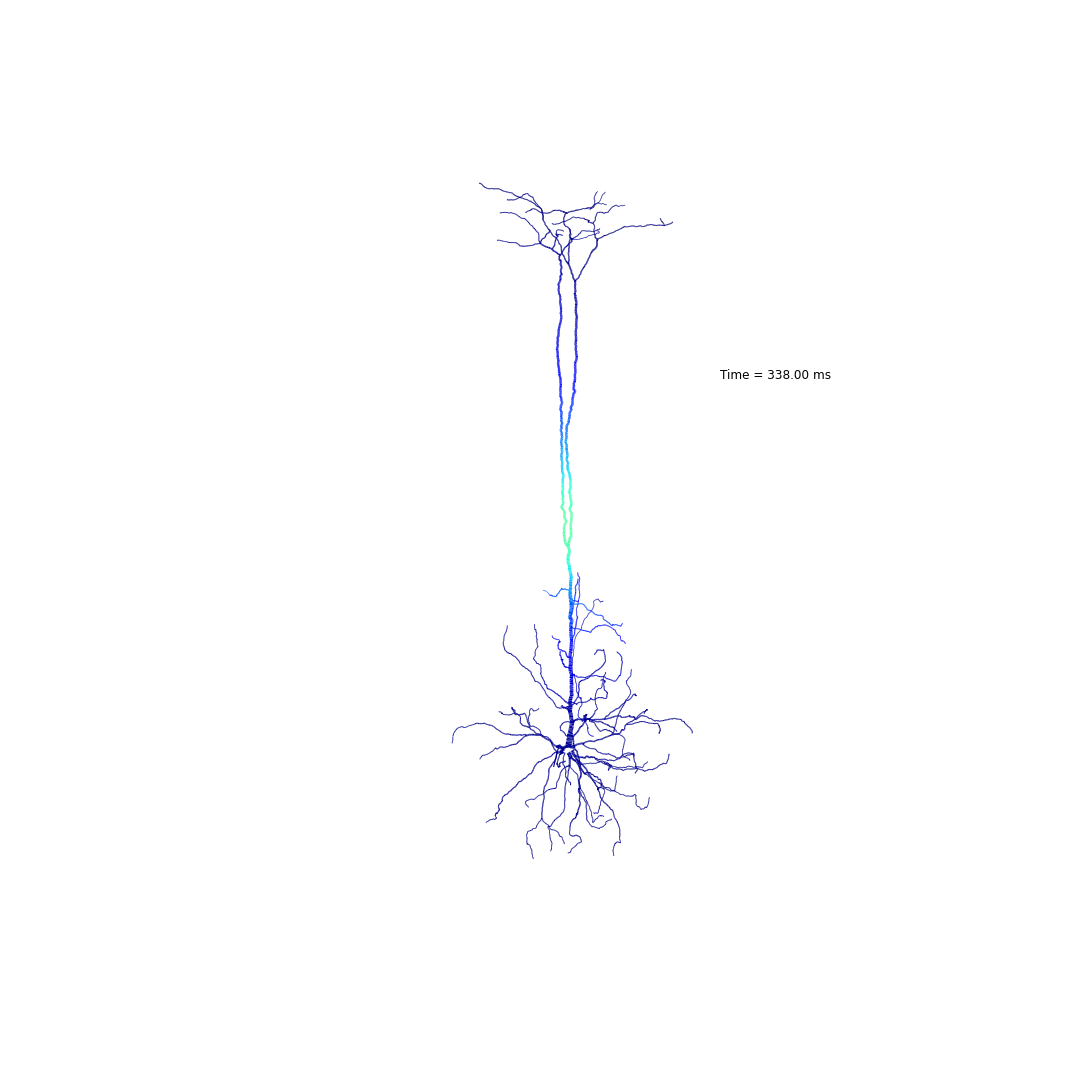
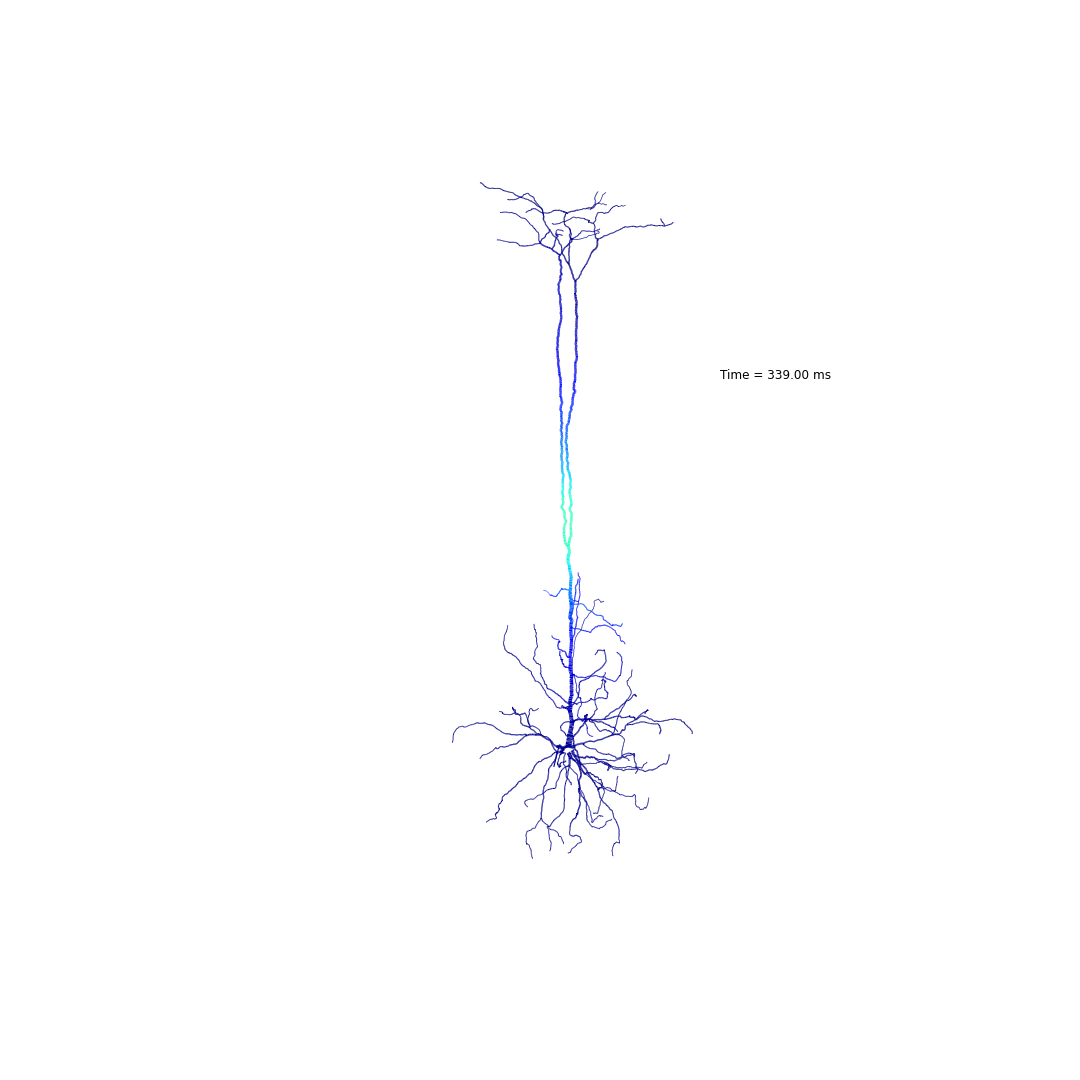
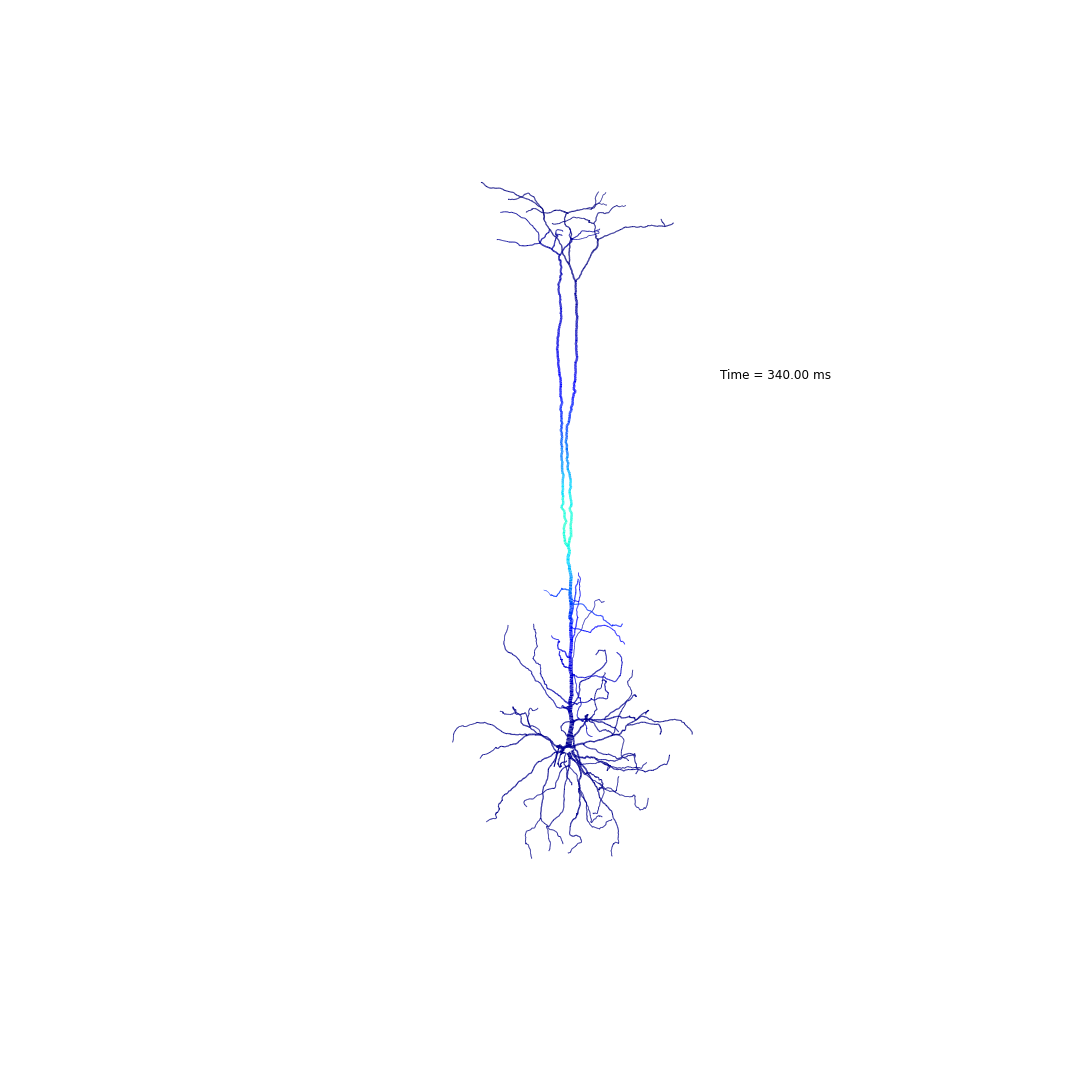
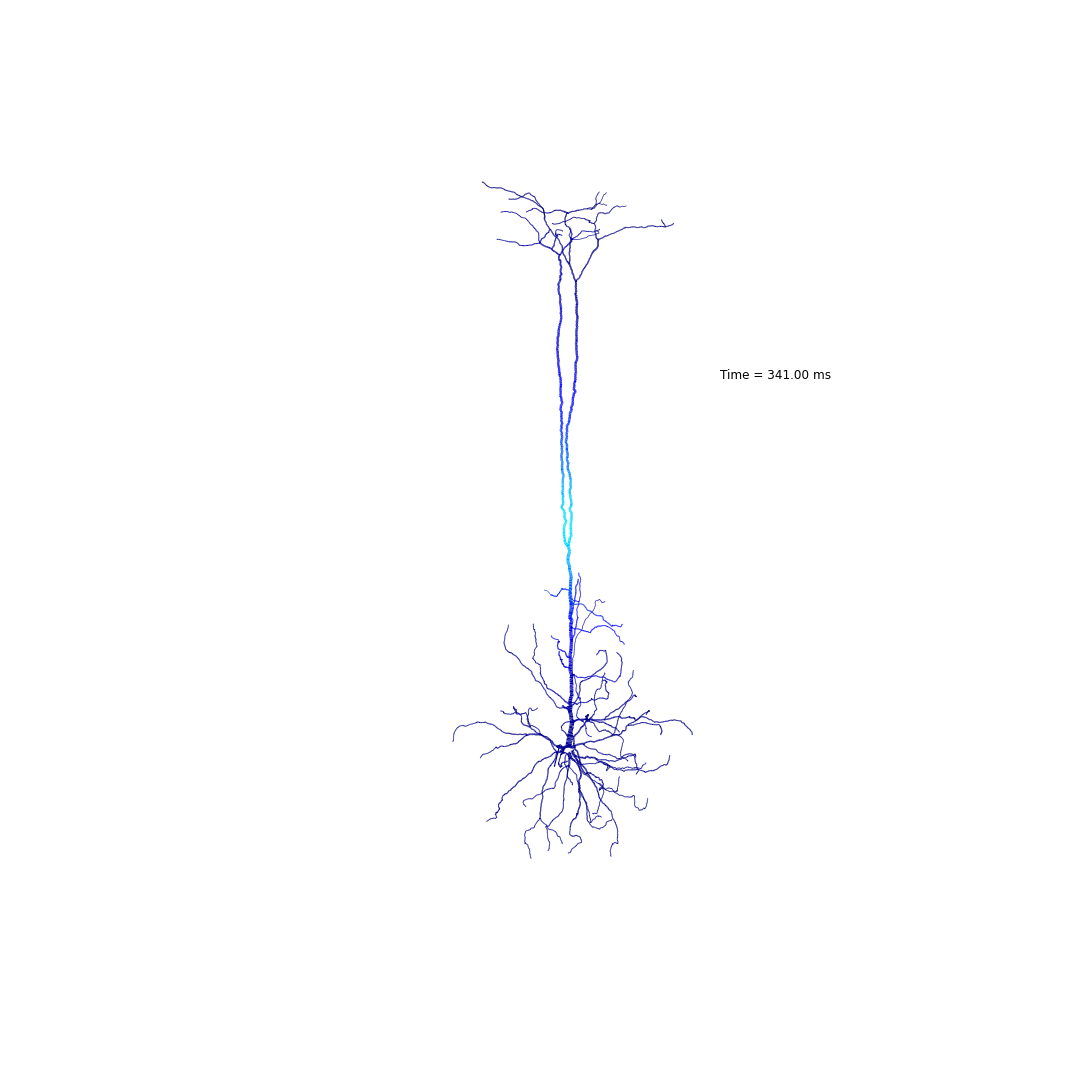
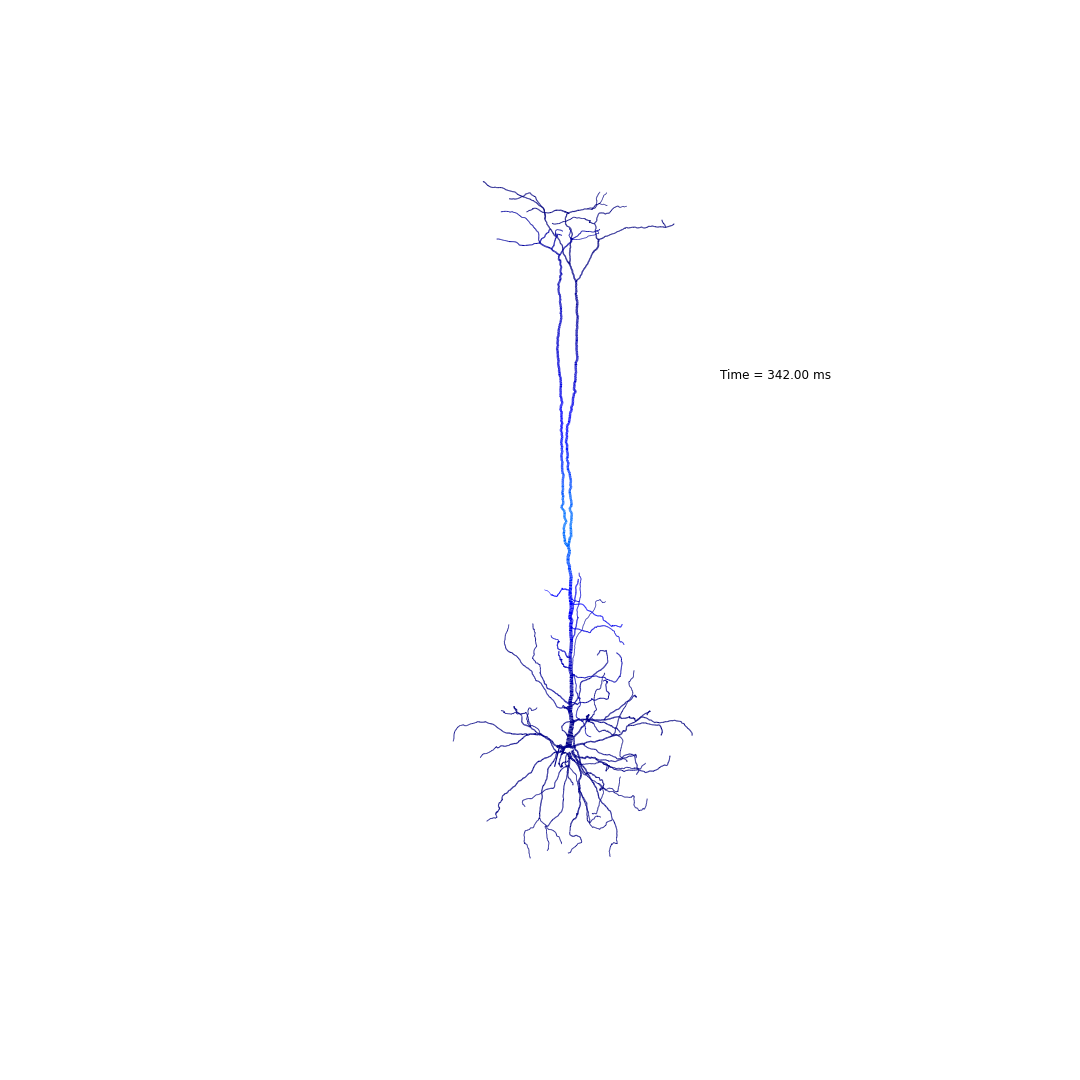
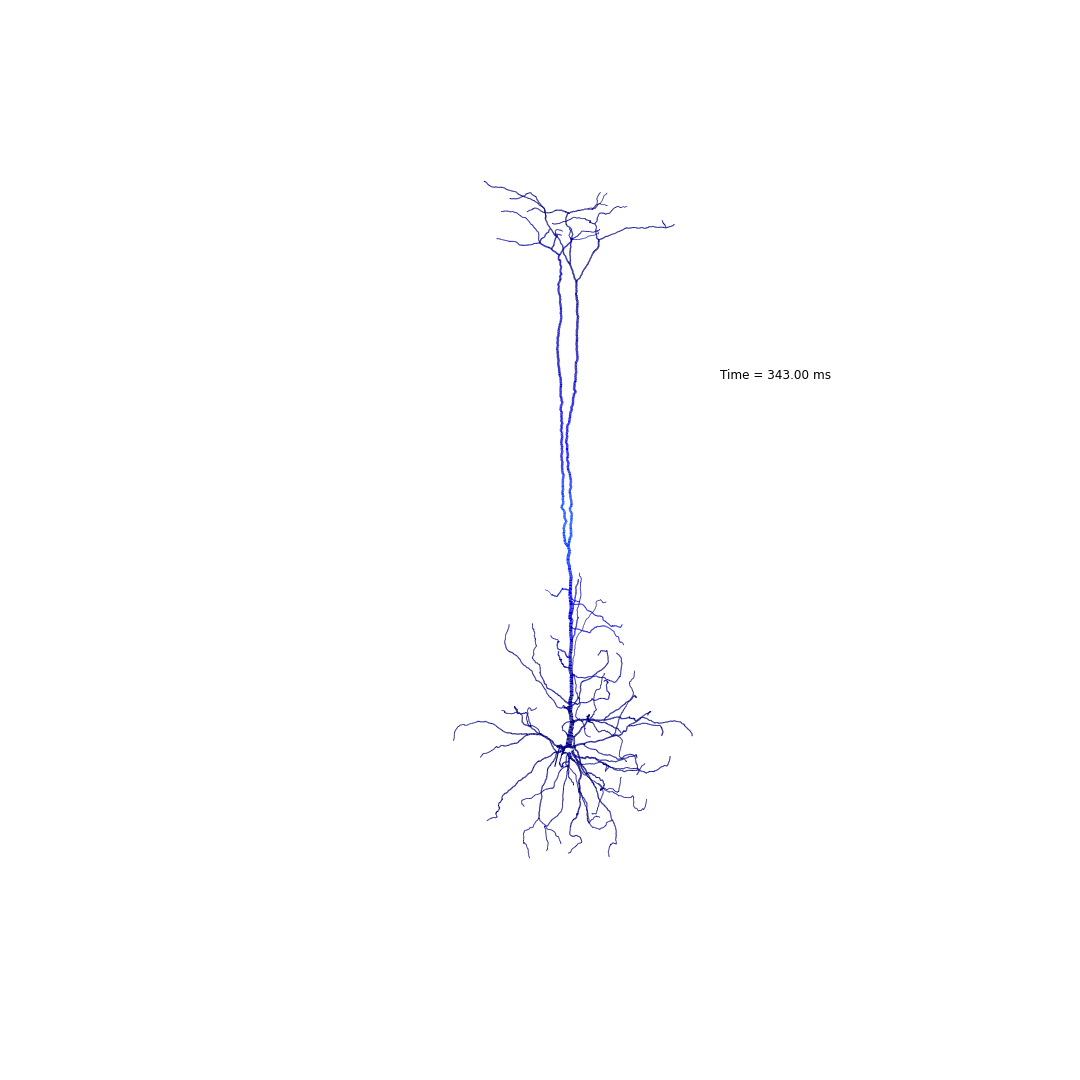
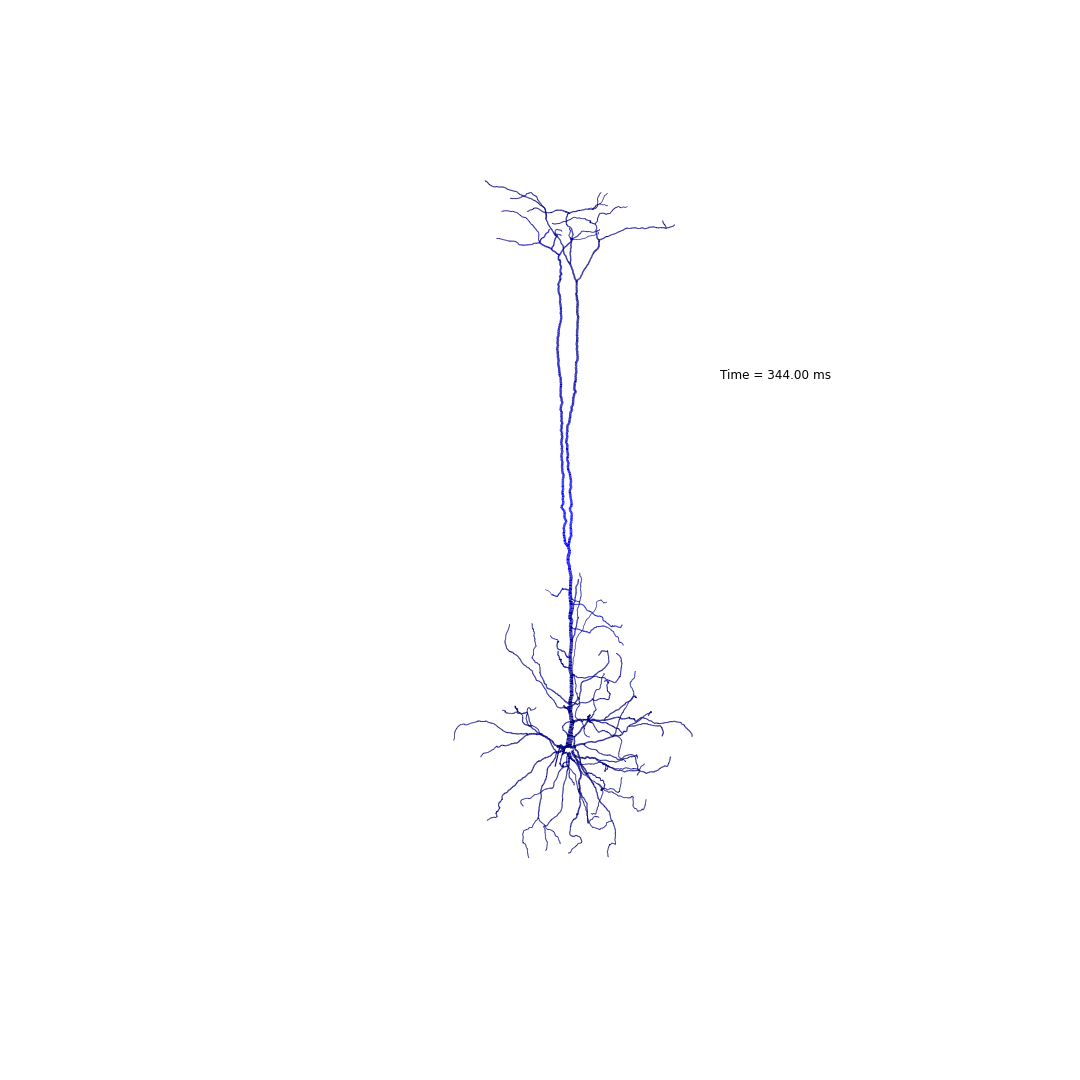
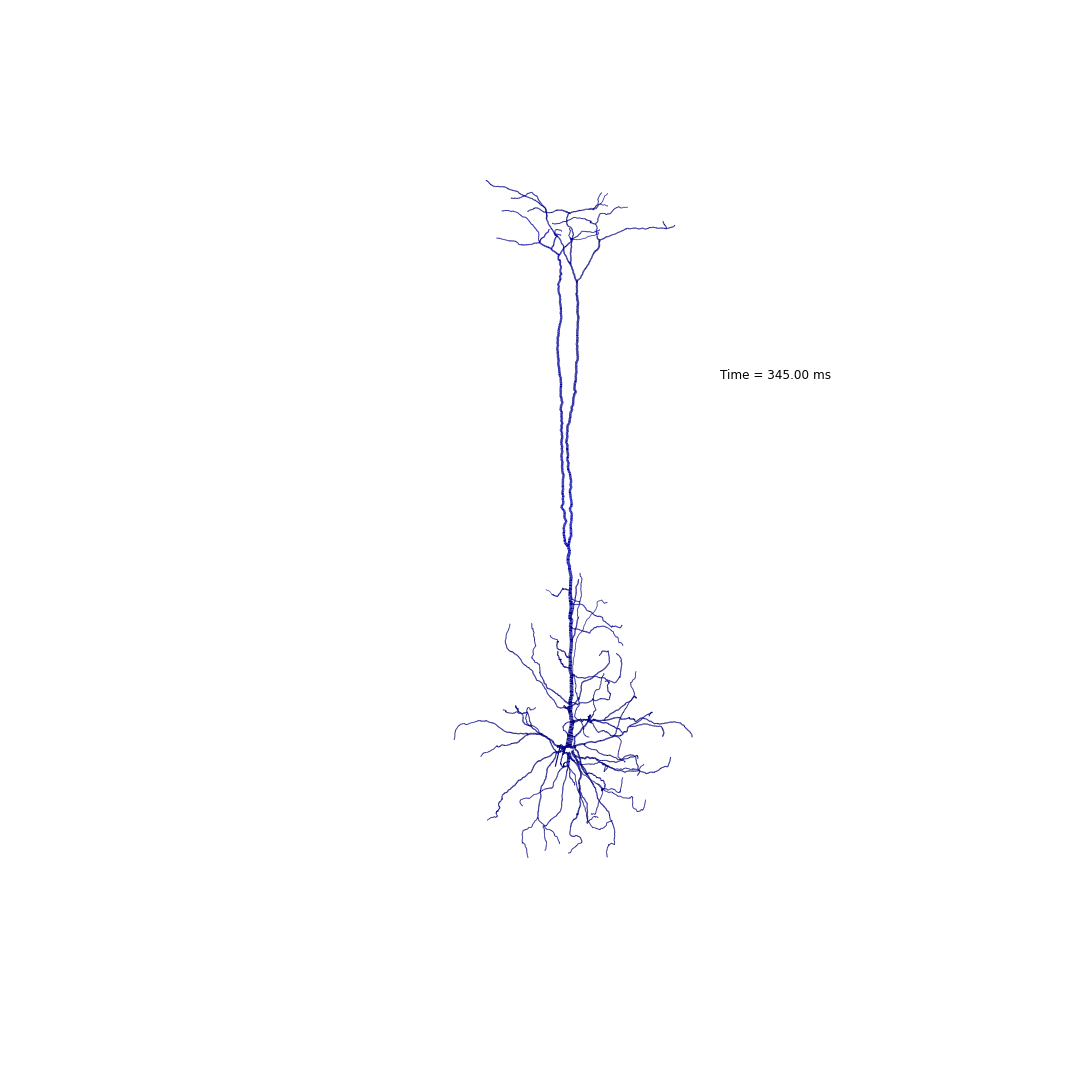
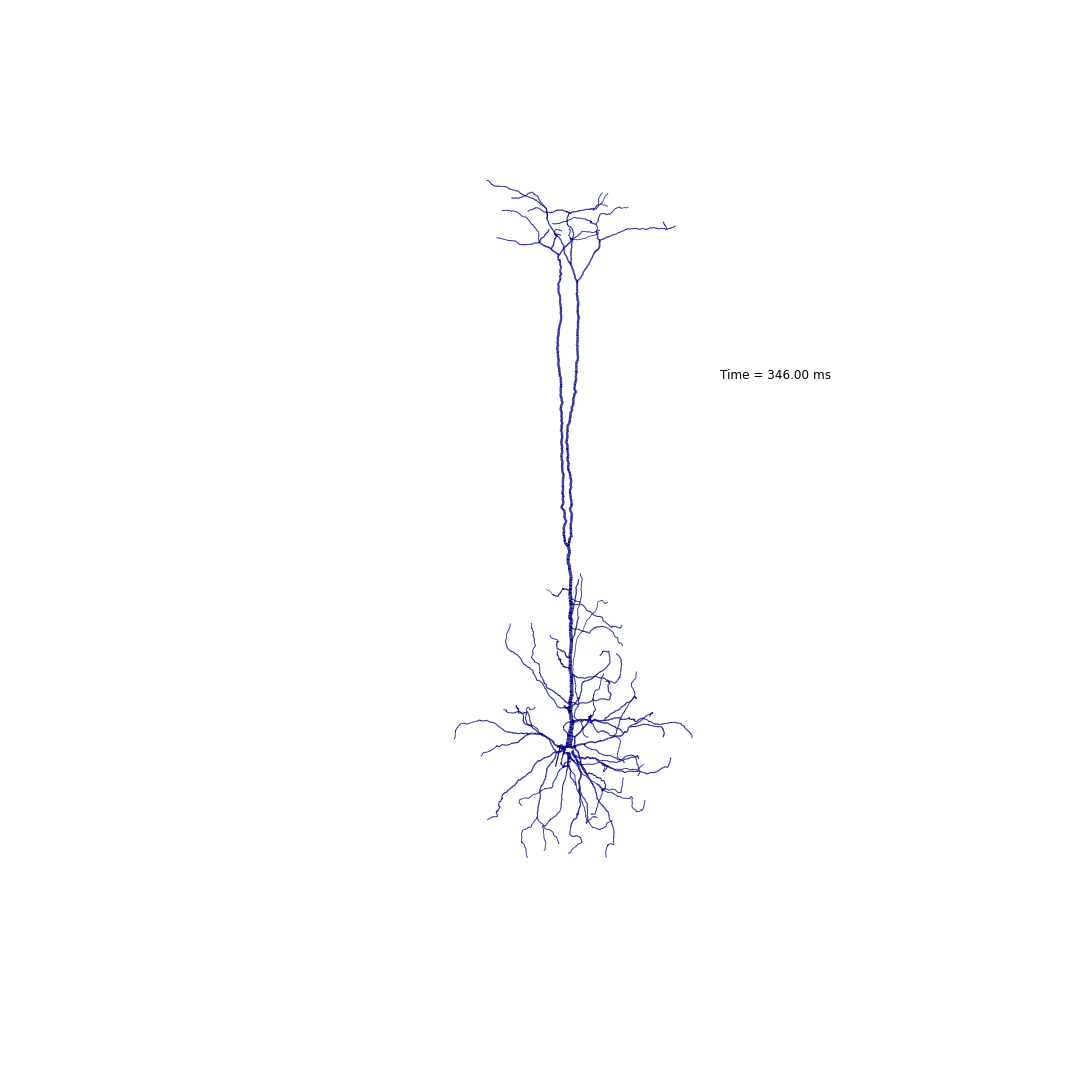
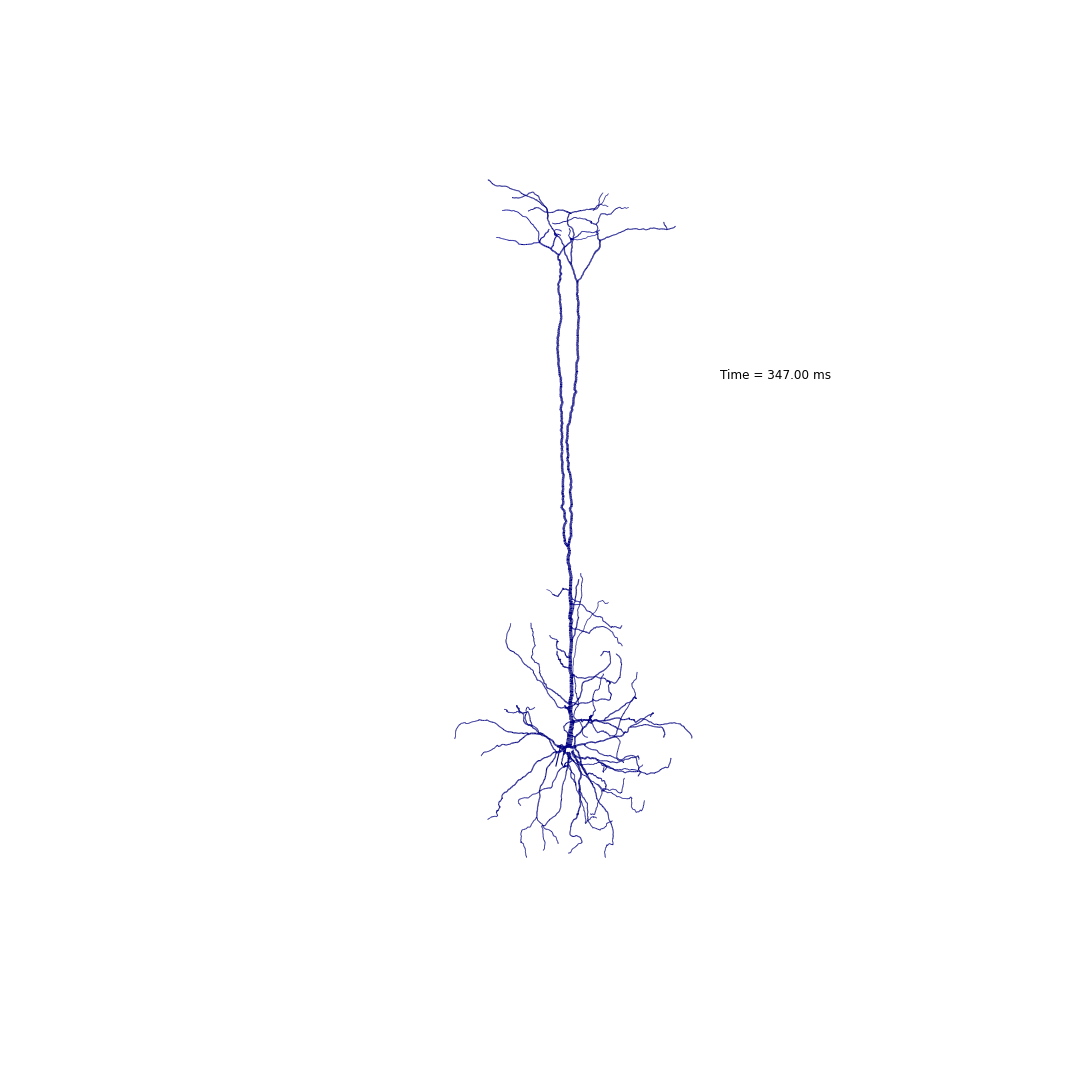
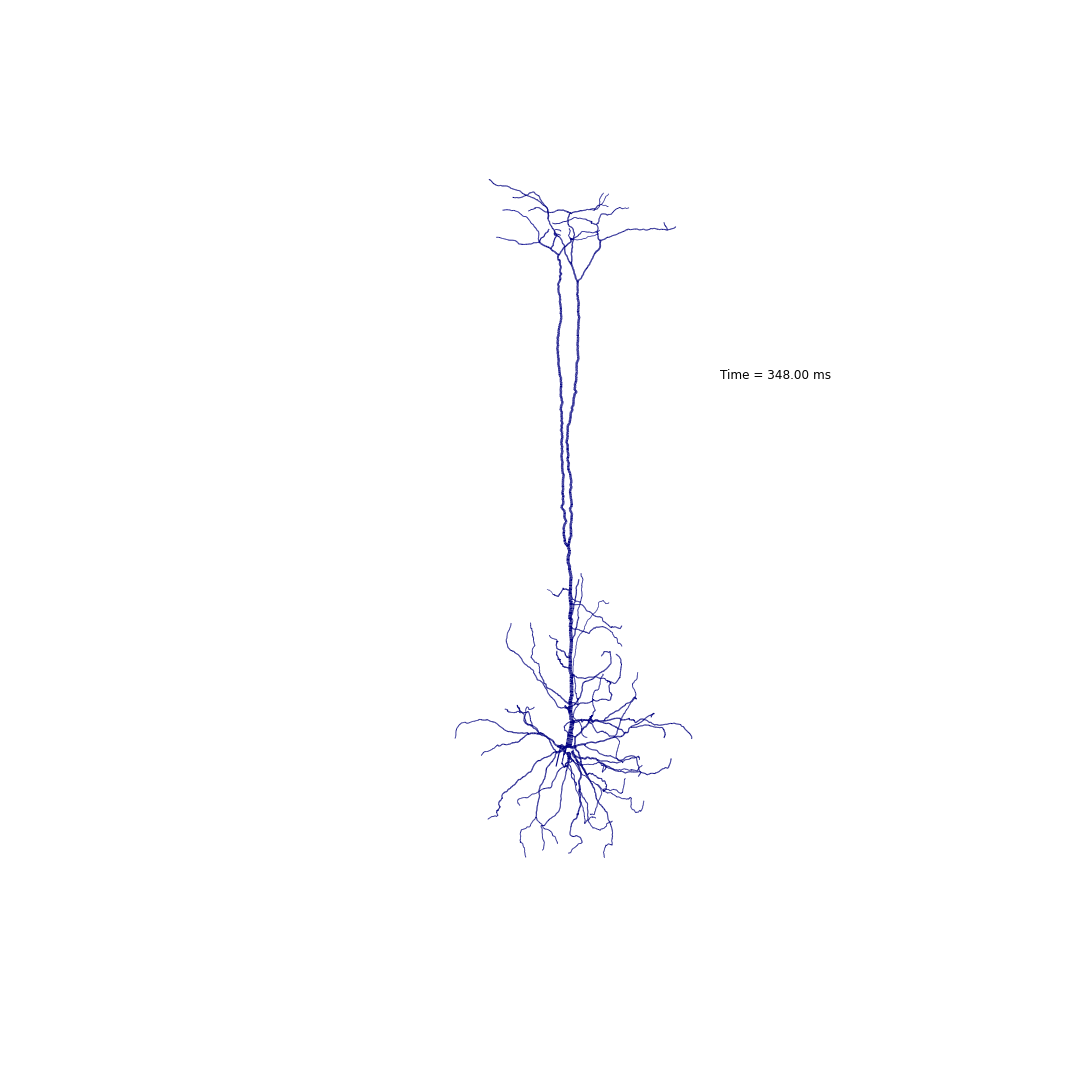
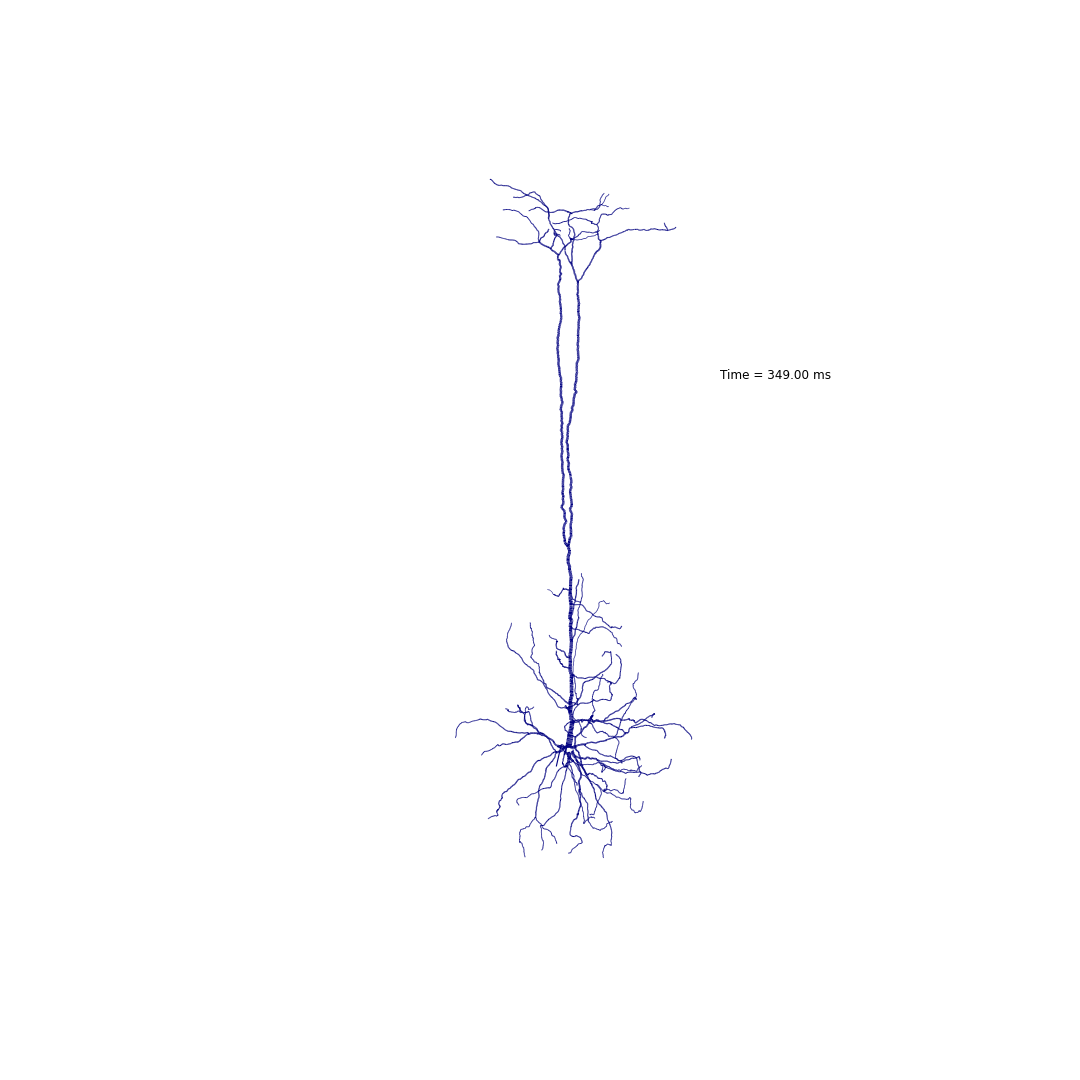
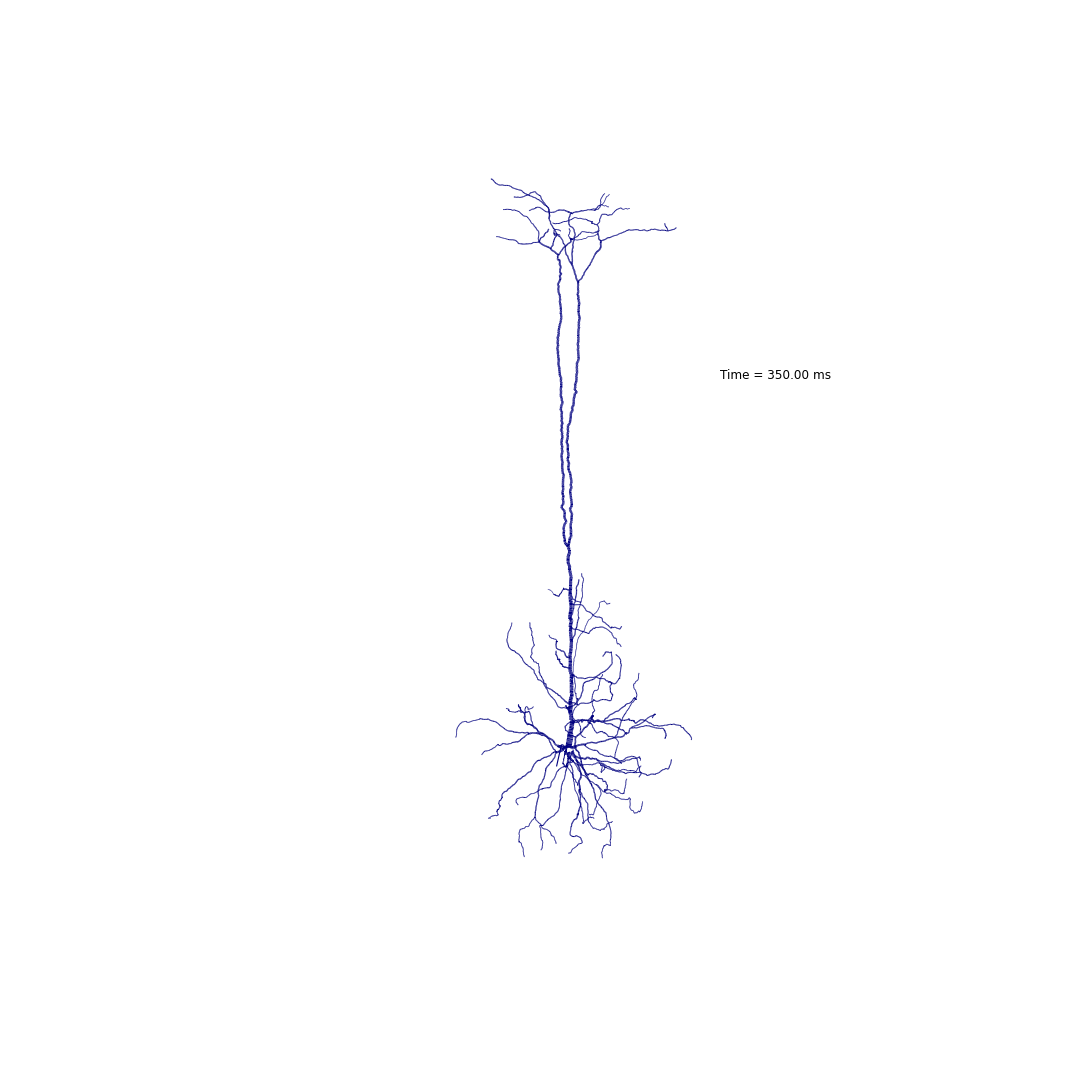

In [16]:
from visualize.cell_morphology_visualizer import CellMorphologyVisualizer

# # Uncomment to re-create the video
# if I.os.path.exists(str(db.basedir/'visualize_morphology_3d')):
#     I.shutil.rmtree(str(db.basedir/'visualize_morphology_3d'))
output_folder = str(db.basedir/'visualize_morphology_3d')

cmv = CellMorphologyVisualizer(
    cell, 
    t_start=295, t_end=350, t_step=1)
cmv.display_animation(
    output_folder, 
    client=I.get_client(), 
    color="voltage")

## Comparing to empirical responses

In order to know if certain biophysical properties of a cell are realistic at all, they are clipped to in-vitro recorded values (or a generous interval, if they are poorly known), and benchmarked against in-vitro recorded cell responses. We use the same values as [Hay et al. \(2011\)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002107), but added the parameters:
- `scale_apical.scale`
- `SKv3.1 offset & slope`

[Hay et al. \(2011\)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002107) runs 5 stimulus protocols ($bAP$, $BAC$ and $3$ step currents) and compares the cell's response to a distribution of physiological parameters, the so-called **objectives** for [multi-objective optimization](../../../biophysics_fitting/MOEA_EH_minimal/), or [random-walk exploration](../../../biophysics_fitting/exploration_from_seedpoint/).

This is where the [Evaluator](../biophysics_fitting/evaluator.py) object comes in.

### Running all stimulus protocols

In the previous section, we ran an example bAP stimulus, and a BAC stimulus. This resulted in a single AP, and a triplet respectively. In order to verify if the biophysical properties of the cell match empirically observed responses, we also need to run $3$ step currents and measure the response.

In [ ]:
# may take a while, especially the step currents
voltage_traces = s.run(p)

Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired
Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired
Connection dropped: socket connection broken
Transition to CONNECTING
Session has expired


`voltage_traces` is a dictionary with the voltage trace (i.e. NEURON's `tVec` and `vList`) of the cell for each stimulus protocol.

In [ ]:
voltage_traces.keys()

dict_keys(['bAP.hay_measure', 'BAC.hay_measure', 'StepOne.hay_measure', 'StepTwo.hay_measure', 'StepThree.hay_measure'])

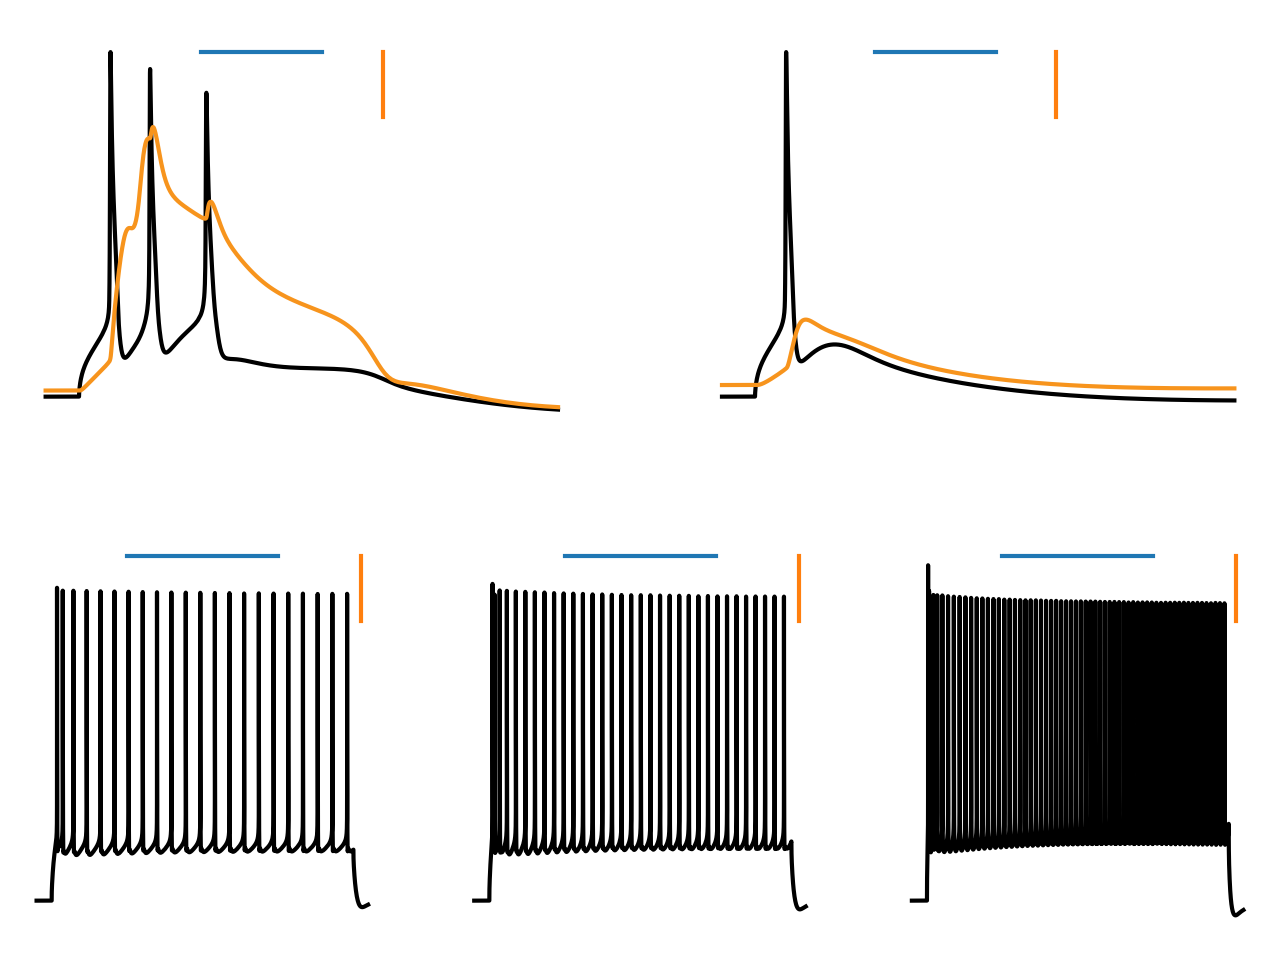

In [ ]:
# visualize all responses
from visualize import voltage_trace_visualizer as vtv
vtv.visualize_vt(voltage_traces)

These responses *look* good, but looking is not a great quantifier. Let's see how far off these responses are compared to the empirically recored ones.

In [ ]:
evaluation = e.evaluate(voltage_traces)

[WARNING] hay_evaluation: Setting up hay evaluator. This loads several variables to the NEURON envioronment. Also, it creates a unconnected cell (which is very small ~ 1 compartment) which has the purpose to 'just be there' such that the functionality necessary to evaluate voltage traces is available. This has the side effect that in the case of the variable time step solver, the timesteps can be changed.
[WARNING] hay_evaluation: Setting up hay evaluator. This loads several variables to the NEURON envioronment. Also, it creates a unconnected cell (which is very small ~ 1 compartment) which has the purpose to 'just be there' such that the functionality necessary to evaluate voltage traces is available. This has the side effect that in the case of the variable time step solver, the timesteps can be changed.
[WARNING] hay_evaluation: Setting up hay evaluator. This loads several variables to the NEURON envioronment. Also, it creates a unconnected cell (which is very small ~ 1 compartment)

Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/multiprocessing/queues.py", line 356, in get
    res = self._reader.recv_bytes()
  File "/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/gpfs/soma_fs/scratch/meulemeester/anaconda_is

In [ ]:
evaluation

{'1BAC_APheight.check_1AP': 'True',
 '1BAC_APheight.raw': array([30.03849529, 24.75845305, 17.36993834]),
 '1BAC_APheight.normalized': 0.8606735930617893,
 '1BAC_APheight': 0.8606735930617893,
 '1BAC_ISI.check_2_or_3_APs': 'True',
 '1BAC_ISI.check_repolarization': 'True',
 '1BAC_ISI.raw': 7.875,
 '1BAC_ISI.normalized': 2.3787718680286485,
 '1BAC_ISI': 2.3787718680286485,
 '1BAC_ahpdepth.check_2AP': 'True',
 '1BAC_ahpdepth.raw': array([-64.55325217, -62.93899138]),
 '1BAC_ahpdepth.normalized': 0.3134695566672727,
 '1BAC_ahpdepth': 0.3134695566672727,
 '1BAC_caSpike_height.check_1_Ca_AP': 'True',
 '1BAC_caSpike_height.check_>=2_Na_AP': 'True',
 '1BAC_caSpike_height.check_ca_max_after_nth_somatic_spike': 'True',
 '1BAC_caSpike_height.raw': 6.862455946898886,
 '1BAC_caSpike_height.normalized': 0.052148010590112495,
 '1BAC_caSpike_height': 0.052148010590112495,
 '1BAC_caSpike_width.check_1_Ca_AP': 'True',
 '1BAC_caSpike_width.raw': 38.825000000000045,
 '1BAC_caSpike_width.normalized': 1.098

`evaluation` contains a lot of information. Most are self-explanatory, but not all, so here is a small overview.

The evaluator first checks if certain conditions are met before moving on to evaluation. E.g., it does not make sense to measure the AP height of the second AP during the BAC stimulus, if there is no burst firing at all. Whether or not the necessary conditions for some evaluation are met are covered by the `.check` variables.

The measured values for all objectives are saved under `.raw` variables. If multiple values exists for some objective, then this `.raw` value will be an array, but the mean is taken for further evaluation.

`.normalized` values are also available, which scales them between $0$ and $1$.

If the variable does not end with `.normalized` or `.raw`, then it is in units of $\mu \pm \sigma$ compared to the distribution of empirically recorded ones.

The objectives for the step current are allowed to deviate $4.5 \sigma$ from the mean, while the other ones can deviate $3 \sigma$.

Let's clean up this data a bit and plot out their deviation from the mean.

In [ ]:
# only plot out sigma from mean, not raw or normalized values - also no checks.
filtered_evaluation = {k: v for k, v in evaluation.items() if \
    not k.endswith('.raw') and \
    not k.endswith('.normalized') and \
    not 'check' in k and \
    not k.endswith('err') and\
    not "1BAC" in k}
filtered_evaluation

{'2BAC_APheight': 1.0702484671457804,
 '2BAC_ISI': 0.44147000117411545,
 '2BAC_ahpdepth': 0.35424745806604463,
 '2BAC_caSpike_height': 0.26772111685278294,
 '2BAC_caSpike_width': 1.185039370078731,
 '2BAC_spikecount': 0.0,
 'bAP_APheight': 1.0076846781448126,
 'bAP_APwidth': 2.1000000000000227,
 'bAP_att2': 1.2949374621278273,
 'bAP_att3': 1.6864762952345045,
 'bAP_spikecount': 0.0,
 'mf1': 2.272727272727273,
 'AI1': 0.5483077417136597,
 'ISIcv1': 1.7226162728594847,
 'DI1': 0.5884109916367961,
 'TTFS1': 1.0792349726775925,
 'APh1': 1.5071587724227082,
 'fAHPd1': 1.5917723280400997,
 'sAHPd1': 0.80106601417295,
 'sAHPt1': 0.24620347020550856,
 'APw1': 2.366748566748531,
 'mf2': 3.571428571428571,
 'AI2': 1.3927309146286722,
 'ISIcv2': 0.33206310625141927,
 'DI2': 0.7890173410404545,
 'TTFS2': 0.2599179206566472,
 'APh2': 0.2628773527281259,
 'fAHPd2': 1.16421730675727,
 'sAHPd2': 0.1261248282839032,
 'sAHPt2': 1.2082080631180157,
 'APw2': 1.6493354224623822,
 'mf3': 4.050040500405004,


In [ ]:
def translate_objective(objective):
    """
    A simple map between objective acronyms and their full name
    """
    step_map = {
        'mf': "Spike frequency",
        'AI': 'Adaptation Index',
        'ISIcv': "Interspike Interval \n Coefficient of Variation",
        'DI': "Initial burst ISI",
        'TTFS': "First spike latency",
        'APh': "AP peak",
        'fAHPd': "Fast AHP Depth",
        'sAHPd': "Slow AHP Depth",
        'sAHPt': "Slow AHP Time",
        'APw': "AP half-width",
    }
    if not "bAP" in objective and not "BAC" in objective:
        # must be step current objective
        t = step_map[objective[:-1]]
    else:
        t = objective
    return t

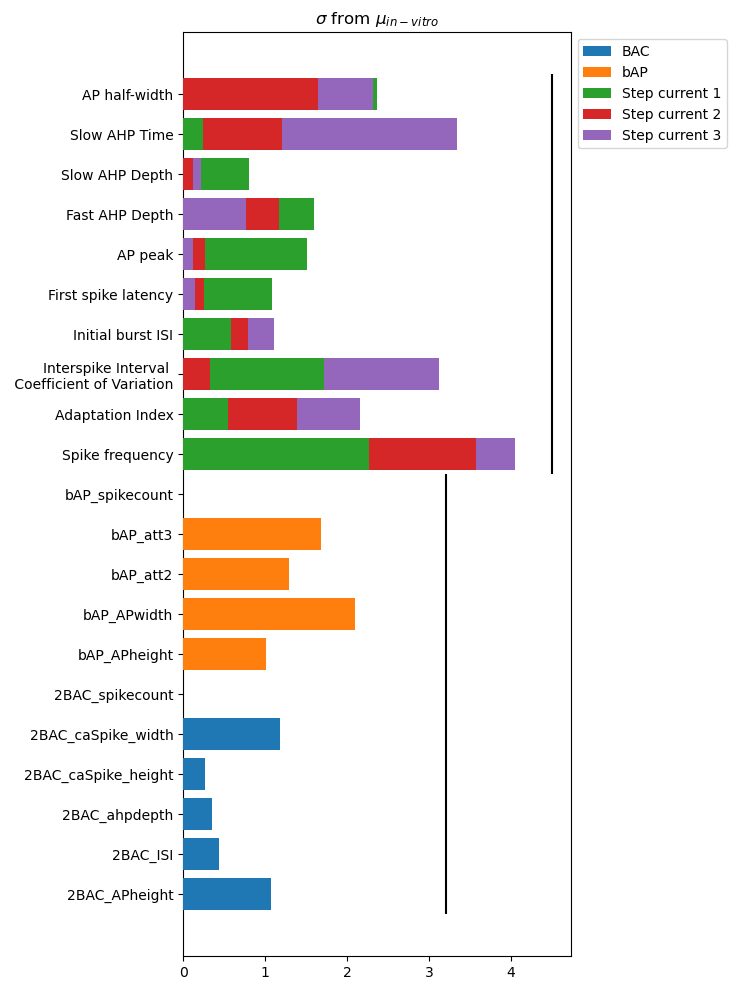

In [ ]:
%matplotlib inline
from collections import OrderedDict
colors = I.plt.rcParams['axes.prop_cycle'].by_key()['color']

fig = I.plt.figure(figsize=(5, 12))
ax = fig.gca()
for k, v in filtered_evaluation.items():
    if "BAC" in k:
        label="BAC"
        c = colors[0]
    elif 'bAP' in k:
        label = "bAP"
        c = colors[1]
    else:
        label = "Step current {}".format(k[-1])
        c = colors[int(k[-1])+1]
    ax.barh(y=translate_objective(k), width=v, zorder=5-v, label=label, color=c)
handles, labels = I.plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
I.plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1, 1))
I.plt.title("$\sigma$ from $\mu_{in-vitro}$")

# first 10 objectives: bAP and BAC
I.plt.vlines([3.2], ymin=-0.5, ymax=10.5, color='k')
# next 10 objectives: step currents
I.plt.vlines([4.5], ymin=10.5, ymax=20.5, color='k')
I.plt.show()

All objectives are well within the pre-defined bounds. most are even under $2 \sigma$ from the mean!

## Visualization

How much did current ended up flowing through the ion channels? Let's plot out a spatial integration of all the current types in the apical dendrite:

In [26]:
rangeVarsApical = [
 'NaTa_t.ina',
 'Ca_HVA.ica',
 'Ca_LVAst.ica',
 'SKv3_1.ik',
 'SK_E2.ik',
 'Ih.ihcn',
 'Im.ik']
for rv in rangeVarsApical:
    cell.record_range_var(rv)

In [27]:
sim_params = I.scp.NTParameterSet({
    'tStart': 0.0,
    'tStop': 295+55,
    'dt': 0.025,
    'Vinit': -75.0,
    'T': 34.0,
    'recordingSites': []})
I.scp.init_neuron_run(sim_params, vardt = True)

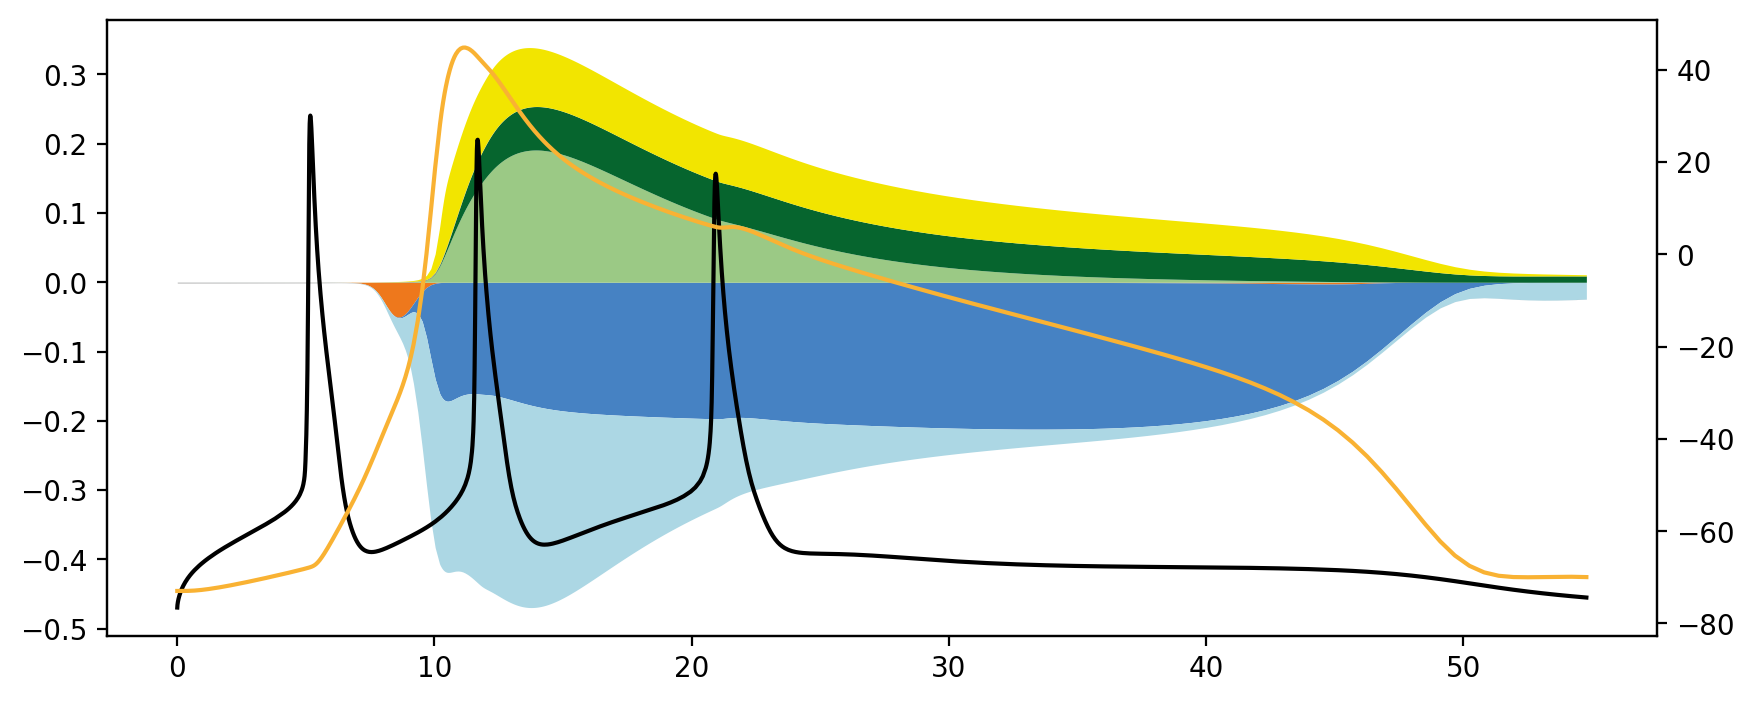

In [30]:
from visualize.current_visualizer import CurrentAnalysis
ca = CurrentAnalysis(cell, rangeVars = rangeVarsApical)
ca.plot_areas(plot_voltage = True, t_stim=295, select_window_relative_to_stim=(0,700))